In [57]:
# Basic packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rd # generating random numbersvalidation
import datetime # manipulating date formats
# Viz
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots
import itertools

In [58]:
train_df=pd.read_csv("train.csv")
val_df=pd.read_csv("validation.csv")
test_df=pd.read_csv("test.csv")

In [59]:
budget=6250*1000
print("Our Budget is:",budget, "Fen")
print("To use over",val_df.shape[0],"bid opportunities.")
#BudPerBid=budget/test_df.shape[0]
#print("Budget / Bid Opportunity:",BudPerBid)

minBid=np.min(train_df["payprice"].values)
maxBid=np.max(train_df["payprice"].values)

step_size = 1
#Set bid range, which determines the range of bids a random bid should be in.
BidRange = np.arange(minBid+1, maxBid+2,step_size) 
#custRange = np.arange(60, 65,1)

print(minBid)
print(maxBid)

Our Budget is: 6250000 Fen
To use over 303925 bid opportunities.
0
300


In [60]:
#Setting minimum and maximum bid range according to data exploration.

In [65]:
minBidRange = np.arange(26, 96, step_size) # determines the range that bids should be in
maxBidRange = np.arange(66, 156, step_size) # determines the range that bids should be in

In [127]:
def plotCTR(Matrix):

    ax = sns.heatmap(Matrix, linewidth=0, xticklabels=minBidRange, yticklabels=maxBidRange[::-1], cmap="Blues") #, annot=True
    ax.set(xlabel='Lower bound for random bid', ylabel='Upper bound for random bid', title="CTR by bounded random bids")
    for label in ax.xaxis.get_ticklabels()[::1]:
        label.set_visible(False)
    for label in ax.xaxis.get_ticklabels()[::5]:
        label.set_visible(True)
    for label in ax.yaxis.get_ticklabels()[::1]:
        label.set_visible(False)
    for label in ax.yaxis.get_ticklabels()[::5]:
        label.set_visible(True)
        
#     for label in ax.xaxis.get_ticklabels()[::2]:
#         label.set_visible(False)    
#     for label in ax.yaxis.get_ticklabels()[::2]:
#         label.set_visible(False)    
        
        
    plt.savefig('RandomBidPlot.png')
    plt.show()
    
#     useless = 0
#     return useless

In [128]:
def plotClicks(Matrix):

    ax = sns.heatmap(Matrix, linewidth=0, xticklabels=minBidRange, yticklabels=maxBidRange[::-1], cmap="Blues") #, annot=True
    ax.set(xlabel='Lower bound for random bid', ylabel='Upper bound for random bid', title="Clicks by bounded random bids")
    for label in ax.xaxis.get_ticklabels()[::1]:
        label.set_visible(False)
    for label in ax.xaxis.get_ticklabels()[::5]:
        label.set_visible(True)
    for label in ax.yaxis.get_ticklabels()[::1]:
        label.set_visible(False)
    for label in ax.yaxis.get_ticklabels()[::5]:
        label.set_visible(True)
        
#     for label in ax.xaxis.get_ticklabels()[::2]:
#         label.set_visible(False)    
#     for label in ax.yaxis.get_ticklabels()[::2]:
#         label.set_visible(False)    
        
        
    plt.savefig('RandomBidPlot.png')
    plt.show()
    
#     useless = 0
#     return useless

In [67]:
def BuildClicksMatrix(df,plot,repetition):
    #lastInRange = BidRange[len(BidRange)-1:][0]+1
    for n in range(0,repetition,1):
        df_subset = df.sample(frac=0.5, replace=False)
        print(n+1,"/",repeats,"...")
        
        for minB in minBidRange:
            print('counting clicks',minB)        
            for maxB in maxBidRange: #maxBid>minBid?????
                if maxB > minB:
                    Clicks = EvalRandBidClicksOnly(df_subset,minB, maxB,6250000,val_df.shape[0])
                    CTRMatrix[minB][maxB]=(CTRMatrix[minB][maxB]*n+Clicks)/(n+1)
        ClicksMatrix.to_csv("RandomBidResults.csv")
    return CTRMatrix

In [118]:
def BuildCTRMatrix(df,plot,repetition):
    #lastInRange = BidRange[len(BidRange)-1:][0]+1
    for n in range(0,repetition,1):
        df_subset = df.sample(frac=0.5, replace=False)
        print(n+1,"/",repetition,"...")
        
        for minB in minBidRange:
            print('counting clicks',minBid)        
            for maxB in maxBidRange: #maxBid>minBid?????
                if maxB > minB:
                    ClickThroughRate = RandomBidEvaluation(df_subset,minB, maxB,6250000,val_df.shape[0])
                    ClickThroughRate=ClickThroughRate[0]
                    CTRMatrix[minB][maxB]=(CTRMatrix[minB][maxB]*n+ClickThroughRate)/(n+1)
        CTRMatrix.to_csv("RandomBidResults.csv")
    return CTRMatrix



In [99]:
def FindBestBounds(ResultsMatrix):
    print("Best CTR is:",ResultsMatrix.values.max())
    for x in minCustRange:
        for y in maxCustRange:
            if ResultsMatrix[x][y]==ResultsMatrix.values.max():
                print("X:",x,"Y:",y)
                lowerBound=x
                upperBound=y
    return lowerBound, upperBound


In [110]:
def RandomClicksEvaluation(df,lowerBound, upperBound,budget,size):
    
#     AdjustedBudget=(budget/size)*dataframe.shape[0]
#     #print("AdjustedBudget is:",AdjustedBudget)
    temp_df=df
    #temp_df['ConstBid']=constant
    temp_df['bid'] = np.random.randint(lowerBound, upperBound+1, df.shape[0])

    temp_df['impWon'] = np.where(temp_df["payprice"]<temp_df['ConstBid'],1,0)
    temp_df['agentPays'] = temp_df['impWon']*temp_df['payprice']
    temp_df['cumsum'] = temp_df['ModelPays'].cumsum()
    lastRowToInclude = np.argmax(temp_df['cumsum'].as_matrix()>budget)
    if lastRowToInclude==0:
        lastRowToInclude=temp_df.shape[0]
    #print("lastRowToInclude",lastRowToInclude)
    
    final_df = temp_df.head(lastRowToInclude)
    impWon = (0<final_df['ModelPays'])
    ##impressions = final_df[impWon].shape[0]
    clicks = np.sum(final_df[impWon]["click"].values)
    ##spend = np.sum(final_df[impWon]["payprice"].values)
    ##CostPerClick = spend/clicks
    ##CostPerMille = spend*1000/(impressions)
    ##ClickThroughRate=(clicks*100)/impressions
    #print(constant, ClickThroughRate, clicks, spend, CostPerMille, CostPerClick, impressions)
    #return [ClickThroughRate, clicks, spend, CostPerMille, CostPerClick, impressions]
    return clicks


    #impressions = final_df.loc[final_df['ModelPays'] > 0].sum()
    #clicks = final_df.loc[final_df['ModelPays'] > 0 , 'click'].sum()
    #print("clicks:",clicks)

In [111]:
def RandomBidEvaluation(df,lowerBound, upperBound,budget,size):
    
#     AdjustedBudget=(budget/size)*dataframe.shape[0]
#     #print("AdjustedBudget is:",AdjustedBudget)
#create a new temporary dataframe
    temp_df=df
    temp_df['bid'] = np.random.randint(lowerBound, upperBound+1, df.shape[0])

    temp_df['impWon'] = np.where(temp_df["payprice"]<temp_df['bid'],1,0)
    temp_df['agentPays'] = temp_df['impWon']*temp_df['payprice']
    temp_df['total_sum'] = temp_df['agentPays'].cumsum()
    
#How to know where to stop when budget runs out? 
#last bid before budget runs out
    lastBid = np.argmax(temp_df['total_sum'].values>budget)
    if lastBid == 0:
        lastBid = temp_df.shape[0]
    print(lastBid)
    
    final_df = temp_df.head(lastBid).copy(True)
    impWon = (0<final_df['agentPays'])
    imp = final_df[impWon].shape[0]
    clicks = np.sum(final_df[impWon]["click"].values)
    spend = np.sum(final_df[impWon]["payprice"].values)
    CostPerClick = spend/clicks
    CostPerMile = spend*1000/(imp)
    ClickThroughRate=(clicks*100)/imp
    print(ClickThroughRate, clicks, spend, CostPerMile, CostPerClick, imp)
    return [ClickThroughRate, clicks, spend, CostPerMile, CostPerClick, imp]
   

In [112]:
zero_data= np.zeros(shape=(len(custRange),len(custRange)))
zero_data[zero_data < 1] = 0.0
CTRMatrix=pd.DataFrame(zero_data,index=reversed(custRange), columns=custRange)

In [113]:
CTRMatrix =  BuildCTRMatrix(val_df,plot=False,repetition=5)

1 / 5 ...
counting clicks 0
151962
0.04119666503187837 21 1310827 25715.095635115253 62420.333333333336 50975
151962
0.04251043437934766 22 1349266 26071.765342402225 61330.27272727273 51752
151962
0.042105263157894736 22 1376420 26342.966507177032 62564.545454545456 52250
151962
0.03788094020493589 20 1403752 26587.72278727958 70187.6 52797
151962
0.03755445395823945 20 1429643 26844.73111010966 71482.15 53256
151962
0.033317908375751965 18 1472931 27263.877834335955 81829.5 54025
151962
0.04385003288752467 24 1512863 27641.28846013301 63035.958333333336 54732
151962
0.04156726668112485 23 1549881 28010.57254391672 67386.13043478261 55332
151962
0.03928290836368831 22 1588358 28361.50989215056 72198.09090909091 56004
151962
0.04227287138478881 24 1633519 28772.30774650368 68063.29166666667 56774
151962
0.04006968641114982 23 1673195 29149.73867595819 72747.60869565218 57400
151962
0.044686592303593835 26 1719350 29550.72787584002 66128.84615384616 58183
151962
0.03928601930139209 23 1

151962
0.046093569946992395 28 1873228 30837.05923023738 66901.0 60746
151962
0.04717825245245571 29 1919695 31230.294945419642 66196.37931034483 61469
151962
0.04183629137367854 26 1964662 31613.143031843854 75563.92307692308 62147
151962
0.051103516560733336 32 1997747 31903.717780829793 62429.59375 62618
151962
0.04254447473330917 27 2052129 32335.833477774453 76004.77777777778 63463
151962
0.04057618178129438 26 2091559 32641.33776550088 80444.57692307692 64077
151962
0.04473651733925706 29 2142054 33044.15031469826 73863.93103448275 64824
151962
0.04570383912248629 30 2195747 33451.35588056064 73191.56666666667 65640
151962
0.0498075616934571 33 2237310 33768.168440117726 67797.27272727272 66255
151962
0.05227860012845599 35 2284441 34122.107873157176 65269.74285714285 66949
151962
0.04883751905403205 33 2326907 34436.47422710926 70512.33333333333 67571
151962
0.04850373331765536 33 2363309 34736.15438885296 71615.42424242424 68036
151962
0.043601482450403316 30 2416539 35121.5609

0.05931952035930681 42 2543697 35926.40142366849 60564.21428571428 70803
151962
0.05074496426708766 36 2556424 36034.90125875703 71011.77777777778 70943
151962
0.052760191047428635 38 2627420 36479.78451627235 69142.63157894737 72024
151962
0.05103659461770832 37 2661965 36718.27799771025 71945.0 72497
151962
0.05338735951595461 39 2698470 36939.53539308155 69191.53846153847 73051
151962
0.05695378607073118 42 2751474 37311.15751789976 65511.28571428572 73744
151962
0.04975391980206008 37 2794010 37571.06742328483 75513.78378378379 74366
151962
0.0641900024071251 48 2828434 37824.41359758218 58925.708333333336 74778
151962
0.05444525595909966 41 2866096 38059.83666423212 69904.78048780488 75305
151962
0.05829049864872026 44 2878858 38138.65189974034 65428.59090909091 75484
151962
0.06019445425875764 46 2945040 38538.05990656774 64022.608695652176 76419
151962
0.06385945706428953 49 2968933 38692.744783724964 60590.4693877551 76731
151962
0.06054048483911688 47 3032962 39067.44467630162

0.05587017802270361 44 3111566 39509.942352134494 70717.40909090909 78754
151962
0.05162232602646589 41 3159884 39785.50293995442 77070.34146341463 79423
151962
0.06267627702914447 50 3185198 39927.27044813538 63703.96 79775
151962
0.059757980180269905 48 3226075 40163.276231263386 67209.89583333333 80324
151962
0.054466905165690804 44 3264322 40408.526546426845 74189.13636363637 80783
151962
0.059030425265022016 48 3301946 40607.34928794549 68790.54166666667 81314
151962
0.0598385580128714 49 3342589 40819.531793813425 68216.10204081633 81887
151962
0.04753025483528939 39 3362902 40984.51001182163 86228.2564102564 82053
151962
0.05319470470894034 44 3408224 41204.42483225533 77459.63636363637 82715
151962
0.05908668861315101 49 3423618 41283.72463191405 69869.75510204081 82929
151962
0.05978072430325566 50 3479458 41600.903884551466 69589.16 83639
151962
0.058268128522843486 49 3510003 41739.042024401264 71632.71428571429 84094
151962
0.05560156157577192 47 3546498 41955.495090500415 

0.060626552098028474 52 3637293 42407.02568467198 69947.94230769231 85771
151962
0.060360538137413086 52 3665204 42544.939581422885 70484.69230769231 86149
151962
0.062374384919259826 54 3700128 42739.48298565389 68520.88888888889 86574
151962
0.050460451621042006 44 3749364 42998.772893562855 85212.81818181818 87197
151962
0.05739605574304934 50 3743312 42970.2688431251 74866.24 87114
151962
0.05812760719414621 51 3798551 43294.2510656728 74481.39215686274 87738
151962
0.06376098738443321 56 3802031 43289.50904039714 67893.41071428571 87828
151962
0.04979741506145454 44 3849193 43563.604880146675 87481.65909090909 88358
151962
0.05737492828133965 51 3891629 43780.7715240356 76306.45098039215 88889
151962
0.05940838218645265 53 3918932 43927.813211079105 73942.11320754717 89213
151962
0.055900898886454095 50 3936629 44012.21993649658 78732.58 89444
151962
0.05794065539795202 52 3959510 44118.577779758656 76144.42307692308 89747
151962
0.05992476113324382 54 3996272 44347.34167101306 74

0.06128322699963887 56 4085911 44713.89487737883 72962.69642857143 91379
151962
0.06212737201216389 57 4115549 44857.5866240858 72202.61403508772 91747
151962
0.06300649618702066 58 4143378 45010.298303169875 71437.55172413793 92054
151962
0.06287194718756436 58 4159064 45084.21588925865 71708.0 92251
151962
0.06795676655232671 63 4196914 45271.22300606217 66617.68253968254 92706
151962
0.0656605885772104 61 4218977 45413.19885470711 69163.55737704918 92902
151962
0.055654258621058716 52 4263149 45627.38403578997 81983.63461538461 93434
151962
0.05882541685829492 55 4270761 45678.05384129972 77650.2 93497
151962
0.06292125245286238 59 4298905 45846.1841993004 72862.79661016949 93768
151962
0.06579296439751685 62 4334396 45995.606727861195 69909.6129032258 94235
151962
0.062300690587316 59 4375240 46200.080251737025 74156.61016949153 94702
151962
0.06847799749265178 65 4395210 46303.87374764278 67618.61538461539 94921
151962
0.05895109164789355 56 4403578 46356.38040297282 78635.3214285

0.06534930760852653 63 4515473 46838.57683730097 71674.1746031746 96405
151962
0.057936228765337584 56 4542615 46996.782470152495 81118.125 96658
151962
0.06084983498349835 59 4572459 47158.199257425746 77499.30508474576 96960
151962
0.06257437117886012 61 4620389 47396.38299618399 75744.08196721312 97484
151962
0.05734708297918096 56 4635325 47468.279894727144 82773.66071428571 97651
counting clicks 0
151962
0.036364297532682416 20 1480418 26917.180312369317 74020.9 54999
151962
0.04327053096547372 24 1505634 27145.659424862526 62734.75 55465
151962
0.040999679132945915 23 1540093 27453.616884737425 66960.56521739131 56098
151962
0.04248614774557879 24 1563476 27677.53013861106 65144.833333333336 56489
151962
0.04032258064516129 23 1593102 27929.558204768582 69265.30434782608 57040
151962
0.03971748778255539 23 1642851 28369.528052634305 71428.30434782608 57909
151962
0.04611521973048216 27 1682627 28738.782899793336 62319.51851851852 58549
151962
0.04056315175689151 24 1721331 29092.

0.04364976720124159 27 1879432 30383.988618727366 69608.5925925926 61856
151962
0.04312410158121706 27 1926013 30762.066762498005 71333.81481481482 62610
151962
0.044302395493813485 28 1965865 31104.474541944874 70209.46428571429 63202
151962
0.045417528033577646 29 2008788 31460.06389776358 69268.55172413793 63852
151962
0.04944146593946511 32 2065219 31908.57963938631 64538.09375 64723
151962
0.04584702376404065 30 2112729 32287.44555665928 70424.3 65435
151962
0.048368324793300985 32 2161879 32677.02051119273 67558.71875 66159
151962
0.053812463564477796 36 2210842 33047.45960328256 61412.27777777778 66899
151962
0.053200135955903 36 2260829 33410.11393695784 62800.805555555555 67669
151962
0.04983291317347716 34 2302034 33740.31189540951 67706.88235294117 68228
151962
0.04478797948421585 31 2367027 34198.17958534999 76355.70967741935 69215
151962
0.04746289264756645 33 2390940 34388.16016568864 72452.72727272728 69528
151962
0.05402024337541226 38 2444718 34753.752985329236 64334.6

151962
0.0492921105238656 36 2626358 35960.75800312183 72954.38888888889 73034
151962
0.051595383570943655 38 2671150 36268.16021724372 70293.42105263157 73650
151962
0.057960074943724814 43 2712719 36564.97593982935 63086.48837209302 74189
151962
0.05595299948043643 42 2770260 36905.799128731865 65958.57142857143 75063
151962
0.051674108621626275 39 2801795 37123.143375776766 71840.89743589744 75473
151962
0.05130228887134965 39 2845901 37436.21415416995 72971.82051282052 76020
151962
0.05344735435595938 41 2893805 37723.4686029383 70580.60975609756 76711
151962
0.047949821160126485 37 2927290 37935.95459022342 79115.94594594595 77164
151962
0.05147872641630846 40 2964632 38153.86991325834 74115.8 77702
151962
0.05243167896466616 41 3002187 38392.610969730296 73224.0731707317 78197
151962
0.05072730270249705 40 3045214 38618.87309297046 76130.35 78853
151962
0.04878903122497998 39 3130601 39163.843574859886 80271.82051282052 79936
151962
0.0473797738239218 38 3150275 39278.76762714612

0.05469728093738985 45 3298482 40092.888137983005 73299.6 82271
151962
0.05196437419183313 43 3331112 40255.61638207108 77467.72093023256 82749
151962
0.052886522350565526 44 3366580 40465.16100340157 76513.18181818182 83197
151962
0.053820669529128944 45 3401239 40679.324490796665 75583.08888888889 83611
151962
0.0584969856145168 49 3416875 40791.20157583716 69732.14285714286 83765
151962
0.05318205991845418 45 3475670 41076.28671039414 77237.11111111111 84615
151962
0.05881453424770329 50 3510612 41295.00194087963 70212.24 85013
151962
0.05380746286115335 46 3546998 41490.209381214176 77108.65217391304 85490
151962
0.05939002946211266 51 3576570 41649.52895555064 70128.82352941176 85873
151962
0.05804504295333179 50 3600323 41796.18063617367 72006.46 86140
151962
0.05318964420753212 46 3627089 41939.90726501162 78849.76086956522 86483
151962
0.04936004132468576 43 3676666 42204.74085978304 85503.86046511628 87115
151962
0.05488725243562183 48 3704154 42356.42409550382 77169.875 87452

0.05623790884959733 50 3808479 42836.17897152112 76169.58 88908
151962
0.06597117395144969 59 3851939 43070.6674270124 65287.101694915254 89433
151962
0.05800334634690463 52 3875320 43227.21695482432 74525.38461538461 89650
151962
0.06321182615638828 57 3913152 43396.04981535493 68651.78947368421 90173
151962
0.05756669987822429 52 3928914 43495.11790102956 75556.03846153847 90330
151962
0.058404134571941775 53 3962139 43661.37723561109 74757.3396226415 90747
151962
0.06253702850371931 57 3996777 43850.273188071886 70118.8947368421 91146
151962
0.05563737522500409 51 4033872 44006.676485027 79095.5294117647 91665
151962
0.05772917392819798 53 4054058 44158.00365981178 76491.6603773585 91808
151962
0.057349376731301936 53 4101283 44378.49506578947 77382.69811320755 92416
151962
0.06269185870552121 58 4109964 44424.35902978944 70861.44827586207 92516
151962
0.05152149412332958 48 4160716 44659.64686309236 86681.58333333333 93165
151962
0.05581854678560311 52 4170526 44767.82704837965 802

0.06026389241309312 57 4279379 45244.21678085088 75076.82456140351 94584
151962
0.05681220410310363 54 4314798 45395.03419253025 79903.66666666667 95050
151962
0.05342495888373262 51 4353127 45601.10411581693 85355.43137254902 95461
151962
0.06274509803921569 60 4371301 45712.95163398693 72855.01666666666 95625
151962
0.06141227412773753 59 4411886 45922.70380547922 74777.72881355933 96072
151962
0.06114750020727966 59 4445433 46072.39242185557 75346.32203389831 96488
151962
0.0672557581275997 65 4460876 46156.861122032984 68628.86153846154 96646
151962
0.052586535784622045 51 4490474 46301.66111586567 88048.50980392157 96983
151962
0.059654211278760014 58 4508748 46373.41479218735 77737.03448275862 97227
151962
0.05421773022075823 53 4552625 46572.263027599896 85898.58490566038 97754
151962
0.06642820643842616 65 4570827 46712.5907000511 70320.41538461538 97850
151962
0.057123621637611824 56 4589393 46814.77665684004 81953.44642857143 98033
151962
0.060937214356807705 60 4624195 46964

0.05837829132780417 58 4697313 47279.501167565824 80988.1551724138 99352
151962
0.06214604320152358 62 4732167 47433.13787400391 76325.2741935484 99765
151962
0.06606011470438099 66 4748964 47532.89493439029 71954.0 99909
151962
0.06094210500024976 61 4767996 47634.70702832309 78163.86885245901 100095
151962
0.06354438674702384 64 4827030 47926.66580616976 75422.34375 100717
151962
0.06044750976078641 61 4853180 48092.236954238266 79560.32786885246 100914
151962
0.05145610892862444 52 4863177 48123.10874061174 93522.63461538461 101057
counting clicks 0
151962
0.033995682548316364 20 1662818 28264.31643181316 83140.9 58831
151962
0.038740104429846725 23 1693417 28523.109314468587 73626.82608695653 59370
151962
0.038254910766262494 23 1734232 28844.73495999867 75401.39130434782 60123
151962
0.04315495950073032 26 1742955 28929.674014075157 67036.73076923077 60248
151962
0.044238362852882865 27 1787262 29283.53513672931 66194.88888888889 61033
151962
0.037187343368526575 23 1836484 29693.

151962
0.04761678015332603 30 1902831 30202.228465311175 63427.7 63003
151962
0.047083934961391176 30 1947614 30567.11030196497 64920.46666666667 63716
151962
0.04803818260707866 31 1999214 30980.195871815533 64490.77419354839 64532
151962
0.04286523476370539 28 2048270 31356.99086051959 73152.5 65321
151962
0.03946569520340012 26 2084353 31638.630843958712 80167.42307692308 65880
151962
0.04352328495745224 29 2133090 32013.477210307516 73554.8275862069 66631
151962
0.04015825326471725 27 2174364 32340.2445191421 80532.0 67234
151962
0.03963942801773497 27 2232478 32775.611474880345 82684.37037037036 68114
151962
0.050807107188479854 35 2285242 33173.295784461734 65292.62857142857 68888
151962
0.050245485084268855 35 2337599 33558.227339286226 66788.54285714286 69658
151962
0.04548361879042001 32 2386028 33914.121242271336 74563.375 70355
151962
0.05617109716195531 40 2442547 34300.13621491062 61063.675 71211
151962
0.04870920603994155 35 2489633 34648.01336023937 71132.37142857142 718

0.04554222031718817 34 2678250 35874.54457779683 78772.05882352941 74656
151962
0.05042931270155136 38 2728534 36210.0248165302 71803.52631578948 75353
151962
0.054067597684324356 41 2764023 36449.77647663884 67415.19512195123 75831
151962
0.049470148670815214 38 2831058 36856.01583044758 74501.52631578948 76814
151962
0.05543094335731044 43 2887697 37225.06252094774 67155.74418604652 77574
151962
0.05262144644805236 41 2915816 37423.03792594494 71117.46341463414 77915
151962
0.05342627809649803 42 2966918 37740.80622797756 70640.90476190476 78613
151962
0.050482104094098645 40 3011903 38011.80019183199 75297.575 79236
151962
0.05253217595777414 42 3066786 38358.319470675786 73018.71428571429 79951
151962
0.05334061081201776 43 3114884 38639.49189967003 72439.16279069768 80614
151962
0.05905511811023622 48 3164637 38935.00246062992 65929.9375 81280
151962
0.0588350656991567 48 3185379 39044.16307119043 66362.0625 81584
151962
0.053582736616493744 44 3228522 39316.60090603537 73375.5 82

0.053545930509281296 45 3365215 40043.01523084246 74782.55555555556 84040
151962
0.05340992712512166 45 3383088 40153.44078619413 75179.73333333334 84254
151962
0.05528761322197388 47 3438627 40449.676508646044 73162.27659574468 85010
151962
0.058454919566030675 50 3478118 40662.6215862327 69562.36 85536
151962
0.05473262530277623 47 3508352 40855.59903111608 74645.78723404255 85872
151962
0.052016506571418666 45 3555407 41097.74479545953 79009.04444444444 86511
151962
0.0597742373037221 52 3593456 41306.94070855461 69104.92307692308 86994
151962
0.05712849340737186 50 3634807 41530.20954731382 72696.14 87522
151962
0.06255829295479878 55 3665157 41688.35733296936 66639.21818181819 87918
151962
0.05433921253424503 48 3699143 41876.774514909324 77065.47916666667 88334
151962
0.0518257303484717 46 3734636 42076.13875775978 81187.73913043478 88759
151962
0.05385815109455472 48 3765057 42245.626830335605 78438.6875 89123
151962
0.054616790761959966 49 3812829 42498.874225333275 77812.83673

0.052717707658345325 48 3907246 42912.71924525815 81400.95833333333 91051
151962
0.0501964207769533 46 3956807 43177.72806634657 86017.54347826086 91640
151962
0.05220966531429131 48 3982963 43322.74274775118 82978.39583333333 91937
151962
0.06071513758483856 56 4008087 43455.63458160765 71572.98214285714 92234
151962
0.06264175396911113 58 4036823 43598.90916945675 69600.39655172414 92590
151962
0.061126005361930295 57 4090667 43867.74262734585 71766.08771929824 93250
151962
0.05781398884404141 54 4103464 43932.89294776399 75990.07407407407 93403
151962
0.06179481988940858 58 4142782 44138.356470876526 71427.27586206897 93859
151962
0.06277664283282261 59 4152393 44181.913942798776 70379.54237288136 93984
151962
0.060249878443227704 57 4207177 44470.509270025155 73810.12280701754 94606
151962
0.05782777836189675 55 4246030 44643.3603196299 77200.54545454546 95110
151962
0.05892627901593114 56 4243031 44647.50510343666 75768.41071428571 95034
151962
0.064821688082219 62 4294603 44900.5

0.06208223827163049 60 4371526 45232.35312377129 72858.76666666666 96646
151962
0.061853119458991385 60 4404094 45401.15871510453 73401.56666666667 97004
151962
0.05549389567147614 54 4431505 45541.01409956016 82064.9074074074 97308
151962
0.05822267620020429 57 4479162 45752.42083758938 78581.78947368421 97900
151962
0.05817691907284363 57 4493377 45861.54913908366 78831.17543859649 97977
151962
0.06295822417189625 62 4530840 46008.651678547496 73078.06451612903 98478
151962
0.06268514867501794 62 4568767 46192.554622018666 73689.79032258065 98907
151962
0.06369297961824652 63 4576045 46263.800145583955 72635.63492063493 98912
151962
0.060328185328185326 60 4618969 46442.33630952381 76982.81666666667 99456
151962
0.062160373764311924 62 4646967 46589.871869423114 74951.08064516129 99742
151962
0.05904901067886346 59 4667639 46715.163585776194 79112.52542372882 99917
151962
0.06174622302337393 62 4707003 46877.364033820995 75919.40322580645 100411
151962
0.06757696817919821 68 4728153 

0.06217125714229323 63 4782611 47196.97433215241 75914.46031746031 101333
151962
0.06789133450749264 69 4814912 47375.4784371218 69781.33333333333 101633
151962
0.06396378665617004 65 4812877 47361.51348159811 74044.26153846153 101620
151962
0.06170360721246609 63 4856870 47569.26964476352 77093.1746031746 102101
151962
0.056684356095034256 58 4878150 47674.9640836192 84106.03448275862 102321
151962
0.06337197398824206 65 4904167 47813.34516276848 75448.72307692308 102569
151962
0.060192421579953984 62 4942360 47982.68011611312 79715.48387096774 103003
151962
0.06101813110181311 63 4960999 48049.347202851386 78746.01587301587 103248
151962
0.05902388048148005 61 4974033 48128.97201687502 81541.52459016393 103348
151962
0.06180051951061714 64 4999853 48280.236386987126 78122.703125 103559
151962
0.06452047802933274 67 5026829 48407.97164950935 75027.29850746269 103843
151962
0.06427166770588517 67 5067097 48607.57830111756 75628.31343283581 104245
151962
0.06694272571652625 70 5100767 4

0.04207573632538569 27 1934891 30152.579086800684 71662.62962962964 64170
151962
0.040088812137658816 26 1973622 30430.83138028864 75908.53846153847 64856
151962
0.03824267270390993 25 2004320 30660.2215015603 80172.8 65372
151962
0.04258943781942078 28 2026896 30830.128985154537 72389.14285714286 65744
151962
0.04688303439097426 31 2049651 30998.018813707993 66117.7741935484 66122
151962
0.043345041476720726 29 2100212 31390.957327553995 72421.10344827586 66905
151962
0.04434589800443459 30 2147941 31750.79083518108 71598.03333333334 67650
151962
0.04375601645226219 30 2206275 32179.26839940492 73542.5 68562
151962
0.043357613596947626 30 2248927 32502.702624580877 74964.23333333334 69192
151962
0.0500751126690035 35 2295055 32835.753630445666 65573.0 69895
151962
0.04389504835535166 31 2343475 33182.88659501862 75595.96774193548 70623
151962
0.047667783588262506 34 2389944 33506.862758843075 70292.4705882353 71327
151962
0.04851206564375511 35 2445644 33898.06921978738 69875.54285714

0.052415127812273206 39 2594172 34865.091524877025 66517.23076923077 74406
151962
0.04906511072802015 37 2663507 35320.342129691024 71986.67567567568 75410
151962
0.047379018991090115 36 2707200 35629.02228129977 75200.0 75983
151962
0.043041606886657105 33 2756408 35951.5847137081 83527.51515151515 76670
151962
0.05540380353553574 43 2822293 36364.1318352832 65634.72093023256 77612
151962
0.055074542753214814 43 2858421 36610.75106306675 66474.90697674418 78076
151962
0.0506874485205601 40 2917661 36972.197934486474 72941.525 78915
151962
0.05141710559317783 41 2978536 37353.09756709305 72647.21951219512 79740
151962
0.04989708725753134 40 3010734 37556.714276804094 75268.35 80165
151962
0.058076314748912616 47 3065850 37883.6743772242 65230.85106382979 80928
151962
0.05018421278106219 41 3124356 38242.27958726545 76203.80487804877 81699
151962
0.046242774566473986 38 3163429 38496.24581685427 83248.13157894737 82175
151962
0.04926581913436351 41 3238877 38918.51914157314 78997.0 8322

0.05403246646463223 46 3375624 39650.71534287124 73383.13043478261 85134
151962
0.056072146161394325 48 3410248 39837.48422970889 71046.83333333333 85604
151962
0.05927544485640233 51 3446276 40054.8123525378 67574.03921568628 86039
151962
0.055399743776185034 48 3493095 40315.95166372356 72772.8125 86643
151962
0.05729542667904248 50 3541501 40582.36217585112 70830.02 87267
151962
0.059232933511032135 52 3581483 40796.489309594595 68874.67307692308 87789
151962
0.04748391764931996 42 3631850 41060.5872177816 86472.61904761905 88451
151962
0.050720227226617974 45 3656130 41208.832082234396 81247.33333333333 88722
151962
0.057138375701625645 51 3698081 41431.83167706735 72511.39215686274 89257
151962
0.06232956758862485 56 3744469 41676.988146251875 66865.51785714286 89845
151962
0.059665871121718374 54 3797243 41956.63175108282 70319.31481481482 90504
151962
0.06272559204155295 57 3826383 42107.392816269035 67129.52631578948 90872
151962
0.061452697883174034 56 3849487 42243.1002886082

0.054842247886960446 51 3986943 42873.12084650622 78175.35294117648 92994
151962
0.05789829200038599 54 4010588 43001.14724393408 74270.14814814815 93267
151962
0.058599784778972264 55 4060745 43265.23328041595 73831.72727272728 93857
151962
0.05534682234734389 52 4066188 43278.95862825029 78195.92307692308 93953
151962
0.056982462064453496 54 4132333 43605.649705590615 76524.68518518518 94766
151962
0.05273482818992976 50 4140839 43673.28664543211 82816.78 94814
151962
0.059828700982450245 57 4179077 43864.69266940969 73317.14035087719 95272
151962
0.06042484919832894 58 4236206 44133.122193630385 73038.03448275862 95987
151962
0.05818484077094914 56 4260365 44265.83199127227 76077.94642857143 96245
151962
0.06840087055653436 66 4281543 44372.919473520575 64871.86363636364 96490
151962
0.05674432040938448 55 4318975 44559.509316385695 78526.81818181818 96926
151962
0.05767606649226523 56 4335650 44654.149586998166 77422.32142857143 97094
151962
0.05946034610022144 58 4372165 44822.490

0.05888205315628109 58 4444983 45125.814704269964 76637.63793103448 98502
151962
0.06174901555872736 61 4472433 45273.49752497798 73318.5737704918 98787
151962
0.0605229180116204 60 4500366 45395.88040671401 75006.1 99136
151962
0.05630743861483701 56 4529212 45540.772618496994 80878.78571428571 99454
151962
0.06209313970956434 62 4565874 45727.33099649474 73643.12903225806 99850
151962
0.05891810383566842 59 4591606 45852.32526787765 77823.83050847458 100139
151962
0.05778964568968953 58 4611873 45951.46666135268 79515.05172413793 100364
151962
0.06152441626229248 62 4648482 46128.248638028046 74975.51612903226 100773
151962
0.061375808032311394 62 4670825 46238.00944395498 75335.8870967742 101017
151962
0.06222345132743363 63 4696725 46388.32371997472 74551.19047619047 101248
151962
0.06401985600457004 65 4719929 46487.56537412219 72614.2923076923 101531
151962
0.06071407587300966 62 4770836 46718.85465833644 76948.96774193548 102118
151962
0.06745857163807009 69 4791582 46845.402551

0.06393676073120405 66 4869961 47177.20170110533 73787.28787878787 103227
151962
0.06379030387381118 66 4889901 47261.859197401995 74089.40909090909 103464
151962
0.058647643037755624 61 4938979 47485.1602234379 80966.86885245901 104011
151962
0.06152603801155536 64 4944303 47531.777237288625 77254.734375 104021
151962
0.058497477895625156 61 4969442 47655.708778457585 81466.26229508196 104278
151962
0.06399847167828827 67 5009195 47847.884229630334 74764.10447761194 104690
151962
0.0639642563916522 67 5015936 47886.65915643557 74864.71641791044 104746
151962
0.06375791026312033 67 5045474 48013.26545177713 75305.58208955223 105085
151962
0.06162773058252427 65 5082326 48186.494993932036 78189.63076923077 105472
151962
0.06236416895020316 66 5117912 48359.7467636776 77544.12121212122 105830
151962
0.06315630714703166 67 5142461 48474.4546877062 76753.14925373135 106086
151962
0.06597300761517003 70 5147822 48516.75714393425 73540.31428571428 106104
151962
0.061095393407337086 65 517410

0.054873511904761904 59 5276787 49077.260044642855 89437.06779661016 107520
151962
0.06311783542952615 68 5299032 49185.798487028354 77926.94117647059 107735
151962
0.06040050178878409 65 5287558 49134.02406727686 81347.04615384615 107615
151962
0.061934959048974836 67 5345180 49410.970807373036 79778.80597014926 108178
151962
0.06278333287169117 68 5362879 49514.62020700034 78865.86764705883 108309
151962
0.06353942206751755 69 5394136 49672.50492660736 78175.88405797101 108594
151962
0.06430218351843175 70 5412513 49719.48631741395 77321.61428571428 108861
counting clicks 0
151962
0.04181325335947863 29 2215782 31947.949708749064 76406.27586206897 69356
151962
0.04307745326096321 30 2233331 32068.73725625341 74444.36666666667 69642
151962
0.04127173882105143 29 2272175 32336.763157145702 78350.86206896552 70266
151962
0.04115051154342798 29 2285484 32430.63300838619 78809.79310344828 70473
151962
0.039526807645613934 28 2308442 32587.622462520118 82444.35714285714 70838
151962
0.0418

0.04199631516202449 31 2505657 33944.63259997832 80827.64516129032 73816
151962
0.042833431493280505 32 2566863 34358.60951973015 80214.46875 74708
151962
0.047779576885302474 36 2611394 34658.694555782655 72538.72222222222 75346
151962
0.048654121793101635 37 2659472 34971.425565768535 71877.62162162163 76047
151962
0.042992821501622 33 2710022 35306.51276105111 82121.87878787878 76757
151962
0.04767488306768545 37 2771053 35705.304797124045 74893.32432432432 77609
151962
0.04590080326405712 36 2830031 36083.52671171745 78611.97222222222 78430
151962
0.04669889311002007 37 2887616 36445.53268291451 78043.67567567568 79231
151962
0.051243594550681164 41 2944867 36806.23672040995 71826.0243902439 80010
151962
0.05071119356833643 41 3006255 37183.11688311688 73323.29268292683 80850
151962
0.05263608877137576 43 3069150 37569.31438434138 71375.58139534884 81693
151962
0.04734905969623757 39 3118906 37865.965738706036 79971.94871794872 82367
151962
0.050550640909911536 42 3172902 38188.626

0.05060192758040411 43 3312058 38975.93466467397 77024.6046511628 84977
151962
0.05247201492537314 45 3370873 39305.8885261194 74908.28888888888 85760
151962
0.04859367588018188 42 3422534 39598.4542583101 81488.90476190476 86431
151962
0.05272750197728132 46 3484898 39945.64482296168 75758.65217391304 87241
151962
0.05014416447285947 44 3525822 40181.68142500598 80132.31818181818 87747
151962
0.05083309799491669 45 3585934 40507.58542784524 79687.42222222222 88525
151962
0.06056799318049262 54 3635983 40782.25806451613 67333.01851851853 89156
151962
0.05801434739437484 52 3673189 40980.31974830698 70638.25 89633
151962
0.05872380973485646 53 3722361 41243.626250650945 70233.22641509434 90253
151962
0.05187752489017418 47 3750437 41396.46570564472 79796.53191489361 90598
151962
0.05035301844452958 46 3809650 41701.603634174375 82818.47826086957 91355
151962
0.053318244632811394 49 3852839 41923.798435272736 78629.36734693877 91901
151962
0.054066328571891996 50 3900808 42180.4734047729

0.05857606901325949 55 4010621 42713.89317855051 72920.38181818182 93895
151962
0.05931260922522904 56 4052311 42920.20335751734 72362.69642857143 94415
151962
0.06000378971303451 57 4099061 43150.73583594753 71913.35087719298 94994
151962
0.05452562704471101 52 4130926 43315.64046640383 79440.88461538461 95368
151962
0.05850947122065384 56 4160355 43467.88770360774 74292.05357142857 95711
151962
0.06128023764268428 59 4205660 43682.00749903925 71282.37288135593 96279
151962
0.06110949993785474 59 4230583 43818.4426399304 71704.79661016949 96548
151962
0.06182316513997795 60 4270656 44004.24519067295 71177.6 97051
151962
0.05842079370285339 57 4317493 44251.11716956379 75745.49122807017 97568
151962
0.05816148485250452 57 4352101 44407.834454047326 76352.64912280702 98003
151962
0.056017844229652794 55 4368606 44494.525528859376 79429.2 98183
151962
0.05878477676987787 58 4411983 44716.79927025794 76068.6724137931 98665
151962
0.05761300234495027 57 4434549 44822.40033961349 77799.1052

0.058804182073694596 59 4547055 45319.63561340735 77068.72881355933 100333
151962
0.05760425874243944 58 4579946 45486.96455351733 78964.58620689655 100687
151962
0.05647086796714783 57 4602608 45598.8190653576 80747.50877192983 100937
151962
0.05727772785178894 58 4630753 45730.86380738883 79840.56896551725 101261
151962
0.06279434850863422 64 4686582 45982.947409733126 73227.84375 101920
151962
0.06573589866860277 67 4691343 46028.30568174014 70020.04477611941 101923
151962
0.06542904854444781 67 4731610 46206.677669163386 70621.04477611941 102401
151962
0.05857773265122818 60 4738423 46261.01261373843 78973.71666666666 102428
151962
0.05634623791713217 58 4782160 46458.05605479186 82451.03448275862 102935
151962
0.06486088791651339 67 4814693 46609.74075006293 71861.0895522388 103298
151962
0.057017501473757455 59 4834026 46715.94653884438 81932.64406779662 103477
151962
0.067425687260398 70 4865856 46869.09784430446 69512.22857142857 103818
151962
0.05854969525363536 61 4896448 469

0.0637354692642834 67 4974110 47317.4977645022 74240.44776119402 105122
151962
0.0628344027875626 66 4970213 47318.237209390885 75306.25757575757 105038
151962
0.06351252713501626 67 5013509 47525.466627484806 74828.49253731343 105491
151962
0.06141983766264446 65 5044723 47668.62580200134 77611.12307692308 105829
151962
0.06500602954476938 69 5073867 47801.731609888455 73534.30434782608 106144
151962
0.061991621738395356 66 5106660 47965.171979786974 77373.63636363637 106466
151962
0.05914715436468446 63 5108904 47964.6243686276 81093.71428571429 106514
151962
0.06637437014462134 71 5151937 48162.89766193944 72562.49295774648 106969
151962
0.05892200783756231 63 5152388 48188.73747907334 81783.93650793651 106921
151962
0.06522306287503261 70 5190219 48360.28288174127 74145.9857142857 107324
151962
0.06404425550873415 69 5231070 48553.620820880285 75812.60869565218 107738
151962
0.06310670601555395 68 5232988 48564.211073370825 76955.70588235294 107754
151962
0.06483282393257386 70 525

0.06434060075738078 70 5327784 48970.403323651604 76111.2 108796
151962
0.06240135080571156 68 5346623 49064.19080130676 78626.80882352941 108972
151962
0.06302521008403361 69 5397291 49299.33321154549 78221.60869565218 109480
151962
0.06309840607939425 69 5385105 49245.151024663246 78045.0 109353
151962
0.06375692218012241 70 5429139 49449.313246866805 77559.12857142858 109792
151962
0.06631299734748011 73 5455135 49554.29490207478 74727.87671232877 110084
151962
0.06628891068250337 73 5468792 49660.310195779304 74914.95890410959 110124
151962
0.06705145746309904 74 5489358 49739.11546442195 74180.51351351352 110363
151962
0.0623334387280365 69 5523346 49896.97818329644 80048.49275362318 110695
151962
0.06219970612892466 69 5548656 50018.0829870282 80415.30434782608 110933
151962
0.06568646858747099 73 5570988 50128.565515503804 76314.90410958904 111134
151962
0.06647861005803403 74 5590375 50221.670230159725 75545.6081081081 111314
151962
0.06275325420446803 70 5620513 50386.49729264

0.059649403951105295 67 5686558 50626.835109461106 84874.0 112323
151962
0.07031097029139002 79 5695006 50686.25287028961 72088.6835443038 112358
counting clicks 0
151962
0.04268972830053569 31 2411428 33207.4858504207 77788.0 72617
151962
0.04247506302751288 31 2435237 33366.72421352625 78556.03225806452 72984
151962
0.044956065663101966 33 2462973 33553.20482255977 74635.54545454546 73405
151962
0.04341867817261638 32 2482645 33685.36383495475 77582.65625 73701
151962
0.044556661220852514 33 2506815 33847.06263586406 75964.09090909091 74063
151962
0.04514432907560347 34 2593427 34434.859388692676 76277.26470588235 75314
151962
0.044457229530060934 34 2674235 34967.37623891838 78653.9705882353 76478
151962
0.04530978950366362 35 2727643 35311.122906040444 77932.65714285715 77246
151962
0.04850836769342712 38 2804286 35797.72010671841 73797.0 78337
151962
0.04420922330710253 35 2863121 36164.673041215625 81803.45714285714 79169
151962
0.050002500125006254 40 2921230 36517.200860043005 

0.04800295402794018 39 3009087 37037.196135146776 77156.07692307692 81245
151962
0.052263114395449464 43 3084508 37489.766152948614 71732.74418604652 82276
151962
0.0516988481977541 43 3150329 37876.36761487965 73263.46511627907 83174
151962
0.051161849917308176 43 3214359 38244.77970659274 74752.53488372093 84047
151962
0.054093464098403064 46 3288651 38672.72278275595 71492.41304347826 85038
151962
0.05928646989758553 51 3363157 39096.02083163805 65944.25490196078 86023
151962
0.05873816598714671 51 3423446 39428.811646281065 67126.39215686274 86826
151962
0.05370569280343716 47 3475643 39715.27984093974 73949.85106382979 87514
151962
0.04752260152298623 42 3541460 40071.28390228448 84320.47619047618 88379
151962
0.05725126570200155 51 3595788 40365.3753325625 70505.64705882352 89081
151962
0.05235310498468393 47 3649327 40649.702032859925 77645.25531914894 89775
151962
0.04981733643307871 45 3693619 40890.28008413595 82080.42222222222 90330
151962
0.05709642708127457 52 3751269 4118

0.058367020471692 54 3860920 41731.55494066019 71498.51851851853 92518
151962
0.0589388857335748 55 3925365 42064.843490467974 71370.27272727272 93317
151962
0.052197070572569906 49 3970205 42292.463382157126 81024.59183673469 93875
151962
0.05937046107524146 56 4007247 42484.30393435324 71557.98214285714 94323
151962
0.058991456772956634 56 4055386 42720.201413688126 72417.60714285714 94929
151962
0.05759886058981233 55 4101193 42949.82615616622 74567.14545454546 95488
151962
0.0582132684671199 56 4158816 43231.83434167031 74264.57142857143 96198
151962
0.06014164394072937 58 4178218 43324.982631508 72038.24137931035 96439
151962
0.055566989092405844 54 4240087 43631.271866639225 78520.12962962964 97180
151962
0.06660381998524469 65 4273365 43788.06664480695 65744.07692307692 97592
151962
0.06011329828422383 59 4318370 43998.55320536333 73192.71186440678 98148
151962
0.05587840858292356 55 4342025 44113.71764132158 78945.90909090909 98428
151962
0.060557125555106985 60 4397936 44387.7

0.061665158191022744 62 4518094 44936.932456759794 72872.48387096774 100543
151962
0.05245706933240956 53 4559074 45123.709605582226 86020.2641509434 101035
151962
0.06318865763595434 64 4581484 45234.03499071916 71585.6875 101284
151962
0.05696438743640614 58 4625021 45424.39450784733 79741.74137931035 101818
151962
0.06265418804088185 64 4655653 45577.52476798371 72744.578125 102148
151962
0.05753571602711005 59 4690715 45742.99088205178 79503.64406779662 102545
151962
0.06127331790153475 63 4715284 45860.491353654026 74845.77777777778 102818
151962
0.06783471586944724 70 4748234 46013.58632452128 67831.91428571429 103192
151962
0.06185487300421386 64 4772729 46127.5853403951 74573.890625 103468
151962
0.061718870544669034 64 4793590 46227.33760222188 74899.84375 103696
151962
0.0633318300020151 66 4840154 46444.81974417779 73335.66666666667 104213
151962
0.06702284521552632 70 4859261 46525.928266406234 69418.0142857143 104442
151962
0.05821999522786924 61 4892030 46690.813648293966

0.06595498101438761 70 5008111 47187.12370327796 71544.44285714286 106133
151962
0.06469760900140648 69 5054116 47389.742147210505 73248.0579710145 106650
151962
0.06554552604966478 70 5069653 47470.4389677516 72423.61428571428 106796
151962
0.05974161750429393 64 5101187 47617.681651855724 79706.046875 107128
151962
0.06142963514519732 66 5130259 47749.99069247952 77731.19696969698 107440
151962
0.0631811720107408 68 5149474 47845.55919982904 75727.55882352941 107627
151962
0.0630283256710663 68 5173635 47953.757600474564 76082.86764705883 107888
151962
0.06372367934983376 69 5214493 48157.489841152565 75572.36231884058 108280
151962
0.0646036565669617 70 5220153 48177.28166271354 74573.61428571428 108353
151962
0.06173578925060123 67 5239848 48281.51519898274 78206.68656716419 108527
151962
0.0651298468989937 71 5283878 48470.16410886775 74420.81690140846 109013
151962
0.06219588043756631 68 5317285 48634.29736948012 78195.36764705883 109332
151962
0.06483426171125925 71 5334430 4871

0.06237682836428068 69 5437256 49153.44699777613 78800.8115942029 110618
151962
0.06037667838154456 67 5469802 49290.81733801928 81638.83582089552 110970
151962
0.06479831524380367 72 5486219 49374.687258131285 76197.48611111111 111114
151962
0.06283662477558348 70 5514911 49505.48473967684 78784.44285714286 111400
151962
0.06631834598460339 74 5535603 49609.7344577579 74805.44594594595 111583
151962
0.06260788680494066 70 5558306 49713.39898217464 79404.37142857142 111807
151962
0.06696847124373845 75 5579328 49818.542230317966 74391.04 111993
151962
0.06588143122957899 74 5613944 49980.360211176696 75864.1081081081 112323
151962
0.0649408415621386 73 5620421 49999.29721555022 76992.06849315068 112410
151962
0.06211896669535971 70 5651288 50150.31015112657 80732.68571428572 112687
151962
0.06293433555524039 71 5665075 50215.17337966246 79789.78873239437 112816
151962
0.06276964424641064 71 5695579 50353.44614187708 80219.42253521127 113112
151962
0.060923924560288195 69 5712187 50436.

0.06455608964572665 74 5855318 51080.59915030228 79125.91891891892 114629
151962
0.0661122516441073 76 5886990 51210.811092939904 77460.3947368421 114956
151962
0.06767249980479087 78 5927984 51430.96103625684 75999.79487179487 115261
151962
0.06672732787382468 77 5938511 51462.46371159929 77123.51948051948 115395
151962
0.06575475207862884 76 5963454 51595.452539777296 78466.5 115581
counting clicks 0
151962
0.04812854022435304 39 2987127 36863.092814038726 76593.0 81033
151962
0.05201529007596652 43 3101782 37520.95127497944 72134.46511627907 82668
151962
0.05025606662518547 42 3165364 37875.89144689609 75365.80952380953 83572
151962
0.05081360859340841 43 3240630 38294.90800373421 75363.48837209302 84623
151962
0.049118211161528744 42 3304092 38640.73536978996 78668.85714285714 85508
151962
0.05110396171848686 44 3346730 38870.718591388984 76062.04545454546 86099
151962
0.054159944687716066 47 3396594 39140.28578013367 72267.9574468085 86780
151962
0.05013102426797311 44 3470838 395

0.05413610453575637 51 3960298 42038.2561805386 77652.90196078431 94207
151962
0.061246040126715945 58 3999769 42236.2090813094 68961.53448275862 94700
151962
0.05349276274386407 51 4050650 42486.36458988882 79424.50980392157 95340
151962
0.051050706896012835 49 4102084 42737.6097850661 83716.0 95983
151962
0.0590398259878813 57 4147408 42958.28888083277 72761.54385964913 96545
151962
0.06170173381872031 60 4204224 43234.65169371259 70070.4 97242
151962
0.05723688917507334 56 4254423 43483.91745622911 75971.83928571429 97839
151962
0.05896046599099328 58 4297684 43688.5260900062 74098.0 98371
151962
0.05861664712778429 58 4345607 43918.08828879816 74924.25862068965 98948
151962
0.0582738872701698 58 4394465 44152.165176328745 75766.63793103448 99530
151962
0.05893752622220446 59 4442469 44377.64969132719 75296.08474576271 100106
151962
0.06071101556590629 61 4474191 44529.94745013735 73347.39344262295 100476
151962
0.059396531242575434 60 4518831 44733.8144452364 75313.85 101016
151962

0.06298791777213644 66 4842107 46211.24811513428 73365.25757575757 104782
151962
0.0636876075322478 67 4879117 46378.99829849526 72822.64179104478 105201
151962
0.06633813495072025 70 4908827 46520.34685367703 70126.1 105520
151962
0.06522170654013025 69 4933615 46634.60720463547 71501.66666666667 105793
151962
0.06309980128271536 67 4967867 46786.77917894915 74147.26865671642 106181
151962
0.06293088873443164 67 4995072 46917.06272425 74553.31343283581 106466
151962
0.0607857256412894 65 5037054 47104.766536055286 77493.13846153846 106933
151962
0.06439450500223981 69 5058098 47204.886516350605 73305.76811594203 107152
151962
0.06426555645589427 69 5077358 47289.744521128465 73584.89855072464 107367
151962
0.061291580765587564 66 5105562 47413.32813283557 77357.0 107682
151962
0.06385105122890139 69 5142639 47588.8269914125 74531.0 108064
151962
0.0638079473260771 69 5149377 47619.01106929173 74628.65217391304 108137
151962
0.06176709196843425 67 5182354 47775.96061656464 77348.567164

0.06294284789411214 70 5443247 48944.78113872604 77760.67142857143 111212
151962
0.0663689034780893 74 5469846 49057.79475865038 73916.83783783784 111498
151962
0.06267291008228058 70 5491261 49164.75812733344 78446.58571428571 111691
151962
0.0625642400679269 70 5511612 49261.40233275238 78737.31428571428 111885
151962
0.06242419918670186 70 5537962 49386.12042519797 79113.74285714286 112136
151962
0.0632060606600137 71 5556541 49465.78415575398 78261.14084507042 112331
151962
0.06661160107644347 75 5584486 49598.873819864464 74459.81333333334 112593
151962
0.0629734092562042 71 5602235 49688.991183722705 78904.71830985915 112746
151962
0.06557260837202708 74 5613426 49741.48442207493 75857.1081081081 112852
151962
0.06444550382258947 73 5656384 49935.41324575807 77484.71232876713 113274
151962
0.0643903643788976 73 5668266 49997.49495020772 77647.47945205479 113371
151962
0.06601647771283713 75 5693668 50116.78755017252 75915.57333333333 113608
151962
0.06765008214652832 77 5717254 5

0.06639934462984522 77 5945046 51265.8647005562 77208.38961038961 115965
151962
0.06462007702713182 75 5955165 51309.76280123726 79402.2 116063
151962
0.06527583334049077 76 5995850 51497.90859665547 78892.76315789473 116429
151962
0.06607400288322922 77 6008923 51562.80462689641 78037.96103896105 116536
151962
0.06687529472285335 78 6022032 51631.43138851974 77205.53846153847 116635
151962
0.06586375611592021 77 6052536 51771.78636192562 78604.36363636363 116908
151962
0.06576475009394964 77 6073324 51871.51105189437 78874.33766233767 117084
151962
0.06658073768042953 78 6085409 51945.002603477566 78018.06410256411 117151
151962
0.06299641601471051 74 6119679 52097.005967633464 82698.36486486487 117467
151962
0.0645874054559361 76 6145122 52223.353446078014 80856.86842105263 117670
counting clicks 0
151962
0.05128033622063922 46 3606074 40200.14938184899 78392.91304347826 89703
151962
0.050958800917258414 46 3649012 40423.7556636276 79326.34782608696 90269
151962
0.05448581734174594 5

0.060180343718553304 61 4529092 44682.34644146722 74247.40983606558 101362
151962
0.06278818797213774 64 4577313 44906.43578926715 71520.515625 101930
151962
0.06240797261850201 64 4629631 45144.66948152627 72337.984375 102551
151962
0.06215825102221186 64 4664847 45306.051688470616 72888.234375 102963
151962
0.06190572918178037 64 4701179 45473.424063917664 73455.921875 103383
151962
0.06454223181257707 67 4737826 45640.27820591862 70713.82089552238 103808
151962
0.06429572193539719 67 4772237 45796.18256146479 71227.41791044777 104206
151962
0.06302340460070853 66 4816590 45993.621267534356 72978.63636363637 104723
151962
0.06476745625815546 68 4841078 46109.45700107628 71192.32352941176 104991
151962
0.0653842509239079 69 4887534 46314.16658770018 70833.82608695653 105530
151962
0.06429652042360061 68 4907676 46403.89561270802 72171.70588235294 105760
151962
0.0640832328106152 68 4939283 46547.82682448733 72636.51470588235 106112
151962
0.06292616037718128 67 4971869 46695.615831094

0.06603884531531287 73 5346403 48365.79187812667 73238.39726027397 110541
151962
0.06584584855454832 73 5377888 48508.43819059216 73669.69863013699 110865
151962
0.06398990581767383 71 5387253 48553.4946599973 75876.80281690141 110955
151962
0.06382768323489486 71 5414866 48678.641099634115 76265.71830985915 111237
151962
0.06817366343738787 76 5438480 48784.35593828489 71558.94736842105 111480
151962
0.06352728541646162 71 5467543 48920.868265884055 77007.64788732394 111763
151962
0.06702832170019572 75 5482392 48996.73795501059 73098.56 111893
151962
0.0632883184026385 71 5510044 49115.69282880956 77606.25352112677 112185
151962
0.0648727427840182 73 5544949 49276.17126404095 75958.20547945205 112528
151962
0.06749316187702036 76 5554331 49326.23175020426 73083.30263157895 112604
151962
0.06382073464756773 72 5576119 49426.66820309176 77446.09722222222 112816
151962
0.06543518821459204 74 5602322 49539.05331199321 75707.05405405405 113089
151962
0.06528739688561472 74 5628771 49660.5

0.06532071612132463 76 5947816 51120.4737470885 78260.73684210527 116349
151962
0.06601056168987038 77 5981426 51277.570125505794 77680.85714285714 116648
151962
0.06429159237415992 75 5985913 51312.51714442463 79812.17333333334 116656
151962
0.06668433516572767 78 6018144 51450.7604578991 77155.69230769231 116969
151962
0.06569965870307168 77 6045743 51584.837883959044 78516.14285714286 117200
151962
0.06906371767434326 81 6057884 51651.85065184213 74788.69135802469 117283
151962
0.06722145640816188 79 6083722 51766.66496485764 77009.13924050632 117522
151962
0.06463409448484075 76 6092311 51811.97431645193 80161.98684210527 117585
151962
0.06796133000322817 80 6104509 51858.818832084544 76306.3625 117714
151962
0.06357710207091814 75 6137537 52027.575508404894 81833.82666666666 117967
151962
0.06436750457348059 76 6152425 52107.40056914425 80952.96052631579 118072
151962
0.06593741018141241 78 6176220 52210.763014184995 79182.30769230769 118294
151962
0.06492575697530292 77 6214879 5

0.0611182734087762 64 4801781 45855.71312610419 75027.828125 104715
151962
0.05988991662943352 63 4843439 46043.35839837252 76879.98412698413 105193
151962
0.06245859752058295 66 4884700 46225.98656193811 74010.60606060606 105670
151962
0.06224712107065048 66 4916275 46367.26744569882 74489.01515151515 106029
151962
0.06392118893411418 68 4947471 46507.092431919235 72756.92647058824 106381
151962
0.06737472512047911 72 4990198 46696.28035371731 69308.30555555556 106865
151962
0.06437047540861258 69 5019019 46822.70132099411 72739.40579710146 107192
151962
0.06510416666666667 70 5049177 46960.3515625 72131.1 107520
151962
0.06400089044717144 69 5075057 47073.64740147109 73551.55072463768 107811
151962
0.06570788679734207 71 5097038 47171.21069095082 71789.26760563381 108054
151962
0.06365431096514695 69 5128579 47312.487315264116 74327.23188405797 108398
151962
0.06344944274837239 69 5161294 47461.047559495346 74801.36231884058 108748
151962
0.0631850773330403 69 5202627 47641.795555067

0.06615798526882195 75 5605294 49444.66105058881 74737.25333333333 113365
151962
0.06338586143146403 72 5628438 49550.4709921648 78172.75 113590
151962
0.06504065040650407 74 5648327 49644.71105251593 76328.74324324324 113775
151962
0.06488211620913084 74 5676534 49771.01873690302 76709.91891891892 114053
151962
0.06564723800187314 75 5697312 49868.37291132371 75964.16 114247
151962
0.06561909428151466 75 5703465 49900.8276755092 76046.2 114296
151962
0.06367982134756969 73 5737755 50051.94703234586 78599.38356164383 114636
151962
0.06355673962632119 73 5762201 50168.042278291454 78934.2602739726 114858
151962
0.06346611952496044 73 5781017 50260.09806819565 79192.01369863014 115022
151962
0.06601978856294032 76 5791584 50310.4146216458 76205.05263157895 115117
151962
0.06754182397561567 78 5830971 50491.59190883586 74756.03846153847 115484
151962
0.06486935312281066 75 5846719 50569.717256112854 77956.25333333333 115617
151962
0.06817279646536994 79 5873240 50682.93609016068 74344.810

0.0663581154295218 79 6238365 52400.77781790997 78966.64556962025 119051
151228
0.06647257795802972 79 6249953 52588.66937044579 79113.32911392405 118846
150697
0.06493013685923653 77 6249982 52702.88138022919 81168.5974025974 118589
150519
0.06751168796097824 80 6249930 52742.915492244596 78124.125 118498
150003
0.06594800253646163 78 6250000 52842.9507503699 80128.20512820513 118275
149470
0.06439859339914418 76 6249935 52958.81879422107 82235.98684210527 118015
149380
0.06527027828873197 77 6249972 52978.88464114062 81168.46753246753 117971
counting clicks 0
151962
0.06143045195261079 63 4613452 44985.14943201209 73229.39682539682 102555
151962
0.06103527451341323 63 4669165 45235.51865451128 74113.73015873016 103219
151962
0.06362242979843258 66 4712813 45430.396097824305 71406.25757575757 103737
151962
0.06243156539946597 65 4744727 45572.42061586338 72995.8 104114
151962
0.06123991694336264 64 4778214 45721.47320275197 74659.59375 104507
151962
0.06183938883656325 65 4830637 4595

151962
0.06607260843943642 74 5457929 48732.379149627675 73755.7972972973 111998
151962
0.06596717687226437 74 5475086 48807.56304768357 73987.64864864865 112177
151962
0.0657883039064028 74 5505165 48942.63082093135 74394.12162162163 112482
151962
0.06564939673527324 74 5528556 49046.80624556423 74710.21621621621 112720
151962
0.06646343624827195 75 5542022 49112.243451136084 73893.62666666666 112844
151962
0.06809338521400778 77 5565292 49215.52882914751 72276.51948051948 113080
151962
0.06881401688590107 78 5592222 49336.315274065055 71695.15384615384 113349
151962
0.06427018127712773 73 5616217 49445.92940845021 76934.47945205479 113583
151962
0.06594450110786762 75 5631720 49517.46210389336 75089.6 113732
151962
0.0649384839496639 74 5655282 49627.76207943556 76422.72972972973 113954
151962
0.0656690803701985 75 5680438 49737.21860799062 75739.17333333334 114209
151962
0.06467118199694123 74 5703161 49841.913917413156 77069.74324324324 114425
151962
0.06454708011688255 74 5725772 

0.067359345267164 80 6182521 52056.320832561505 77281.5125 118766
151962
0.06648880210744254 79 6189061 52089.019248087396 78342.54430379746 118817
151962
0.06646474844354704 79 6195466 52124.06192158842 78423.62025316455 118860
151962
0.06632079114827315 79 6226400 52270.85746906429 78815.18987341772 119118
151912
0.06622516556291391 79 6249973 52393.10084667617 79113.58227848102 119290
151791
0.06541483910465536 78 6249967 52415.45970697507 80127.78205128205 119239
150933
0.06730437562572036 80 6249973 52581.3163053263 78124.6625 118863
150509
0.06657340771577368 79 6249978 52668.649823875414 79113.64556962025 118666
149799
0.0659084379700201 78 6249998 52811.23147381407 80128.17948717948 118346
149975
0.06502280020266847 77 6249995 52778.20469515285 81168.76623376623 118420
149228
0.06606306481803013 78 6249955 52934.76695830404 80127.6282051282 118069
148781
0.06448875689435724 76 6249928 53032.90623674162 82235.8947368421 117850
148158
0.06462749900082485 76 6249992 53147.54628094

0.06648228911817891 75 5529675 49016.726943942136 73729.0 112812
151962
0.06636874474580771 75 5548474 49099.36728463342 73979.65333333334 113005
151962
0.06531044525837341 74 5578362 49233.14946383655 75383.27027027027 113305
151962
0.06605310669778502 75 5602187 49338.91408692589 74695.82666666666 113545
151962
0.06685315177424746 76 5616444 49404.86620573178 73900.57894736843 113682
151962
0.06587383842464911 75 5634383 49487.791381945295 75125.10666666667 113854
151962
0.0657099300846344 75 5662987 49615.26397869246 75506.49333333333 114138
151962
0.0665132195023761 76 5676144 49676.13313145988 74686.1052631579 114263
151962
0.06640976573081325 76 5695078 49764.31523667217 74935.23684210527 114441
151962
0.06450881765798122 74 5722208 49882.82060446506 77327.13513513513 114713
151962
0.06527926469436249 75 5740328 49963.252125928055 76537.70666666667 114891
151962
0.06605306842576417 76 5759014 50052.70339564919 75776.5 115059
151962
0.06417984232573871 74 5784025 50164.56925785552

0.06552089108411874 78 6249962 52500.39480536935 80127.71794871795 119046
150514
0.06817722712275268 81 6249980 52605.716786748366 77160.24691358025 118808
150265
0.06404044659785127 76 6249963 52664.529176321885 82236.3552631579 118675
149675
0.06333924499619964 75 6249946 52782.24812093573 83332.61333333333 118410
149189
0.06600101540023692 78 6249913 52884.69284142833 80127.08974358975 118180
149008
0.06604740171215187 78 6249985 52922.470511528656 80128.01282051283 118097
148429
0.06279754580402074 74 6249960 53038.128293688846 84458.91891891892 117839
147906
0.06207482993197279 73 6249978 53146.07142857143 85616.13698630137 117600
147546
0.06471775395331807 76 6249929 53221.23253259305 82235.90789473684 117433
146933
0.068299013079261 80 6249924 53357.955127548405 78124.05 117132
146460
0.06414532765433366 75 6249933 53453.866680351006 83332.44 116922
145910
0.06514602137818122 76 6249959 53573.67929299423 82236.30263157895 116661
145734
0.06605643106539587 77 6249943 53616.744018

0.06684317895742002 77 5763904 50036.06059290768 74855.8961038961 115195
151962
0.0650065439920952 75 5782539 50120.38345193416 77100.52 115373
151962
0.0666095727471691 77 5806281 50227.778787013725 75406.24675324676 115599
151962
0.06567236403228315 76 5820286 50293.67644263173 76582.71052631579 115726
151962
0.06553814578788061 76 5844915 50403.27518260135 76906.77631578948 115963
151962
0.0672176213579683 78 5853683 50444.95480045846 75047.21794871795 116041
151962
0.06623428011079188 77 5877196 50554.78521169164 76327.22077922078 116254
151962
0.0652545356195317 76 5900258 50660.34155597723 77634.97368421052 116467
151962
0.06686898822077053 78 5919653 50748.872657442174 75892.98717948717 116646
151962
0.06419089516343002 75 5941187 50849.34824844444 79215.82666666666 116839
151962
0.06667578472269713 78 5957310 50924.14347261164 76375.76923076923 116984
151962
0.06570021928514748 77 5981056 51033.336461915205 77676.05194805194 117199
151962
0.06558438239953665 77 6003835 51137.37

0.06441140854868214 75 6249996 53676.139437817226 83333.28 116439
144616
0.0645561121727005 75 6249983 53796.6138167295 83333.10666666667 116178
144072
0.06384649232547907 74 6249944 53923.91913928026 84458.7027027027 115903
counting clicks 0
151962
0.06655454324696232 74 5365614 48257.566082365745 72508.2972972973 111187
151962
0.06647144422686524 74 5378498 48313.04457179814 72682.4054054054 111326
151962
0.0663605710596169 74 5395881 48388.34385536983 72917.31081081081 111512
151962
0.06621686919483866 74 5418712 48487.85725790576 73225.83783783784 111754
151962
0.06609267264477868 74 5438596 48574.50609124362 73494.54054054055 111964
151962
0.0659654127295418 74 5459225 48664.86896059904 73773.31081081081 112180
151962
0.06584508608800106 74 5478743 48749.770876896386 74037.06756756757 112385
151962
0.0657397947852352 74 5496021 48825.30982099232 74270.55405405405 112565
151962
0.0656173797384172 74 5516599 48916.86100642873 74548.63513513513 112775
151962
0.0663376320118877 75 554

151962
0.0666042778494406 79 6134599 51720.32104948108 77653.15189873418 118611
151962
0.0656526972316446 78 6157967 51831.68500172549 78948.29487179487 118807
151962
0.06641110999024849 79 6175454 51913.7664346481 78170.30379746835 118956
151962
0.06627461179016955 79 6203505 52042.39058397161 78525.37974683545 119201
151962
0.06615695108572768 79 6228928 52162.896837027794 78847.18987341772 119413
151962
0.06694336591243807 80 6239805 52214.19366715758 77997.5625 119504
151629
0.06530311529348727 78 6249945 52325.753706789015 80127.5 119443
151755
0.06778980140098922 81 6249957 52306.585653669434 77159.96296296296 119487
150954
0.06714620246258697 80 6249963 52457.66012270968 78124.5375 119143
150367
0.0664535666218035 79 6249965 52573.729811574696 79113.48101265823 118880
150237
0.0639633725529802 76 6249956 52601.0873773334 82236.26315789473 118818
149559
0.06496958242277479 77 6249962 52734.73003872862 81168.33766233767 118517
149106
0.0659346232850658 78 6249971 52831.98505481872

0.06643887623386484 77 5830371 50306.921722924 75719.1038961039 115896
151962
0.06545573555882835 76 5852885 50408.53852845171 77011.6447368421 116109
151962
0.06708292481552196 78 5870510 50488.587302406384 75262.94871794872 116274
151962
0.06611598633030516 77 5890611 50579.682643265616 76501.44155844155 116462
151962
0.06686210975672478 78 5911519 50673.92720602102 75788.70512820513 116658
151962
0.06675681689803324 78 5931194 50762.51690316838 76040.94871794872 116842
151962
0.06580296711560812 77 5950383 50851.020373282285 77277.7012987013 117016
151962
0.06576025689201653 77 5959428 50895.261845386536 77395.16883116883 117092
151962
0.06561008861622358 77 5988179 51024.02010906612 77768.55844155845 117360
151962
0.06636208172745603 78 6008130 51116.92488322826 77027.30769230769 117537
151962
0.06544224509395637 77 6021708 51178.45335327763 78204.0 117661
151962
0.06535725805082587 77 6039578 51263.66985247933 78436.07792207792 117814
151962
0.06608601348832481 78 6062553 51365.37

0.0568235628373899 48 3580642 42388.50743441614 74596.70833333333 84472
151962
0.04591746629775711 39 3610956 42514.34626479072 92588.61538461539 84935
151962
0.04684114995023128 40 3652246 42768.850635283095 91306.15 85395
151962
0.04450743156982396 38 3653142 42787.35988943417 96135.31578947368 85379
151962
0.03940064663414182 34 3718784 43094.85126255896 109376.0 86293
151962
0.04959058932072425 43 3759985 43362.76092722869 87441.51162790698 86710
151962
0.05403541043918142 47 3780309 43461.81880892159 80432.10638297872 86980
151962
0.04237482248385176 37 3806408 43593.476567868434 102875.8918918919 87316
151962
0.03764244242417329 33 3834431 43738.590347565216 116194.87878787878 87667
151962
0.04205262260612604 37 3863636 43912.439620389836 104422.5945945946 87985
151962
0.04757912862224437 42 3884611 44006.28724199651 92490.73809523809 88274
151962
0.04622635127517081 41 3920508 44202.62926466277 95622.14634146342 88694
151962
0.046008999809230976 41 3956738 44401.355582238284 965

0.043134435657800146 39 4057313 44874.33501078361 104033.66666666667 90415
151962
0.04512585711612754 41 4092911 45047.8334085431 99827.09756097561 90857
151962
0.043763197339197604 40 4131877 45206.03713307294 103296.925 91401
151962
0.061089354089168636 56 4157735 45355.95457570171 74245.26785714286 91669
151962
0.049054876054679834 45 4165718 45410.84003749973 92571.51111111112 91734
151962
0.05221648082676095 48 4188707 45566.570573837365 87264.72916666667 91925
151962
0.04745930903560527 44 4249068 45831.32530120482 96569.72727272728 92711
151962
0.04958499514929395 46 4255335 45869.73159426539 92507.28260869565 92770
151962
0.05815393562143942 54 4262717 45906.25370192877 78939.20370370371 92857
151962
0.0439565152132427 41 4306503 46170.45478911594 105036.65853658537 93274
151962
0.048102618920363445 45 4331324 46299.56173169428 96251.64444444445 93550
151962
0.05313722156095902 50 4374278 46487.39585104574 87485.56 94096
151962
0.04772257277692348 45 4394781 46606.72358025346 9

0.044002095337873234 42 4492308 47064.515453116815 106959.71428571429 95450
counting clicks 0
151962
0.03601281297977596 19 1384996 26251.369434598837 72894.52631578948 52759
151962
0.02994572337638031 16 1420096 26578.62623994011 88756.0 53430
151962
0.03152409739091735 17 1448184 26854.525562334267 85187.29411764706 53927
151962
0.033070605743261865 18 1474842 27096.621286446563 81935.66666666667 54429
151962
0.030931586608442505 17 1502815 27343.795487627365 88400.88235294117 54960
151962
0.034098454801600835 19 1548396 27788.37422156817 81494.52631578948 55721
151962
0.031901318587834966 18 1588970 28161.243442506733 88276.11111111111 56424
151962
0.03328661527680449 19 1627693 28515.995094604066 85668.05263157895 57080
151962
0.032825970525733834 19 1675403 28945.64710354002 88179.1052631579 57881
151962
0.03258334476608588 19 1704324 29227.67183427082 89701.26315789473 58312
151962
0.037087611052108095 22 1761019 29687.26714880561 80046.31818181818 59319
151962
0.0384525361955395

151962
0.040392289919700126 25 1914945 30939.605448112063 76597.8 61893
151962
0.03364414111314044 21 1950024 31241.372680957415 92858.28571428571 62418
151962
0.03167062549485352 20 2000550 31679.33491686461 100027.5 63150
151962
0.032849969496456896 21 2049449 32059.20815930671 97592.80952380953 63927
151962
0.03550642975130062 23 2105254 32500.023156367228 91532.78260869565 64777
151962
0.032144005143040826 21 2140664 32766.43553596302 101936.38095238095 65331
151962
0.03480155547821877 23 2192291 33171.79863517378 95317.0 66089
151962
0.037558967579099184 25 2228104 33474.11435954449 89124.16 66562
151962
0.041610319359201085 28 2275758 33819.64898723455 81277.07142857143 67291
151962
0.04117768169652049 28 2324812 34189.41733580399 83029.0 67998
151962
0.03484219389680904 24 2383176 34597.9501175924 99299.0 68882
151962
0.04176568013249802 29 2422721 34891.92770216749 83542.10344827586 69435
151962
0.03417634996582365 24 2474705 35240.16005923901 103112.70833333333 70224
151962
0.

151962
0.042684438080026435 31 2636601 36303.81681491477 85051.64516129032 72626
151962
0.040873048311943105 30 2689188 36638.43701463255 89639.6 73398
151962
0.05006088485996482 37 2726904 36894.9262616696 73700.1081081081 73910
151962
0.04045580203627537 30 2745541 37024.35439282584 91518.03333333334 74155
151962
0.03469071889843625 26 2798568 37340.12915621498 107637.23076923077 74948
151962
0.03287613587049432 25 2876965 37833.396893862686 115078.6 76043
151962
0.03938610195748927 30 2891749 37964.90698315587 96391.63333333333 76169
151962
0.033927942270301305 26 2923303 38146.790547153316 112434.73076923077 76633
151962
0.040133606069236945 31 2968494 38431.08671448176 95757.87096774194 77242
151962
0.03738462331769195 29 2992938 38582.71025627804 103204.75862068965 77572
151962
0.050895117885816805 40 3063395 38977.96241395544 76584.875 78593
151962
0.04311055320983428 34 3087070 39142.73396984797 90796.17647058824 78867
151962
0.03662587302188711 29 3114711 39337.5895123707 1074

0.03670173721556154 30 3295016 40310.937117690235 109833.86666666667 81740
151962
0.04496621457391473 37 3335846 40540.639735550045 90158.0 82284
151962
0.04721206692007845 39 3359773 40672.26351596737 86148.02564102564 82606
151962
0.03969829297340215 33 3401644 40921.04851612593 103080.12121212122 83127
151962
0.045391561947536914 38 3442301 41118.79449567586 90586.86842105263 83716
151962
0.039286181978356885 33 3467926 41285.32482529554 105088.66666666667 83999
151962
0.048505211352585564 41 3508593 41508.547564683475 85575.43902439025 84527
151962
0.04111552287197801 35 3551242 41717.47762140827 101464.05714285714 85126
151962
0.04222923436052036 36 3564774 41816.021302302666 99021.5 85249
151962
0.03847723430303737 33 3610935 42102.66425698128 109422.27272727272 85765
151962
0.04075264309999534 35 3619399 42142.878766708585 103411.4 85884
151962
0.0485257417506239 42 3666671 42363.792864405215 87301.69047619047 86552
151962
0.04373899331253813 38 3698600 42571.85280677724 97331.5

0.04425632354776846 39 3783208 42930.99417859129 97005.33333333333 88123
151962
0.04843924254542587 43 3836161 43214.123981931036 89213.04651162791 88771
151962
0.04836840980416418 43 3845669 43257.88236352797 89434.16279069768 88901
151962
0.044902449428616334 40 3866425 43402.98825800947 96660.625 89082
151962
0.045682451253481894 41 3916450 43637.32590529248 95523.17073170732 89750
151962
0.04100631718940485 37 3953968 43820.9908012856 106864.0 90230
151962
0.04532239700208925 41 3975278 43943.689685285695 96958.0 90463
151962
0.0440980299205133 40 3997205 44067.21642210634 99930.125 90707
151962
0.04611533224998902 42 4027139 44217.345952830605 95884.26190476191 91076
151962
0.042713045002026134 39 4051234 44369.36927070214 103877.79487179487 91307
151962
0.04577257568822337 42 4088993 44562.795614551316 97356.97619047618 91758
151962
0.049931615396305064 46 4117744 44696.87167574843 89516.17391304347 92126
151962
0.04752441026527262 44 4160230 44934.65393588525 94550.68181818182 9

0.04373426633101506 41 4245520 45286.51277893929 103549.26829268293 93748
151962
0.04892471974644232 46 4275299 45471.262045053285 92941.28260869565 94022
151962
0.04456848159427826 42 4284908 45469.48650742277 102021.61904761905 94237
151962
0.04972229568897117 47 4318347 45684.70774927268 91879.72340425532 94525
151962
0.04528699315429173 43 4356610 45883.20168509742 101316.51162790698 94950
151962
0.04845624716899643 46 4351390 45837.39768884769 94595.43478260869 94931
151962
0.05025125628140704 48 4401138 46075.565326633165 91690.375 95520
151962
0.05120220691961253 49 4423396 46221.966791711515 90273.38775510204 95699
151962
0.04581567520851339 44 4448184 46317.398502660435 101095.09090909091 96037
151962
0.05399231647803966 52 4478706 46503.02149309521 86128.96153846153 96310
151962
0.04959343713515245 48 4514739 46646.130162108544 94057.0625 96787
151962
0.04941270936062013 48 4551428 46853.831029122615 94821.41666666667 97141
151962
0.05245348609982618 51 4559195 46891.30814880

0.05273138430024439 52 4678219 47440.18537109712 89965.75 98613
151962
0.048638132295719845 48 4688267 47505.948038261995 97672.22916666667 98688
151962
0.04936530324400564 49 4741454 47768.023372959906 96764.36734693877 99260
counting clicks 0
151962
0.031698511930967684 18 1565428 27567.6322972616 86968.22222222222 56785
151962
0.03501277966457757 20 1585404 27754.70046566997 79270.2 57122
151962
0.031109037175299423 18 1624688 28079.155216812705 90260.44444444444 57861
151962
0.030795551753635585 18 1656936 28347.92130025663 92052.0 58450
151962
0.028915006888575172 17 1677309 28529.05958192302 98665.23529411765 58793
151962
0.03193545676107236 19 1720973 28926.346751827885 90577.52631578948 59495
151962
0.0347440521491678 21 1776563 29392.85596108666 84598.23809523809 60442
151962
0.02950045889602727 18 1811308 29685.78733446965 100628.22222222222 61016
151962
0.035587764279590414 22 1860437 30094.90609683107 84565.31818181818 61819
151962
0.033690560225887185 21 1895657 30412.2601

151962
0.034528760888330845 22 1973474 30973.459938789925 89703.36363636363 63715
151962
0.034135518006485746 22 2019448 31334.04707598256 91793.09090909091 64449
151962
0.033882642846142 22 2053436 31625.38117973202 93338.0 64930
151962
0.0379817991218608 25 2110495 32064.158855076646 84419.8 65821
151962
0.035974458134724344 24 2168446 32503.612435171028 90351.91666666667 66714
151962
0.03263659155305671 22 2217482 32895.933777388775 100794.63636363637 67409
151962
0.038260050620990055 26 2255808 33195.12625816705 86761.84615384616 67956
151962
0.03781708168489644 26 2305673 33536.086222946244 88679.73076923077 68752
151962
0.037382102599493906 26 2363159 33976.86622958362 90890.73076923077 69552
151962
0.03564503250826965 25 2402956 34261.37789437664 96118.24 70136
151962
0.04367981288131772 31 2458959 34647.377097687786 79321.25806451614 70971
151962
0.03629612050312007 26 2505611 34978.445688439686 96369.65384615384 71633
151962
0.03746149790493104 27 2539186 35230.26334045564 940

151962
0.03905408317173023 29 2682995 36131.693061840124 92517.06896551725 74256
151962
0.04536478625180125 34 2734996 36491.91439397982 80441.05882352941 74948
151962
0.04095653322763906 31 2785335 36799.24692826001 89849.51612903226 75690
151962
0.041895235726162265 32 2836838 37140.623977167095 88651.1875 76381
151962
0.03767016522913852 29 2881709 37432.57040423984 99369.27586206897 76984
151962
0.04771853800717068 37 2922032 37685.16082436999 78973.83783783784 77538
151962
0.041027218995602396 32 2955958 37898.3550649384 92373.6875 77997
151962
0.05082850462539392 40 3006001 38197.63393310969 75150.025 78696
151962
0.04159524049611778 33 3052715 38478.307451850356 92506.51515151515 79336
151962
0.04123505229354359 33 3105900 38809.681490459705 94118.18181818182 80029
151962
0.04106520657043305 33 3128385 38929.62916874067 94799.54545454546 80360
151962
0.04447574218894778 36 3170931 39174.86379303955 88081.41666666667 80943
151962
0.034441191665231616 28 3201532 39380.20615513297 

0.0433405968963317 36 3323152 40007.60868256624 92309.77777777778 83063
151962
0.04188055665242728 35 3365955 40276.591162005956 96170.14285714286 83571
151962
0.04999047800418968 42 3400371 40472.89801942487 80961.21428571429 84016
151962
0.04245883851488418 36 3455008 40748.785205453605 95972.44444444444 84788
151962
0.044796529447823835 38 3461797 40809.60296128637 91099.92105263157 84828
151962
0.04220448070903528 36 3498138 41010.30492737312 97170.5 85299
151962
0.044159858688452194 38 3556401 41328.990947228966 93589.5 86051
151962
0.041730905212885576 36 3573013 41418.07411872443 99250.36111111111 86267
151962
0.039137141146948454 34 3619614 41665.101181020786 106459.23529411765 86874
151962
0.04813257085229031 42 3651568 41847.46559094191 86942.09523809524 87259
151962
0.04207988354107906 37 3703357 42118.062505686474 100090.72972972973 87928
151962
0.0396299693150809 35 3734613 42286.45674105778 106703.22857142857 88317
151962
0.03838121578145284 34 3756168 42401.85132923181 1

0.04673365156724639 42 3850640 42846.301921643244 91681.90476190476 89871
151962
0.04760955734183662 43 3886079 43026.62813614119 90373.93023255814 90318
151962
0.03867916187781805 35 3901471 43115.89382017505 111470.6 90488
151962
0.04827737546631556 44 3954257 43386.624972569676 89869.47727272728 91140
151962
0.04375888852423149 40 3977711 43515.05305765234 99442.775 91410
151962
0.04256573131200681 39 3999050 43646.791744430986 102539.7435897436 91623
151962
0.038966521263814176 36 4055931 43901.53376557308 112664.75 92387
151962
0.05191321840323592 48 4064886 43962.77389630335 84685.125 92462
151962
0.049501221388832096 46 4105898 44184.123021296284 89258.65217391304 92927
151962
0.04608541878784631 43 4135034 44317.38920743797 96163.58139534884 93305
151962
0.04594655240578285 43 4160879 44460.01047153985 96764.62790697675 93587
151962
0.0541999659921782 51 4200591 44641.54693079408 82364.5294117647 94096
151962
0.04877893598294858 46 4219429 44743.31675556451 91726.71739130435 94

0.049324154143228945 47 4293884 45062.16942322223 91359.23404255319 95288
151962
0.04804729525062931 46 4336240 45292.30512121497 94266.08695652174 95739
151962
0.046756161423049745 45 4378885 45497.7453139936 97308.55555555556 96244
151962
0.04777285048136339 46 4386596 45556.56409351016 95360.78260869565 96289
151962
0.05168332592538995 50 4422213 45710.935158099295 88444.26 96743
151962
0.05354200988467875 52 4458541 45907.547364085665 85741.17307692308 97120
151962
0.044321672267001996 43 4448640 45853.75909625018 103456.74418604652 97018
151962
0.041874336138573415 41 4527834 46243.912901380834 110434.9756097561 97912
151962
0.05409267197387222 53 4536199 46297.193304756074 85588.6603773585 97980
151962
0.04473863486156443 44 4565123 46417.58431707491 103752.79545454546 98349
151962
0.05269024217245922 52 4600680 46617.48910730571 88474.61538461539 98690
151962
0.04743497875518505 47 4635234 46781.3247479386 98622.0 99083
151962
0.05556734256761535 55 4629142 46768.93078329747 841

0.04690244291872905 47 4727432 47176.19351748363 100583.65957446808 100208
151962
0.052747865204323334 53 4754736 47321.16483210255 89712.0 100478
151962
0.05056864942044362 51 4789411 47489.02858616006 93910.01960784313 100853
151962
0.046561852963612406 47 4801092 47563.34888697358 102150.89361702128 100941
151962
0.04339678469277049 44 4845265 47788.39136009468 110119.65909090909 101390
151962
0.0491787154519524 50 4867310 47873.61070128848 97346.2 101670
151962
0.05299781138667792 54 4885595 47949.23005957346 90473.98148148147 101891
151962
0.04989678214673567 51 4916509 48101.564410875544 96402.13725490196 102211
151962
0.05362871378842985 55 4951272 48278.24526848484 90023.12727272727 102557
151962
0.04773920752915502 49 4959475 48318.6543389094 101213.77551020408 102641
counting clicks 0
151962
0.029539188656951557 18 1768356 29019.88972036235 98242.0 60936
151962
0.027763714458362593 17 1785348 29157.58357694632 105020.4705882353 61231
151962
0.029051469520166563 18 1827415 294

151962
0.029838557698347885 19 1921618 30178.05766693888 101137.78947368421 63676
151962
0.03415671722895869 22 1968150 30557.065006443197 89461.36363636363 64409
151962
0.03376822716807368 22 2014877 30926.738296239448 91585.31818181818 65150
151962
0.03342195214584125 22 2057350 31254.84238511204 93515.90909090909 65825
151962
0.03604198891708841 24 2107455 31648.695730526062 87810.625 66589
151962
0.03420532115822192 23 2149411 31965.779806963015 93452.65217391304 67241
151962
0.035253161767946066 24 2202681 32354.779006742167 91778.375 68079
151962
0.032027951666909305 22 2243866 32666.559906827777 101993.90909090909 68690
151962
0.027300419564342777 19 2304127 33107.17569975286 121269.84210526316 69596
151962
0.032763066053190126 23 2346696 33428.24176293785 102030.26086956522 70201
151962
0.0366284885113337 26 2399015 33797.03591000662 92269.80769230769 70983
151962
0.03204190523954807 23 2454303 34191.54093701676 106708.82608695653 71781
151962
0.03718393653941497 27 2511873 345

151962
0.03882975162348531 29 2647244 35445.45758853853 91284.27586206897 74685
151962
0.03705909602276487 28 2709066 35855.548937859836 96752.35714285714 75555
151962
0.03547683494074055 27 2750460 36139.857567077495 101868.88888888889 76106
151962
0.03517869474013368 27 2797606 36450.417584135714 103615.03703703704 76751
151962
0.03615469042546323 28 2847154 36763.56123700691 101684.07142857143 77445
151962
0.03449597546952855 27 2904622 37110.284911204806 107578.5925925926 78270
151962
0.04058956340850859 32 2947883 37391.65123417641 92121.34375 78838
151962
0.03900205075299121 31 2997676 37714.68112678183 96699.2258064516 79483
151962
0.03741021548284118 30 3050162 38035.73922585794 101672.06666666667 80192
151962
0.04697040864255519 38 3103669 38363.316110850166 81675.5 80902
151962
0.042907931837685424 35 3152825 38651.771484614444 90080.71428571429 81570
151962
0.04144622961211205 34 3187392 38854.523734061484 93746.82352941176 82034
151962
0.036308623298033284 30 3233163 39130.

0.042605062901641476 36 3364094 39813.176799176304 93447.05555555556 84497
151962
0.05166987646202264 44 3413191 40081.62666165626 77572.52272727272 85156
151962
0.04086588982556103 35 3450179 40284.18139784695 98576.54285714286 85646
151962
0.04411679340570036 38 3488847 40504.40587449933 91811.76315789473 86135
151962
0.04277407197604652 37 3521279 40707.957133443546 95169.7027027027 86501
151962
0.04363703176316575 38 3565929 40949.09395741944 93840.23684210527 87082
151962
0.0423292529458872 37 3593286 41108.40864889601 97115.83783783784 87410
151962
0.049990342774691256 44 3639860 41354.05660270175 82724.09090909091 88017
151962
0.03958425225347493 35 3671750 41526.708060484736 104907.14285714286 88419
151962
0.04824522035723903 43 3724729 41790.784040929895 86621.6046511628 89128
151962
0.0424937098126922 38 3751863 41955.415152362315 98733.23684210527 89425
151962
0.043391671024377215 39 3786957 42133.9467506314 97101.46153846153 89879
151962
0.047580056210857105 43 3825469 4232

0.04576010808101718 42 3930357 42822.27645642439 93579.92857142857 91783
151962
0.043427752505238476 40 3959464 42987.655661350385 98986.6 92107
151962
0.04100483425414365 38 4002186 43186.57199585636 105320.68421052632 92672
151962
0.046249489104480825 43 4027459 43318.12119517285 93661.83720930232 92974
151962
0.04602918035945579 43 4066314 43527.69779166979 94565.44186046511 93419
151962
0.05215040602816122 49 4112118 43765.02517055311 83920.77551020408 93959
151962
0.04354799307480695 41 4123968 43802.56826944524 100584.58536585367 94149
151962
0.05082807403956118 48 4151078 43956.52081833199 86480.79166666667 94436
151962
0.03898224727387663 37 4187853 44122.14086287731 113185.21621621621 94915
151962
0.051440329218107 49 4218112 44281.85101200974 86083.91836734694 95256
151962
0.046042924562853825 44 4245914 44430.52227326476 96498.04545454546 95563
151962
0.04786730350992206 46 4291189 44653.8361481389 93286.71739130435 96099
151962
0.049766718506998445 48 4320028 44790.33696215

0.041960045849025705 41 4419469 45229.54191910922 107791.9268292683 97712
151962
0.04792397422301982 47 4451077 45385.80838567583 94703.76595744681 98072
151962
0.04788247399574152 47 4464688 45485.17171470196 94993.36170212766 98157
151962
0.04661437749538923 46 4507642 45678.46213088506 97992.21739130435 98682
151962
0.048386121247555494 48 4551196 45878.06697445616 94816.58333333333 99202
151962
0.041342731241996146 41 4551926 45899.769085720625 111022.58536585367 99171
151962
0.04525432933083932 45 4574621 46004.756732838556 101658.24444444444 99438
151962
0.046072333563695 46 4611411 46186.62299810703 100248.06521739131 99843
151962
0.050897187680884616 51 4645971 46366.05057783278 91097.4705882353 100202
151962
0.04880235048055376 49 4666047 46472.25735770131 95225.44897959183 100405
151962
0.04466811589887139 45 4692337 46577.30065612499 104274.15555555555 100743
151962
0.047518636215140624 48 4719055 46717.30371338342 98313.64583333333 101013
151962
0.04451258717048321 45 47301

0.04674945215485756 48 4855995 47294.81373265157 101166.5625 102675
151962
0.04665901977175963 48 4877631 47413.64193090577 101617.3125 102874
151962
0.04854039045890085 50 4894778 47518.887065927556 97895.56 103007
151962
0.045498107472338116 47 4921766 47644.901791851 104718.4255319149 103301
151962
0.04731693656633545 49 4946410 47765.09555124231 100947.14285714286 103557
151962
0.05015190239668226 52 4951539 47755.59627718571 95221.90384615384 103685
151962
0.05095565896242741 53 4991246 47987.21301388301 94174.45283018867 104012
151962
0.049895890305804234 52 5007837 48052.0164656438 96304.55769230769 104217
151962
0.04866180048661801 51 5066181 48339.115500214684 99336.88235294117 104805
151962
0.04674100712561884 49 5070828 48370.53217975256 103486.28571428571 104833
151962
0.04667466803833038 49 5085918 48445.61924901412 103794.24489795919 104982
151962
0.053179871418668034 56 5120507 48626.411403283855 91437.625 105303
151962
0.0540843145999184 57 5132358 48698.25696691369 900

0.04970272145844665 53 5240911 49148.592381416805 98885.11320754717 106634
151962
0.04862994482371645 52 5266248 49249.4903207706 101274.0 106930
counting clicks 0
151962
0.029807147754031416 20 2088441 31125.23473128856 104422.05 67098
151962
0.034001537460824315 23 2120917 31354.10383773875 92213.78260869565 67644
151962
0.030848329048843187 21 2147114 31540.418655894235 102243.52380952382 68075
151962
0.027763165585364426 19 2169657 31703.44555497107 114192.47368421052 68436
151962
0.03193821407313851 22 2196800 31891.758489032127 99854.54545454546 68883
151962
0.035926250592783135 25 2244018 32247.66120108641 89760.72 69587
151962
0.029808797853766555 21 2300579 32655.949694104955 109551.38095238095 70449
151962
0.03373392367699768 24 2346186 32977.524773350204 97757.75 71145
151962
0.036157312121043554 26 2397042 33334.84452355788 92193.92307692308 71908
151962
0.03574915095766475 26 2453003 33727.99021023251 94346.26923076923 72729
151962
0.028665028665028666 21 2489189 33977.463

151962
0.031785553465949724 24 2639288 34954.6790983498 109970.33333333333 75506
151962
0.03024962516768814 23 2677558 35215.2721151064 116415.56521739131 76034
151962
0.032533444380823485 25 2734432 35584.19655405757 109377.28 76844
151962
0.03351076855658809 26 2788620 35941.845927797185 107254.61538461539 77587
151962
0.03444888168722967 27 2846120 36313.20412876226 105411.85185185185 78377
151962
0.03908515520589051 31 2914013 36740.209799026656 94000.41935483871 79314
151962
0.03883300554936176 31 2951866 36977.364115797514 95221.48387096774 79829
151962
0.03842768776883886 31 3014302 37365.37293451178 97235.54838709677 80671
151962
0.044306056391764 36 3056789 37620.62939214552 84910.80555555556 81253
151962
0.035407306114475484 29 3105544 37916.878296542294 107087.72413793103 81904
151962
0.03626955533525159 30 3164068 38253.113136832944 105468.93333333333 82714
151962
0.03473428273706148 29 3224678 38623.06116826963 111195.79310344828 83491
151962
0.04164039356120543 35 3266964

151962
0.03942897565840591 34 3427846 39751.898969048256 100819.0 86231
151962
0.042667035678867135 37 3465020 39957.33296432113 93649.18918918919 86718
151962
0.04253411350860454 37 3487479 40091.03449861477 94256.18918918919 86989
151962
0.03988922193223391 35 3545795 40411.14390891581 101308.42857142857 87743
151962
0.04070096099491238 36 3600945 40711.64499717354 100026.25 88450
151962
0.044947860481841066 40 3644283 40950.6809600863 91107.075 88992
151962
0.04023290380983247 36 3681757 41146.60423116038 102271.02777777778 89479
151962
0.03996003996003996 36 3730650 41410.256410256414 103629.16666666667 90090
151962
0.04525086638853939 41 3772027 41631.0950709666 92000.65853658537 90606
151962
0.0406910886515853 37 3798927 41779.04738862189 102673.7027027027 90929
151962
0.04262434833928981 39 3841400 41983.89018219177 98497.43589743589 91497
151962
0.04461322510092382 41 3877755 42194.91626859338 94579.39024390244 91901
151962
0.04437949883639119 41 3916108 42389.00254370298 95514

0.04703316907355346 44 4002750 42786.82216117412 90971.59090909091 93551
151962
0.03930191304717292 37 4050454 43024.48402961452 109471.72972972973 94143
151962
0.03814205797592812 36 4071476 43137.35378877776 113096.55555555556 94384
151962
0.044366978291871334 42 4096754 43276.33232979454 97541.76190476191 94665
151962
0.046259304428277054 44 4135067 43473.93708734598 93978.79545454546 95116
151962
0.05235766568583306 50 4166766 43632.42824381918 83335.32 95497
151962
0.04272658114403026 41 4205004 43820.84015048094 102561.0731707317 95959
151962
0.045656414726269044 44 4239007 43985.87764080853 96341.06818181818 96372
151962
0.05069892083725647 49 4262375 44101.59442932674 86987.24489795919 96649
151962
0.04526609261031038 44 4309364 44333.65225353127 97940.09090909091 97203
151962
0.04923379900301557 48 4336697 44481.68092395429 90347.85416666667 97494
151962
0.048091681162386164 47 4354604 44557.49513967052 92651.14893617021 97730
151962
0.041748551528913415 41 4395540 44757.90931

0.04232121804496126 42 4476933 45111.7280156387 106593.64285714286 99241
151962
0.04728322652689611 47 4489977 45170.34033862838 95531.4255319149 99401
151962
0.048148296754002326 48 4518177 45321.35978814749 94128.6875 99692
151962
0.04788125448886761 48 4565753 45544.579442981405 95119.85416666667 100248
151962
0.04382426469855878 44 4583675 45653.67874821964 104174.43181818182 100401
151962
0.042650267804007144 43 4619247 45816.772465780596 107424.3488372093 100820
151962
0.04446157038266592 45 4650809 45951.61593107469 103351.3111111111 101211
151962
0.050193886187823555 51 4685570 46115.09162844714 91873.92156862745 101606
151962
0.04623163030434184 47 4695944 46191.7333910409 99913.70212765958 101662
151962
0.04994564738372947 51 4736095 46381.82957761652 92864.60784313726 102111
151962
0.04889640806986319 50 4750436 46455.85143315372 95008.72 102257
151962
0.05068275519254574 52 4779527 46584.537860992794 91913.98076923077 102599
151962
0.04954486724889981 51 4812416 46751.08075

0.04434162328899171 46 4878053 47021.91054559476 106044.63043478261 103740
151962
0.05091747526179268 53 4906514 47137.22739936593 92575.7358490566 104090
151962
0.04986000843784758 52 4930015 47271.26721129137 94807.98076923077 104292
151962
0.04687066565910678 49 4955147 47398.171087495095 101125.44897959183 104543
151962
0.05143738926673144 54 4992148 47552.41850983978 92447.18518518518 104982
151962
0.04846342436855009 51 5019713 47700.486534770134 98425.74509803922 105234
151962
0.04648383026761405 49 5035791 47772.011042281316 102771.24489795919 105413
151962
0.04832291074474133 51 5048298 47833.03013075611 98986.23529411765 105540
151962
0.04535747358872111 48 5076261 47967.99463269896 105755.4375 105826
151962
0.05085464048594434 54 5110633 48129.51923529689 94641.35185185185 106185
151962
0.047900817131586365 51 5137994 48257.66882689959 100744.98039215687 106470
151962
0.04875853274323007 52 5161568 48398.16967969394 99260.92307692308 106648
151962
0.04961896380624263 53 5177

151962
0.044562038713271135 48 5252801 48765.733648981106 109433.35416666667 107715
151962
0.04636756496095851 50 5270257 48873.796761689264 105405.14 107834
151962
0.050841660581073964 55 5301908 49010.51035783285 96398.32727272727 108179
151962
0.05535872453498671 60 5317673 49063.2657956894 88627.88333333333 108384
151962
0.052481838521669474 57 5347396 49235.29357603882 93813.9649122807 108609
151962
0.05241138338467197 57 5360684 49291.379706680156 94047.08771929824 108755
151962
0.045833715280960675 50 5395276 49457.108809240075 107905.52 109090
151962
0.04764129767565438 52 5404952 49519.02445281221 103941.38461538461 109149
151962
0.05020630226019644 55 5445415 49708.02753131048 99007.54545454546 109548
151962
0.04830741746723299 53 5462603 49789.47992052063 103067.98113207547 109714
151962
0.05464082762640245 60 5478147 49888.41432318228 91302.45 109808
151962
0.050910942216080585 56 5496881 49973.46267136987 98158.58928571429 109996
counting clicks 0
151962
0.0310020715020503

151962
0.03346906900206392 24 2353917 32826.421040888046 98079.875 71708
151962
0.03192139010714484 23 2376174 32978.598789762946 103311.91304347826 72052
151962
0.030367865277106772 22 2401740 33152.59852301746 109170.0 72445
151962
0.03572164594353232 26 2423870 33301.77921274988 93225.76923076923 72785
151962
0.031183058108950893 23 2490422 33764.771279047694 108279.21739130435 73758
151962
0.029456658543769918 22 2554044 34197.091824438314 116092.90909090909 74686
151962
0.033145508783559825 25 2605150 34539.608882996356 104206.0 75425
151962
0.032795487340941884 25 2661328 34911.819493637675 106453.12 76230
151962
0.03374694979492238 26 2718081 35279.593479050935 104541.57692307692 77044
151962
0.03209489819498292 25 2777439 35656.64877911007 111097.56 77894
151962
0.03311426970299047 26 2820457 35922.06683987977 108479.11538461539 78516
151962
0.03655707946752723 29 2879821 36302.7052238806 99304.1724137931 79328
151962
0.032427848038115194 26 2941805 36690.92519144902 113146.346

0.03925657854382629 32 3035157 37234.33723854506 94848.65625 81515
151962
0.0400174621653085 33 3105726 37661.59778812573 94112.90909090909 82464
151962
0.044393784870118184 37 3171837 38056.716059751634 85725.32432432432 83345
151962
0.03441197061929681 29 3240040 38446.95216736084 111725.5172413793 84273
151962
0.03885141101260905 33 3290579 38740.496120745476 99714.51515151515 84939
151962
0.03973540892410537 34 3338271 39013.98920131828 98184.44117647059 85566
151962
0.04167920902123324 36 3399251 39355.025817954476 94423.63888888889 86374
151962
0.04473913641995136 39 3461256 39706.05240214748 88750.15384615384 87172
151962
0.0364963503649635 32 3499788 39915.46532846715 109368.375 87680
151962
0.03838338225333032 34 3568784 40288.823662226234 104964.23529411765 88580
151962
0.041537563428981995 37 3609879 40525.83187390543 97564.2972972973 89076
151962
0.04012796361731299 36 3658475 40779.76435968032 101624.30555555556 89713
151962
0.045365022461218436 41 3712559 41078.1274203899

0.04688794870676495 43 3811341 41559.52588650936 88635.83720930232 91708
151962
0.04554129077029841 42 3852570 41774.0501387925 91727.85714285714 92224
151962
0.045188500602513344 42 3910406 42072.71044930281 93104.90476190476 92944
151962
0.0417773588139515 39 3944285 42251.74607935556 101135.51282051283 93352
151962
0.04149510038622363 39 3996301 42519.72081245278 102469.2564102564 93987
151962
0.044444444444444446 42 4037041 42720.01058201058 96120.02380952382 94500
151962
0.04000842282585808 38 4075664 42910.76016003369 107254.31578947368 94980
151962
0.04605738331257262 44 4120566 43132.3835742623 93649.22727272728 95533
151962
0.048035253699236655 46 4141015 43242.32741246619 90022.06521739131 95763
151962
0.04572996455927747 44 4178815 43431.15042040388 94973.06818181818 96217
151962
0.04545172819866537 44 4227494 43669.75187488379 96079.40909090909 96806
151962
0.04424824293314399 43 4258125 43817.33707899855 99026.16279069768 97179
151962
0.04704823466841222 46 4308409 44065.8

0.049816998779991864 49 4352079 44246.431476209844 88817.9387755102 98360
151962
0.04863320432024965 48 4381007 44388.00178321749 91270.97916666667 98698
151962
0.04536976357312093 45 4421356 44576.861420577705 98252.35555555555 99185
151962
0.043259992555257094 43 4441982 44688.39726757815 103301.90697674418 99399
151962
0.04904512151179085 49 4483536 44876.64651479361 91500.73469387754 99908
151962
0.05078720162519045 51 4527441 45085.501747677234 88773.35294117648 100419
151962
0.04477656494094469 45 4535535 45130.15054876168 100789.66666666667 100499
151962
0.04551120960880147 46 4585636 45369.09590992738 99687.73913043478 101074
151962
0.043404490391824174 44 4610599 45481.97727183049 104786.34090909091 101372
151962
0.05103693307291411 52 4654218 45680.19472552926 89504.19230769231 101887
151962
0.04599185846250196 47 4684467 45839.86026303429 99669.51063829787 102192
151962
0.0438883091297436 45 4713773 45973.22813143086 104750.51111111112 102533
151962
0.043782837127845885 45 4

0.05103121569835737 53 4828556 46491.90240520711 91104.83018867925 103858
151962
0.04990450964020768 52 4858102 46623.3073254062 93425.03846153847 104199
151962
0.04881270278806673 51 4884827 46753.256572965416 95780.92156862745 104481
151962
0.047729962961548744 50 4909070 46861.94585513002 98181.4 104756
151962
0.0494611587227607 52 4946024 47045.39963665072 95115.84615384616 105133
151962
0.048378375814606474 51 4970102 47146.169096652404 97452.98039215687 105419
151962
0.04636814413868807 49 4996905 47285.145160679815 101977.6530612245 105676
151962
0.049039948696669056 52 5027149 47409.832509713684 96675.94230769231 106036
151962
0.0479832905247114 51 5053166 47542.65338188114 99081.6862745098 106287
151962
0.048862077390013345 52 5065848 47601.51096577775 97420.15384615384 106422
151962
0.05140955656920661 55 5118145 47840.28452852763 93057.18181818182 106984
151962
0.04763906403250666 51 5126668 47888.16963243193 100522.90196078431 107055
151962
0.04940619348584 53 5149014 47998

0.049002838466303614 53 5225572 48314.69068113945 98595.69811320755 108157
151962
0.049787940254471696 54 5253140 48433.89267932878 97280.37037037036 108460
151962
0.047864947210486106 52 5271348 48521.691105404134 101372.07692307692 108639
151962
0.04781301433470949 52 5288420 48626.01947460853 101700.38461538461 108757
151962
0.04589850921642065 50 5305455 48702.495042961 106109.1 108936
151962
0.0484642324820088 53 5345293 48878.4004974442 100854.58490566038 109359
151962
0.051118210862619806 56 5365123 48974.194431766315 95805.76785714286 109550
151962
0.05282764525325391 58 5390521 49098.022606588886 92940.0172413793 109791
151962
0.04816605474571958 53 5414358 49205.33280017449 102157.69811320755 110036
151962
0.052620596427242955 58 5433424 49294.82957277519 93679.72413793103 110223
151962
0.04799942038435762 53 5454445 49398.15066384104 102914.05660377358 110418
151962
0.04787671294748918 53 5484335 49541.87405714492 103478.01886792453 110701
151962
0.050531026952888844 56 5497

0.055607376049365 62 5556815 49838.693764798736 89626.04838709677 111496
151962
0.05185469955565887 58 5595745 50028.56478708282 96478.36206896552 111851
151962
0.049126003733576284 55 5606597 50078.12820993774 101938.12727272727 111957
151962
0.04811247627787628 54 5635423 50210.02877838859 104359.68518518518 112237
151962
0.05155188964340313 58 5666888 50368.75599957336 97704.96551724138 112508
151962
0.04800640085344712 54 5665071 50362.90172022936 104908.72222222222 112485
151962
0.050526539729815974 57 5703544 50557.954827500624 100062.17543859649 112812
151962
0.05486968449931413 62 5720878 50629.47918049471 92272.2258064516 112995
151962
0.04940057692816627 56 5759608 50808.56394287176 102850.14285714286 113359
151962
0.050252585363273296 57 5770335 50872.675817926945 101233.94736842105 113427
151962
0.051838509862496156 59 5814557 51087.79159161798 98551.81355932204 113815
counting clicks 0
151962
0.033677744399391106 25 2513331 33857.32760362642 100533.24 74233
151962
0.034817

0.034316184040334714 26 2616158 34529.44592561307 100621.46153846153 75766
151962
0.03470035599994859 27 2758877 35457.04224447043 102180.62962962964 77809
151962
0.03533970289406924 28 2858240 36074.76871426588 102080.0 79231
151962
0.0386451749629131 31 2927351 36492.90050737375 94430.67741935483 80217
151962
0.034409024995698874 28 3009301 36981.11190306486 107475.03571428571 81374
151962
0.03766936022844644 31 3074692 37361.83243210401 99183.6129032258 82295
151962
0.03976430611285833 33 3124170 37645.59158442685 94671.81818181818 82989
151962
0.03937524609528809 33 3183062 37979.95442016967 96456.42424242424 83809
151962
0.03895873915353285 33 3249941 38367.758691930816 98483.06060606061 84705
151962
0.0385518522412645 33 3316247 38741.65586046566 100492.33333333333 85599
151962
0.03928819043217009 34 3385696 39122.90270395193 99579.29411764706 86540
151962
0.040036604895904826 35 3452888 39497.68931594601 98653.94285714286 87420
151962
0.03838944967594788 34 3539432 39963.7784251

0.04227184045089963 39 3820186 41406.741816605245 97953.48717948717 92260
151962
0.042987179073841225 40 3882372 41723.055098816774 97059.3 93051
151962
0.04808617041738796 45 3924532 41936.8254578872 87211.82222222222 93582
151962
0.04765182400593 45 3991952 42271.95425424895 88710.04444444444 94435
151962
0.04528603926194288 43 4035187 42497.12486308872 93841.55813953489 94952
151962
0.04494241100357449 43 4094431 42793.86065762244 95219.32558139534 95678
151962
0.04987790304982595 48 4139220 43011.586221229285 86233.75 96235
151962
0.04746378306987494 46 4195711 43292.24276693219 91211.10869565218 96916
151962
0.043124691966485953 42 4234241 43476.27115163463 100815.26190476191 97392
151962
0.04389994895354773 43 4280151 43697.304747320064 99538.3953488372 97950
151962
0.04777976577748862 47 4313652 43852.18770331815 91779.82978723405 98368
151962
0.04341987014429534 43 4369790 44124.58473438147 101623.02325581395 99033
151962
0.046265099017369526 46 4403024 44283.98724692488 95717.

0.04986799647990613 51 4639395 45364.183044881196 90968.5294117647 102270
151962
0.048745296078928385 50 4666009 45489.19804238891 93320.18 102574
151962
0.045569129338762844 47 4714241 45707.2038006593 100303.0 103140
151962
0.049253947559032306 51 4748554 45859.80974455551 93108.90196078431 103545
151962
0.05102974167396809 53 4777945 46003.2639778165 90149.90566037736 103861
151962
0.046177823100456004 48 4786789 46050.728262751814 99724.77083333333 103946
151962
0.04876602824604852 51 4841187 46291.26705615743 94925.23529411765 104581
151962
0.04382997779916342 46 4874347 46444.02625987365 105964.06521739131 104951
151962
0.04657573309253363 49 4897864 46555.42987500594 99956.40816326531 105205
151962
0.05220643373105144 55 4911735 46622.57596036108 89304.27272727272 105351
151962
0.04734400151500805 50 4936195 46739.84471167503 98723.9 105610
151962
0.04984622908574492 53 5000179 47026.427906364326 94343.0 106327
151962
0.04889883583156232 52 5003069 47046.97109326513 96212.865384

0.05061753391374772 55 5211589 47963.23326400265 94756.16363636364 108658
151962
0.0496031746031746 54 5231980 48059.7810111699 96888.51851851853 108864
151962
0.046708429497747006 51 5262991 48201.18511191706 103195.90196078431 109188
151962
0.05024896076012973 55 5288866 48320.003654469874 96161.2 109455
151962
0.05019255690010769 55 5301033 48376.800087608826 96382.41818181818 109578
151962
0.0491480996068152 54 5329917 48510.23918741808 98702.16666666667 109872
151962
0.04543554513567054 50 5347522 48593.515438998234 106950.44 110046
151962
0.04978997682502897 55 5389654 48791.045046349944 97993.70909090909 110464
151962
0.05325438446055114 59 5423329 48951.87247831463 91920.83050847458 110789
151962
0.051380976418836086 57 5439168 49029.782937910146 95424.0 110936
151962
0.053106744556558685 59 5455858 49108.9588377724 92472.16949152542 111097
151962
0.04854979950730944 54 5466775 49150.153741031776 101236.57407407407 111226
151962
0.050193603900760074 56 5501867 49314.02373440413

0.05191605437986713 59 5710001 50244.19024154164 96779.67796610169 113645
151962
0.04835164835164835 55 5723340 50315.07692307692 104060.72727272728 113750
151962
0.051728068175840365 59 5757572 50479.33507513721 97585.96610169491 114058
151962
0.055119556943751806 63 5779904 50569.166294828385 91744.50793650794 114297
151962
0.049859605846694834 57 5786660 50617.64680155002 101520.35087719298 114321
151962
0.05151938526021656 59 5804697 50687.190010478516 98384.69491525424 114520
151962
0.05403426818427429 62 5830312 50812.361646127836 94037.29032258065 114742
151962
0.05047472347683819 58 5852036 50927.56877181074 100897.1724137931 114909
151962
0.05472692999296368 63 5875011 51035.12947696691 93254.14285714286 115117
151962
0.04944397217258548 57 5893150 51119.4288787495 103388.59649122808 115282
151962
0.05367314784355143 62 5921239 51259.92520387139 95503.85483870968 115514
151962
0.05358686257562662 62 5942447 51360.82108902334 95845.91935483871 115700
151962
0.052712990727698514

0.03806197384918503 34 3574769 40018.46005731686 105140.26470588235 89328
151962
0.03865652025049425 35 3667426 40505.69355319689 104783.6 90541
151962
0.04048140043763676 37 3733307 40845.809628008756 100900.18918918919 91400
151962
0.041288640191231595 38 3781928 41092.2801108274 99524.42105263157 92035
151962
0.04616755601842407 43 3868126 41530.67995147038 89956.41860465116 93139
151962
0.04356835449763562 41 3943781 41908.304553424365 96189.78048780488 94105
151962
0.04118181242212414 39 3990985 42142.56298705413 102332.94871794872 94702
151962
0.0471678336338099 45 4046253 42411.77518762316 89916.73333333334 95404
151962
0.04681550529535382 45 4103433 42689.84207569547 91187.4 96122
151962
0.0475275349740665 46 4156790 42948.25697931519 90365.0 96786
151962
0.04516387300740072 44 4208004 43193.126879689604 95636.45454545454 97423
151962
0.045940868997059785 45 4250930 43398.09294348252 94465.11111111111 97952
151962
0.04262617856309182 42 4298985 43630.78625001269 102356.78571428

0.047065603688406496 49 4767500 45792.91134377101 97295.91836734694 104110
151962
0.04783910751361023 50 4803288 45957.002210166764 96065.76 104517
151962
0.047627212284010595 50 4843633 46137.747423367815 96872.66 104982
151962
0.051265011629562825 54 4874448 46275.67285327764 90267.55555555556 105335
151962
0.044483143727876734 47 4904423 46417.904938575404 104349.4255319149 105658
151962
0.05094387682902669 54 4935421 46561.01472655402 91396.68518518518 105999
151962
0.04604960199986843 49 4971822 46724.57639065099 101465.75510204081 106407
151962
0.04876127604508543 52 4993797 46827.67577502297 96034.55769230769 106642
151962
0.045787545787545784 49 5026900 46973.34977947223 102589.79591836735 107016
151962
0.05221055772063622 56 5050556 47087.918849876 90188.5 107258
151962
0.046486114597569704 50 5078278 47213.88261326342 101565.56 107559
151962
0.04918793503480278 53 5096015 47294.80278422274 96151.22641509434 107750
151962
0.051821622572018174 56 5125813 47433.56190370432 91532

0.05040912405145331 56 5410706 48705.169635704064 96619.75 111091
151962
0.05204921342869707 58 5443573 48850.63670546427 93854.70689655172 111433
151962
0.05102406187338871 57 5471722 48980.610856488114 95995.12280701754 111712
151962
0.04829837663789634 54 5482697 49038.03049953043 101531.42592592593 111805
151962
0.04815795810257645 54 5516002 49192.48022402369 102148.18518518518 112131
151962
0.05160004626211044 58 5542775 49311.62869318434 95565.08620689655 112403
151962
0.05337603416066186 60 5546546 49342.10479494707 92442.43333333333 112410
151962
0.05055566888697704 57 5579646 49488.199242551906 97888.52631578948 112747
151962
0.05042953578285219 57 5608531 49620.28329012908 98395.28070175438 113029
151962
0.05298808651188258 60 5630128 49721.61825616207 93835.46666666666 113233
151962
0.05288207297726071 60 5652574 49819.97179622774 94209.56666666667 113460
151962
0.048432973168132866 55 5665990 49894.68029834711 103018.0 113559
151962
0.05269259142164612 60 5697782 50038.483

0.052388395540974596 61 5971556 51285.28487263608 97894.3606557377 116438
151962
0.05153133964305959 60 5975520 51321.0917773159 99592.0 116434
151962
0.05141828777101722 60 6003538 51448.60742137287 100058.96666666666 116690
151962
0.05477482412146317 64 6020976 51530.92209992982 94077.75 116842
151962
0.052175995620637745 61 6032084 51595.080060216234 98886.62295081967 116912
151962
0.05040451761168018 59 6048184 51670.474058759704 102511.59322033898 117053
151962
0.051144354941823296 60 6076591 51797.221156714826 101276.51666666666 117315
151962
0.053576895601592 63 6110271 51963.389121338914 96988.42857142857 117588
151962
0.052666004094357094 62 6127648 52051.408815609524 98833.03225806452 117723
151962
0.05258426203925161 62 6149665 52157.35416348617 99188.14516129032 117906
151962
0.0525361397800261 62 6163263 52224.84620468758 99407.46774193548 118014
151962
0.054070951226312274 64 6201737 52395.90919459629 96902.140625 118363
counting clicks 0
151962
0.038377894332864274 36 39

0.05017319400623305 52 4709229 45437.89619938056 90562.09615384616 103641
151962
0.050957618644719635 53 4741448 45587.339435428046 89461.28301886792 104008
151962
0.04877768851141972 51 4788415 45797.61084968821 93890.49019607843 104556
151962
0.049573855511278055 52 4818205 45934.03817186874 92657.78846153847 104894
151962
0.04748292988670573 50 4853218 46089.00200377964 97064.36 105301
151962
0.05015140045420136 53 4887117 46244.48334595004 92209.75471698113 105680
151962
0.05374873879055908 57 4919631 46390.16869560297 86309.31578947368 106049
151962
0.047935484477362234 51 4950188 46527.38432039702 97062.50980392157 106393
151962
0.0505447601931933 54 4989774 46704.987083005726 92403.22222222222 106836
151962
0.05137018287785104 55 5010026 46793.809425961554 91091.38181818182 107066
151962
0.05030743432084964 54 5034950 46906.55859884479 93239.81481481482 107340
151962
0.05012670918154223 54 5070073 47064.087925960994 93890.24074074074 107727
151962
0.0490309450020815 53 5104016 4

0.05263110944594607 59 5483607 48916.66443653491 92942.49152542373 112101
151962
0.05071670715105571 57 5512944 49052.34498038064 96718.31578947368 112389
151962
0.049777335312575 56 5524970 49110.40790748526 98660.17857142857 112501
151962
0.05408328826392644 61 5553141 49234.77466774242 91035.09836065574 112789
151962
0.04956980490741068 56 5572805 49329.08154232907 99514.375 112972
151962
0.049450743527250894 56 5599279 49444.376744021756 99987.125 113244
151962
0.052052087376927694 59 5611104 49503.3348625472 95103.45762711864 113348
151962
0.04931704696568062 56 5631181 49591.646044508634 100556.80357142857 113551
151962
0.050069834242496114 57 5663193 49746.51487601128 99354.26315789473 113841
151962
0.0508495379705774 58 5686392 49853.51826199786 98041.24137931035 114062
151962
0.04902132427606009 56 5704824 49938.93343604468 101871.85714285714 114236
151962
0.04987880325874848 57 5710742 49972.80292622312 100188.45614035087 114277
151962
0.05054818636593401 58 5758200 50183.890

0.05349364444557658 63 6091939 51726.98711907006 96697.44444444444 117771
151962
0.051777847569412026 61 6098552 51765.556696743086 99976.26229508196 117811
151962
0.05253213356718606 62 6127260 51915.8130194962 98826.7741935484 118023
151962
0.053240936364404634 63 6157727 52038.595453393056 97741.69841269842 118330
151962
0.054067753653797415 64 6165541 52087.02373912309 96336.578125 118370
151962
0.053226991999053744 63 6166693 52100.71729708265 97884.01587301587 118361
151962
0.05226245869579877 62 6199096 52254.838492143776 99985.41935483871 118632
151962
0.05553545433891773 66 6223717 52369.2350411888 94298.74242424243 118843
151962
0.05295497146315427 63 6239694 52448.066302986495 99042.76190476191 118969
151823
0.05127213737570709 61 6249999 52532.919233775734 102459.0 118973
151333
0.055577543304169155 66 6249992 52630.18197435012 94696.84848484848 118753
150734
0.054011629378950654 64 6249978 52745.546150405506 97655.90625 118493
counting clicks 0
151962
0.04819561518260237 4

0.05043974284902009 55 5176624 47474.10607019378 94120.43636363637 109041
151962
0.050293991239701165 55 5205695 47602.759768464755 94649.0 109357
151962
0.05382131324004306 59 5230759 47716.325190199044 88656.93220338984 109622
151962
0.050937801306190765 56 5260476 47849.478797140204 93937.07142857143 109938
151962
0.051705370101596516 57 5289054 47977.63062409289 92790.42105263157 110240
151962
0.05162903181978751 57 5305109 48052.217783937034 93072.08771929824 110403
151962
0.052348460233221414 58 5342227 48216.78580454168 92107.36206896552 110796
151962
0.0477206630470994 53 5368200 48334.728937629996 101286.7924528302 111063
151962
0.04766101329112786 53 5381021 48389.60630204493 101528.69811320755 111202
151962
0.05021836019118847 56 5412124 48533.57007703138 96645.07142857143 111513
151962
0.0510245186239493 57 5431237 48618.64095747062 95284.85964912281 111711
151962
0.052719523201057966 59 5452034 48716.71745016218 92407.35593220338 111913
151962
0.049926002531961555 56 54754

0.05169472541485017 60 5881016 50669.58454672342 98016.93333333333 116066
151962
0.052431173340897176 61 5911122 50807.715118228 96903.6393442623 116343
151962
0.052362762350315464 61 5928228 50888.261298768186 97184.0655737705 116495
151962
0.05142357599547472 60 5950128 50996.14323180034 99168.8 116678
151962
0.05049597316010647 59 5966283 51063.26546332195 101123.44067796611 116841
151962
0.051267153134986414 60 5989440 51176.92294546884 99824.0 117034
151962
0.05293263894817724 62 6001601 51238.803039357976 96800.01612903226 117130
151962
0.051997647319563904 61 6021114 51325.20692506372 98706.7868852459 117313
151962
0.05530126427198013 65 6048699 51461.646446255676 93056.9076923077 117538
151962
0.05181523197934186 61 6069841 51559.0523758558 99505.59016393442 117726
151962
0.05343375486628839 63 6091496 51665.318100472425 96690.41269841269 117903
151962
0.052533468903575666 62 6102744 51709.40518556177 98431.35483870968 118020
151962
0.05334507489479166 63 6114306 51772.71611105

0.04937397525711731 53 5019671 46762.47391563571 94710.77358490566 107344
151962
0.050101594900771006 54 5058446 46932.631911004726 93674.92592592593 107781
151962
0.04991542109203849 54 5094298 47089.6351552462 94338.85185185185 108183
151962
0.04977371394862247 54 5121839 47209.80542164788 94848.87037037036 108491
151962
0.05053939315972286 55 5151968 47341.3338724202 93672.14545454546 108826
151962
0.049443757725587144 54 5187114 47494.519983518745 96057.66666666667 109215
151962
0.05114201956182248 56 5213150 47609.1105854848 93091.96428571429 109499
151962
0.050088793770775464 55 5241127 47731.22353262602 95293.21818181819 109805
151962
0.05091001654575538 56 5259140 47811.232931507846 93913.21428571429 109998
151962
0.05167255915148219 57 5287379 47932.0007252289 92761.0350877193 110310
151962
0.051589312866555645 57 5304545 48010.145898197086 93062.19298245614 110488
151962
0.05140368122503089 57 5342417 48178.92990161155 93726.61403508772 110887
151962
0.05307425898439257 59 53

0.05004270886359911 58 5847733 50454.55172949327 100822.9827586207 115901
151962
0.0499573639738499 58 5870603 50565.49152016813 101217.29310344828 116099
151962
0.05333562733881027 62 5885830 50632.97346122414 94932.74193548386 116245
151962
0.05236545939959996 61 5912437 50755.324537080756 96925.19672131147 116489
151962
0.05228601306293179 61 5931981 50845.84197623986 97245.59016393442 116666
151962
0.0531167540522943 62 5939244 50882.80045234913 95794.25806451614 116724
151962
0.05131187356754353 60 5963353 50998.469195771904 99389.21666666666 116932
151962
0.05122294788065053 60 5986529 51107.94382550049 99775.48333333334 117135
151962
0.05283430480280874 62 6009565 51211.48208746634 96928.46774193548 117348
151962
0.05532950850371984 65 6024754 51284.104257818486 92688.52307692308 117478
151962
0.05099829155723283 60 6045624 51386.08256623403 100760.4 117651
151962
0.05175895599640233 61 6067250 51481.069798224926 99463.11475409837 117854
151962
0.05173261868819648 61 6076717 515

0.05212763038766496 57 5196186 47520.15144448407 91161.15789473684 109347
151962
0.052895576835385316 58 5223419 47637.20018239854 90058.94827586207 109650
151962
0.05273590223854813 58 5253239 47764.53419650488 90573.08620689655 109982
151962
0.05081116393859108 56 5274362 47856.51290240627 94185.03571428571 110212
151962
0.05068148496750955 56 5300285 47968.98474125292 94647.94642857143 110494
151962
0.05145936966786137 57 5325589 48079.20228949055 93431.38596491228 110767
151962
0.05223766335527916 58 5350059 48185.27258153128 92242.39655172414 111031
151962
0.05123779731406073 57 5370237 48273.52893587185 94214.68421052632 111246
151962
0.05205995871106723 58 5385601 48340.373395565926 92855.18965517242 111410
151962
0.052805871296876396 59 5415824 48472.42459500582 91793.62711864407 111730
151962
0.05090967551780499 57 5438751 48576.324321427615 95416.68421052632 111963
151962
0.05346688172234648 60 5463675 48687.61083239024 91061.25 112219
151962
0.05333570380905818 60 5490564 48

151962
0.05101780521401969 60 6025654 51235.94034317977 100427.56666666667 117606
151962
0.05349046511232998 63 6045746 51331.70880809659 95964.22222222222 117778
151962
0.05172647717251204 61 6063104 51413.60830337155 99395.14754098361 117928
151962
0.053386663503012535 63 6073619 51468.29425373071 96406.6507936508 118007
151962
0.05240071332583947 62 6107019 51614.863208783034 98500.30645161291 118319
151962
0.04981972016516504 59 6120591 51682.39506193689 103738.83050847458 118427
151962
0.05143338954468803 61 6140831 51777.66441821248 100669.3606557377 118600
151962
0.05132606354334949 61 6170225 51916.944332256324 101151.22950819672 118848
151962
0.05126222730175804 61 6187140 51994.52082422939 101428.52459016393 118996
151962
0.05374357596318565 64 6197968 52047.025628967785 96843.25 119084
151962
0.05114403333584861 61 6220899 52157.68292376185 101981.95081967213 119271
151962
0.05444114075128774 65 6235530 52226.05636751958 95931.23076923077 119395
151825
0.05358204331773314 64

0.05216945345865792 59 5544006 49021.65474432547 93966.20338983051 113093
151962
0.05116037011881555 58 5571432 49144.228139967716 96059.1724137931 113369
151962
0.05281364704639679 60 5595253 49250.95284621546 93254.21666666666 113607
151962
0.05274307966842184 60 5610490 49319.086841480676 93508.16666666667 113759
151962
0.05089505089505089 58 5630800 49410.31941031941 97082.75862068965 113960
151962
0.051625322658266616 59 5663438 49555.392221201386 95990.47457627118 114285
151962
0.05245259596639537 60 5674167 49604.13151614229 94569.45 114389
151962
0.05234003576569111 60 5699584 49719.40506826013 94993.06666666667 114635
151962
0.05137403782522378 59 5721158 49816.777541708754 96968.77966101695 114844
151962
0.05129096757367643 59 5739945 49899.54794401461 97287.20338983051 115030
151962
0.05207881260307265 60 5758990 49986.89349882823 95983.16666666667 115210
151962
0.05029003476948955 58 5771844 50045.90266277063 99514.55172413793 115331
151962
0.05105396144127929 59 5796397 50

0.05481346556027795 65 6249962 52704.93489846859 96153.26153846153 118584
149457
0.054866673982223196 65 6249998 52756.4004085457 96153.81538461539 118469
148931
0.05413681387932566 64 6249983 52867.8385031171 97655.984375 118219
148280
0.0542736238668261 64 6249951 53001.17027501463 97655.484375 117921
148025
0.054333522934689404 64 6249997 53060.055522068746 97656.203125 117791
147599
0.05697569603891355 67 6249997 53148.944674048 93283.53731343284 117594
147413
0.05192019610513414 61 6249955 53196.539221026826 102458.27868852459 117488
146650
0.05208022061522962 61 6249956 53360.50611729149 102458.29508196721 117127
146590
0.05465834265656626 64 6249966 53376.997378107626 97655.71875 117091
146090
0.05475935828877005 64 6249989 53475.84171122994 97656.078125 116875
145552
0.05488144749817776 64 6249959 53594.81198816619 97655.609375 116615
144870
0.052454167096618855 61 6250000 53744.0236645685 102459.01639344262 116292
144711
0.05334664131267155 62 6249963 53776.537802978804 100805

0.05196929551786125 61 5988042 51015.46299530572 98164.62295081967 117377
151962
0.05273050459690931 62 6010298 51117.10424480562 96940.29032258065 117579
151962
0.05178488051275521 61 6034447 51228.37981238592 98925.3606557377 117795
151962
0.05088929034884609 60 6046840 51286.56607550274 100780.66666666667 117903
151962
0.053367217280813214 63 6063550 51364.25243540872 96246.8253968254 118050
151962
0.052437497885584765 62 6084932 51464.291755472106 98144.06451612903 118236
151962
0.053228790861546 63 6099829 51537.54319558624 96822.68253968254 118357
151962
0.05144813858947759 61 6123317 51644.796990705596 100382.24590163934 118566
151962
0.05135501469090174 61 6148455 51762.95030349972 100794.34426229508 118781
151962
0.05383308379455949 64 6160896 51821.87978399475 96264.0 118886
151962
0.05291583023257767 63 6181043 51916.67016639089 98111.79365079365 119057
151962
0.05198158845673371 62 6206667 52037.485432579044 100107.53225806452 119273
151962
0.053592811864108726 64 6223168 5

0.03692567389354856 21 1637071 28785.69042218354 77955.76190476191 56871
151962
0.027859033291544783 16 1673441 29137.780331522496 104590.0625 57432
151962
0.025791808521613536 15 1715288 29493.586436947626 114352.53333333334 58158
151962
0.039171605695210845 23 1751057 29822.484501669052 76132.91304347826 58716
151962
0.04192590853443794 25 1808366 30326.95500511496 72334.64 59629
151962
0.04332611231461423 26 1834473 30569.455090818195 70556.65384615384 60010
151962
0.044300785928757774 27 1889052 30994.9956519599 69964.88888888889 60947
151962
0.03566680717227068 22 1940362 31457.507862909762 88198.27272727272 61682
151962
0.033755002973655024 21 1973831 31726.98632118689 93991.95238095238 62213
151962
0.042878922627366284 27 2021685 32106.546182187776 74877.22222222222 62968
151962
0.04389196306804822 28 2077164 32561.00199081404 74184.42857142857 63793
151962
0.03740473481601546 24 2103450 32782.91227031155 87643.75 64163
151962
0.03989565751112475 26 2168178 33269.571888905935 83

151962
0.048678310125088504 33 2337376 34478.64054755723 70829.57575757576 67792
151962
0.03662091493693879 25 2371259 34735.06965298021 94850.36 68267
151962
0.04199125423532478 29 2427339 35147.24450493759 83701.3448275862 69062
151962
0.04735459985363124 33 2468096 35416.87832737813 74790.78787878787 69687
151962
0.04119669289996306 29 2515366 35732.67608034776 86736.75862068965 70394
151962
0.04942804688603305 35 2546597 35963.804547380314 72759.91428571429 70810
151962
0.043351186563929014 31 2594835 36286.831028262175 83704.35483870968 71509
151962
0.04439573246021726 32 2638210 36601.645416834304 82444.0625 72079
151962
0.03718854592785422 27 2673015 36816.86707160861 99000.55555555556 72603
151962
0.03962614779186707 29 2714988 37098.10887625711 93620.27586206897 73184
151962
0.04886391399951136 36 2748529 37306.63463365638 76348.02777777778 73674
151962
0.044421710101227654 33 2792985 37596.71817790222 84635.90909090909 74288
151962
0.04154048186958969 31 2821453 37807.9087717

151962
0.047182175622542594 36 2933021 38440.64220183486 81472.80555555556 76300
151962
0.04796349589069508 37 2988337 38738.1322755438 80765.86486486487 77142
151962
0.04896970321782497 38 3024496 38975.96618513125 79592.0 77599
151962
0.0410682888640768 32 3048198 39120.086243406615 95256.1875 77919
151962
0.045826597247858245 36 3093647 39380.92086001248 85934.63888888889 78557
151962
0.03803920574138412 30 3123117 39600.29670580478 104103.9 78866
151962
0.040374982651374645 32 3149798 39741.574876667044 98431.1875 79257
151962
0.04514502840374704 36 3187682 39974.44289780921 88546.72222222222 79743
151962
0.04468053418060865 36 3246219 40289.66638534478 90172.75 80572
151962
0.045672246086999456 37 3279032 40475.88011652595 88622.48648648648 81012
151962
0.0504901236392296 41 3303308 40679.12910694054 80568.48780487805 81204
151962
0.048997991082365626 40 3332412 40820.373364692045 83310.3 81636
151962
0.04633694273729392 38 3361173 40985.91600819432 88451.92105263157 82008
151962


0.04406230648311342 37 3497841 41654.84923545944 94536.24324324324 83972
151962
0.05099439061703213 43 3525731 41812.21019176263 81993.74418604652 84323
151962
0.046160401477132844 39 3541253 41914.2718492567 90801.35897435897 84488
151962
0.04823529411764706 41 3583532 42159.2 87403.21951219512 85000
151962
0.04084967320261438 35 3633024 42402.24089635854 103800.68571428572 85680
151962
0.04881393754140468 42 3662363 42565.32350855987 87199.11904761905 86041
151962
0.04515352197471403 39 3685626 42671.537072199324 94503.23076923077 86372
151962
0.047226317729450795 41 3725826 42916.351824548474 90873.80487804877 86816
151962
0.053990097986284215 47 3745146 43021.44670488093 79683.9574468085 87053
151962
0.04466944609886837 39 3764809 43121.008384111425 96533.56410256411 87308
151962
0.04557937077678643 40 3799689 43296.85844186921 94992.225 87759
151962
0.049926811832654405 44 3831934 43480.9654029888 87089.40909090909 88129
151962
0.047396039045308355 42 3869657 43668.19387236924 921

0.045609273143925065 41 3968345 44144.71488642179 96788.90243902439 89894
151962
0.04759690952159571 43 4006876 44352.30568284962 93183.16279069768 90342
151962
0.05525655619039199 50 4014984 44370.837799904955 80299.68 90487
151962
0.05400639259340902 49 4035923 44482.78408464675 82365.77551020408 90730
151962
0.04608497191011236 42 4073118 44692.744908707864 96979.0 91136
151962
0.053549571603427173 49 4101128 44819.11173282042 83696.48979591837 91504
151962
0.04897532731843758 45 4131349 44963.148787044396 91807.75555555556 91883
151962
0.05105698828948226 47 4146221 45041.18234949052 88217.46808510639 92054
151962
0.04437997921718046 41 4180574 45252.143228264635 101965.21951219512 92384
151962
0.052664388125792654 49 4230664 45470.47569914662 86340.08163265306 93042
151962
0.046190368771013936 43 4241138 45558.076332269884 98631.11627906977 93093
151962
0.05129575207053166 48 4280747 45746.69516430671 89182.22916666667 93575
151962
0.048115991617125015 45 4280360 45767.50352850605

0.05061582588155897 48 4381525 46203.02218660368 91281.77083333333 94832
151962
0.054647680100888024 52 4408745 46332.24738584415 84783.55769230769 95155
151962
0.04822712880837055 46 4428508 46429.179509760754 96271.91304347826 95382
151962
0.04811363184704049 46 4452972 46575.79465938686 96803.73913043478 95607
151962
0.05002918369048612 48 4485118 46747.248394897026 93439.95833333333 95944
151962
0.05393575421891693 52 4523621 46920.175083756 86992.71153846153 96411
151962
0.048772388601789014 47 4520745 46912.240831828654 96186.06382978724 96366
151962
0.045436239531593675 44 4567719 47168.17604477535 103811.79545454546 96839
151962
0.045273544815664646 44 4598911 47320.2280140348 104520.70454545454 97187
counting clicks 0
151962
0.031139523382118586 17 1461359 26768.248676570256 85962.29411764706 54593
151962
0.03444025522041763 19 1490469 27016.911977958236 78445.73684210527 55168
151962
0.03048835165623487 17 1522334 27302.031958966265 89549.05882352941 55759
151962
0.0391340697

151962
0.03269942345753377 19 1650947 28413.165820497376 86891.94736842105 58105
151962
0.03745828509160253 22 1688784 28754.069331880404 76762.90909090909 58732
151962
0.031954792377941105 19 1732035 29129.90464017222 91159.73684210527 59459
151962
0.039846590626089556 24 1779015 29536.534342780295 74125.625 60231
151962
0.034524142239466024 21 1814323 29827.5930096832 86396.33333333333 60827
151962
0.03409312293006039 21 1863050 30246.28222611858 88716.66666666667 61596
151962
0.032173996975644284 20 1898452 30540.39445320292 94922.6 62162
151962
0.03342831218859935 21 1942113 30915.02841406536 92481.57142857143 62821
151962
0.03145445395067942 20 1992129 31330.664947156518 99606.45 63584
151962
0.03735408560311284 24 2034705 31668.560311284047 84779.375 64250
151962
0.03229278794402583 21 2083720 32042.44194986929 99224.76190476191 65030
151962
0.036466405324095175 24 2138045 32486.173154647946 89085.20833333333 65814
151962
0.03454750281637251 23 2188108 32866.81186631619 95135.130

151962
0.04341785342132685 30 2352650 34049.00428389487 78421.66666666667 69096
151962
0.03721569357170462 26 2403269 34399.739490144995 92433.42307692308 69863
151962
0.03266674241563459 23 2442311 34687.97579820475 106187.43478260869 70408
151962
0.04212891447830361 30 2500475 35114.09914337874 83349.16666666667 71210
151962
0.043069912192953204 31 2551889 35454.72101811715 82319.0 71976
151962
0.04829384736384584 35 2589955 35736.82612835125 73998.71428571429 72473
151962
0.0396375216981261 29 2639041 36070.7051378429 91001.41379310345 73163
151962
0.039422527935618935 29 2668491 36275.40034256817 92016.93103448275 73562
151962
0.04559290896168855 34 2739095 36730.38499188714 80561.61764705883 74573
151962
0.03996270147861995 30 2775624 36973.81110963101 92520.8 75070
151962
0.03707774408411351 28 2807269 37174.00055616616 100259.60714285714 75517
151962
0.03943114008569701 30 2847787 37430.49604374228 94926.23333333334 76082
151962
0.03773143028142443 29 2906861 37820.69764113506 1

151962
0.04453776165934975 35 3020287 38433.37787109499 86293.91428571429 78585
151962
0.04294393290642012 34 3067333 38742.159574602454 90215.67647058824 79173
151962
0.04272322887085019 34 3098964 38940.514186625114 91146.0 79582
151962
0.0399860048982856 32 3128837 39096.77862748038 97776.15625 80028
151962
0.04212821847198474 34 3179748 39399.152479369564 93522.0 80706
151962
0.04556650246305419 37 3220589 39662.426108374384 87042.94594594595 81200
151962
0.04777070063694268 39 3252545 39840.09064184223 83398.58974358975 81640
151962
0.04624221183800623 38 3291809 40058.0339758567 86626.55263157895 82176
151962
0.04722807527428613 39 3323383 40245.380125457144 85214.94871794872 82578
151962
0.038522656137140655 32 3359246 40439.71204314537 104976.4375 83068
151962
0.050262682351814844 42 3400742 40697.71783487512 80970.04761904762 83561
151962
0.04280414724626653 36 3440964 40913.20270141729 95582.33333333333 84104
151962
0.04745915546432851 40 3455102 40994.055740778094 86377.55 8

0.0384257102934327 33 3568708 41554.587796925945 108142.66666666667 85880
151962
0.04173138895972921 36 3598661 41715.86720144669 99962.80555555556 86266
151962
0.052964272144247045 46 3647335 41995.31381331245 79289.89130434782 86851
151962
0.04704910319819148 41 3670997 42126.126022744225 89536.51219512195 87143
151962
0.049079474507207836 43 3707572 42317.60126921804 86222.6046511628 87613
151962
0.04675455001596497 41 3716521 42381.52853167906 90646.85365853658 87692
151962
0.04523914543254278 40 3775550 42700.66388445922 94388.75 88419
151962
0.04844906651042782 43 3797044 42782.14820907462 88303.3488372093 88753
151962
0.04825171686341398 43 3830873 42987.48821760402 89090.06976744186 89116
151962
0.0492506072376006 44 3846034 43049.88862646773 87409.86363636363 89339
151962
0.04448744897845695 40 3896990 43341.78594863924 97424.75 89913
151962
0.04094913453450794 37 3932295 43520.02080658728 106278.24324324324 90356
151962
0.04755427269610608 43 3943370 43610.254028289266 91706.

0.048698136484643856 45 4091807 44280.75016773803 90929.04444444444 92406
151962
0.04967602591792657 46 4109348 44377.40820734341 89333.65217391304 92600
151962
0.049531603316463876 46 4131614 44488.1447184236 89817.69565217392 92870
151962
0.04717284559469949 44 4165434 44658.03975384351 94668.95454545454 93274
151962
0.046957375509594244 44 4201644 44840.49433309855 95491.90909090909 93702
151962
0.048891959398416326 46 4231937 44979.933039273 91998.63043478261 94085
151962
0.052954882440160986 50 4263732 45157.0853632705 85274.64 94420
151962
0.046532287061909094 44 4279954 45262.738213583194 97271.68181818182 94558
151962
0.05277824691775038 50 4292830 45313.608343185275 85856.6 94736
151962
0.05044560282495376 48 4329218 45497.919118883474 90192.04166666667 95152
151962
0.050203953561342954 48 4369862 45705.0726911411 91038.79166666667 95610
151962
0.049093852822896536 47 4383578 45788.66663184833 93267.6170212766 95735
151962
0.0447194633664396 43 4419262 45959.773282720605 10277

0.05245240715409694 51 4506804 46351.51340621818 88368.70588235294 97231
151962
0.04726237811957382 46 4516009 46399.418467260526 98174.10869565218 97329
151962
0.05218138659245314 51 4547489 46528.290496848655 89166.45098039215 97736
151962
0.054990376684080286 54 4593762 46780.13014389149 85069.66666666667 98199
151962
0.04678267413833433 46 4608072 46864.767561300556 100175.47826086957 98327
151962
0.051747755060626045 51 4628614 46964.78108670285 90757.13725490196 98555
151962
0.051588626225229875 51 4655789 47095.246765595446 91289.98039215687 98859
151962
0.043259992555257094 43 4704973 47334.208593647825 109417.97674418605 99399
151962
0.049218530274418415 49 4718043 47390.84535336896 96286.59183673469 99556
151962
0.04703433506459716 47 4750185 47536.551682728394 101067.76595744681 99927
151962
0.053864262059609785 54 4784329 47723.02796951682 88598.68518518518 100252
151962
0.05272425216119694 53 4815701 47906.45921828835 90862.28301886792 100523
151962
0.04966920310730535 50 

0.03189632017190438 19 1698961 28521.370534515176 89419.0 59568
151962
0.03165822447347374 19 1725581 28752.016129032258 90820.05263157895 60016
151962
0.03298098646130506 20 1759871 29021.140812321697 87993.55 60641
151962
0.03914341167452253 24 1797898 29323.27565116696 74912.41666666667 61313
151962
0.027417585962195987 17 1839956 29674.79517450487 108232.70588235294 62004
151962
0.03994822709768141 25 1878063 30010.114891101133 75122.52 62581
151962
0.03308389129578574 21 1932254 30441.18156754628 92012.09523809524 63475
151962
0.035897115744787114 23 1971583 30771.366587588964 85721.0 64072
151962
0.03856060956611602 25 2019140 31143.707679731 80765.6 64833
151962
0.03517196030156133 23 2054371 31415.763155077762 89320.47826086957 65393
151962
0.03631521607553565 24 2099593 31769.655610700884 87483.04166666667 66088
151962
0.03588999715870856 24 2152433 32187.83927262939 89684.70833333333 66871
151962
0.03408265785457078 23 2193171 32499.60730850733 95355.26086956522 67483
151962


0.03576384418408366 25 2346200 33563.652489878834 93848.0 69903
151962
0.041081724299131615 29 2395228 33931.06769984842 82594.06896551725 70591
151962
0.04199151771342189 30 2451488 34313.9005920804 81716.26666666666 71443
151962
0.036082045019290014 26 2496023 34639.08240583974 96000.88461538461 72058
151962
0.03850490937594543 28 2542194 34959.62485216865 90792.64285714286 72718
151962
0.04087694676458967 30 2590387 35295.703832895044 86346.23333333334 73391
151962
0.047148842159147546 35 2647108 35659.450648633356 75631.65714285715 74233
151962
0.04405462773839561 33 2695254 35981.33685770355 81674.36363636363 74907
151962
0.04233196195414919 32 2745874 36324.448030902335 85808.5625 75593
151962
0.045858937906998076 35 2799494 36680.52043343247 79985.54285714286 76321
151962
0.040341471032221125 31 2837574 36926.42236218833 91534.64516129032 76844
151962
0.0439441134275116 34 2876886 37183.0013829471 84614.29411764706 77371
151962
0.04218384486571476 33 2936523 37537.524447455544 8

0.045831217252356594 37 3114308 38576.358523987066 84170.48648648648 80731
151962
0.0430387840928654 35 3158494 38839.35466417452 90242.68571428572 81322
151962
0.04161821408898953 34 3186544 39005.37364587796 93721.88235294117 81695
151962
0.052262479186163814 43 3231958 39281.42737338503 75161.81395348837 82277
151962
0.04228278728133759 35 3267947 39479.40224219581 93369.91428571429 82776
151962
0.04676315063729781 39 3315039 39749.14567320951 85001.0 83399
151962
0.046541045622158314 39 3350076 39978.47178299939 85899.38461538461 83797
151962
0.04752004752004752 40 3378543 40137.130977130975 84463.575 84175
151962
0.05299541884046024 45 3432480 40423.49228033399 76277.33333333333 84913
151962
0.050328304404311845 43 3472875 40647.4209670057 80764.53488372093 85439
151962
0.03961088134210986 34 3504818 40832.03821285024 103082.88235294117 85835
151962
0.04510391247527959 39 3552316 41082.91024321417 91085.02564102564 86467
151962
0.04382323092536212 38 3573721 41213.684380477906 940

0.04829073267148825 43 3746616 42076.00736714433 87130.6046511628 89044
151962
0.050440513820700784 45 3763083 42180.40890443204 83624.06666666667 89214
151962
0.0512952038984355 46 3798829 42361.24089788909 82583.23913043478 89677
151962
0.043332851857201586 39 3828895 42542.80507994356 98176.79487179487 90001
151962
0.05307444797045523 48 3861467 42696.92278773538 80447.22916666667 90439
151962
0.05055611729019211 46 3907925 42949.894491581304 84954.89130434782 90988
151962
0.048285322359396435 44 3915364 42966.95747599451 88985.54545454546 91125
151962
0.05116760111044581 47 3977907 43306.37417669153 84636.31914893616 91855
151962
0.04772596617964488 44 4006455 43457.25814324298 91055.79545454546 92193
151962
0.051819065097700526 48 4039354 43607.40580805355 84153.20833333333 92630
151962
0.04959247919272069 46 4049470 43657.2297209884 88031.95652173914 92756
151962
0.054718681601648 51 4087633 43856.84090811553 80149.66666666667 93204
151962
0.04279905842071474 40 4112919 44007.265

0.0473664266767715 45 4227952 44502.884089090985 93954.48888888888 95004
151962
0.044103748818649584 42 4255296 44684.40617452483 101316.57142857143 95230
151962
0.053358443188951665 51 4280045 44779.713329148355 83922.45098039215 95580
151962
0.05209798589186542 50 4312303 44932.460171089784 86246.06 95973
151962
0.05301565521112705 51 4337031 45084.419634503836 85039.82352941176 96198
151962
0.047634827271974156 46 4367093 45222.982768619004 94936.80434782608 96568
151962
0.053664124500768844 52 4396444 45371.407341665035 84547.0 96899
151962
0.050315757046773116 49 4442755 45620.526775170714 90668.4693877551 97385
151962
0.04805529426199338 47 4473254 45736.92282524232 95175.6170212766 97804
151962
0.046954586748599016 46 4490761 45839.527596027234 97625.23913043478 97967
151962
0.04884054579309924 48 4518806 45979.364869402416 94141.79166666667 98279
151962
0.049680624556423 49 4552519 46157.548413261684 92908.55102040817 98630
151962
0.04053013415474405 40 4559197 46196.2165119766

0.047953006054067014 48 4669709 46651.37165577734 97285.60416666667 100098
151962
0.051001020020400405 51 4661992 46620.85241704834 91411.60784313726 99998
151962
0.04884613467577132 49 4694445 46797.039326122715 95805.0 100315
151962
0.047595438770451165 48 4739809 46998.60188398612 98746.02083333333 100850
151962
0.05440050641925976 55 4768491 47165.1500464877 86699.83636363636 101102
151962
0.051371216312336994 52 4778516 47207.34213230064 91894.53846153847 101224
151962
0.04827110629494631 49 4806972 47354.66456506748 98101.4693877551 101510
151962
0.052926647586936916 54 4850556 47541.42000235229 89825.11111111111 102028
151962
0.04778343377606147 49 4899428 47777.855791547205 99988.32653061225 102546
151962
0.04393758909566678 45 4895776 47801.90982053936 108795.02222222222 102418
151962
0.05353371163822891 55 4921832 47906.17000360136 89487.85454545454 102739
151962
0.04859605983146886 50 4938845 48001.68142367017 98776.9 102889
151962
0.05229720306810258 54 4973866 48170.237080

0.05471404711167425 57 5047025 48446.16905680662 88544.29824561403 104178
151962
0.04969039064291721 52 5096464 48701.01674183931 98008.92307692308 104648
151962
0.047769635708758085 50 5101494 48739.301990083026 102029.88 104669
counting clicks 0
151962
0.03607051000564582 23 1909999 29954.19045229283 83043.43478260869 63764
151962
0.03420770295274672 22 1941712 30191.59423444716 88259.63636363637 64313
151962
0.033976309246189246 22 1967130 30379.916912480116 89415.0 64751
151962
0.030689438229833204 20 1992309 30571.421995120378 99615.45 65169
151962
0.030347171643602816 20 2034457 30870.007890264627 101722.85 65904
151962
0.03453349749256779 23 2080649 31240.037836701602 90463.0 66602
151962
0.035642682111828916 24 2127675 31598.351525952326 88653.125 67335
151962
0.03675227496582038 25 2172035 31930.891022154272 86881.4 68023
151962
0.037853419910898876 26 2216143 32264.84290830737 85236.26923076923 68686
151962
0.03458113599031728 24 2262807 32604.348577850782 94283.625 69402
151

0.04060032480259842 29 2389370 33451.447611580894 82392.06896551725 71428
151962
0.03732013766984118 27 2452475 33898.77949327546 90832.4074074074 72347
151962
0.03417027732597078 25 2507229 34269.08409988655 100289.16 73163
151962
0.04194347102517961 31 2559311 34627.86670094305 82558.41935483871 73909
151962
0.03758994737407367 28 2600975 34918.04048974331 92891.96428571429 74488
151962
0.04112223917224912 31 2665375 35356.83491410758 85979.83870967742 75385
151962
0.04209086365190856 32 2711194 35661.40530871018 84724.8125 76026
151962
0.042945823193347304 33 2770283 36052.14664046538 83947.9696969697 76841
151962
0.038570326562098224 30 2837117 36476.176394960145 94570.56666666667 77780
151962
0.0484613520717228 38 2882264 36757.4764388558 75849.05263157895 78413
151962
0.035438552082014935 28 2927264 37049.284900645485 104545.14285714286 79010
151962
0.038894395443082444 31 2977676 37359.64769205676 96054.06451612903 79703
151962
0.04728132387706856 38 3026634 37658.753266144086 7

0.04114578921254221 34 3185208 38546.44028414798 93682.58823529411 82633
151962
0.04932746216222719 41 3223520 38782.453860776244 78622.43902439025 83118
151962
0.04655549056356018 39 3273717 39079.35920545296 83941.46153846153 83771
151962
0.04860699466508595 41 3316501 39318.3283935981 80890.26829268293 84350
151962
0.0447506329859271 38 3360268 39572.13684272508 88428.1052631579 84915
151962
0.04677487253847233 40 3406619 39836.04237803452 85165.475 85516
151962
0.046544642129882824 40 3442381 40056.09792992704 86059.525 85939
151962
0.043822220172059875 38 3498514 40345.434416587865 92066.15789473684 86714
151962
0.04803898020107745 42 3554326 40653.85627194638 84626.80952380953 87429
151962
0.04789818214994412 42 3575229 40773.08806422918 85124.5 87686
151962
0.04091606523839291 36 3598859 40903.09711882707 99968.30555555556 87985
151962
0.04618677481131013 41 3660568 41236.543877436074 89282.14634146342 88770
151962
0.05048125462744834 45 3691560 41412.128962778486 82034.66666666

0.04629068344887635 42 3808083 41971.13445239224 90668.64285714286 90731
151962
0.05482576372288866 50 3845910 42170.990591898946 76918.2 91198
151962
0.047905756312127776 44 3895312 42410.87896175161 88529.81818181818 91847
151962
0.044461313235373855 41 3927244 42587.90869164452 95786.43902439025 92215
151962
0.047521330597256724 44 3959677 42765.709039853115 89992.65909090909 92590
151962
0.046139319284089444 43 4006935 42994.71007339371 93184.53488372093 93196
151962
0.04701156057012201 44 4039289 43157.563519029 91802.02272727272 93594
151962
0.05013921633471661 47 4053992 43247.65572493839 86255.14893617021 93739
151962
0.044588353946600136 42 4089030 43410.26593768247 97357.85714285714 94195
151962
0.05284741893205936 50 4126273 43612.57557180907 82525.46 94612
151962
0.05250170630545493 50 4178381 43874.42641885861 83567.62 95235
151962
0.045993832645168035 44 4211982 44028.453457377305 95726.86363636363 95665
151962
0.050045353601701544 48 4237117 44176.67052432934 88273.27083

0.0473943415277463 46 4321460 44524.51111706402 93944.78260869565 97058
151962
0.04297158759553505 42 4378857 44801.53265329091 104258.5 97739
151962
0.05011044751697619 49 4386294 44856.97046551583 89516.20408163265 97784
151962
0.04886789379377749 48 4421750 45017.00195471575 92119.79166666667 98224
151962
0.05070685353832424 50 4456820 45198.26379733485 89136.4 98606
151962
0.05156880390709526 51 4482708 45327.03722054259 87896.23529411765 98897
151962
0.04940611829236322 49 4509571 45469.46903547158 92032.0612244898 99178
151962
0.04423755567396921 44 4532975 45574.48498436605 103022.15909090909 99463
151962
0.05402863517664362 54 4575135 45775.61107386915 84724.72222222222 99947
151962
0.0478779113261184 48 4606054 45943.38436985687 95959.45833333333 100255
151962
0.04483902788987535 45 4616613 46000.98645861357 102591.4 100359
151962
0.04161877204803995 42 4663672 46213.405208292046 111039.80952380953 100916
151962
0.05053708034404852 51 4666890 46245.29311506599 91507.6470588235

151962
0.04795365132802255 49 4769344 46674.99168150946 97333.55102040817 102182
151962
0.04498161620902762 46 4777809 46720.3414691387 103865.41304347826 102264
151962
0.04876478792193733 50 4803317 46846.54696536725 96066.34 102533
151962
0.04476319297801738 46 4827284 46974.9228808034 104940.95652173914 102763
151962
0.04751837700498458 49 4857921 47110.310518047285 99141.24489795919 103118
151962
0.050258541535785045 52 4890335 47265.59706180834 94044.90384615384 103465
151962
0.04924966684048902 51 4902148 47339.0501574058 96120.54901960785 103554
151962
0.05195504926108374 54 4935052 47481.64254926109 91389.85185185185 103936
151962
0.049940455610618106 52 4954913 47586.65629441819 95286.78846153847 104124
151962
0.05257673813916584 55 4999306 47790.40044355648 90896.47272727273 104609
151962
0.04973982246709519 52 4995545 47784.138735843284 96068.17307692308 104544
151962
0.05058700009544717 53 5017962 47895.027202443445 94678.52830188679 104770
151962
0.05326282350031863 56 505

0.0537421508174464 57 5134861 48413.76741905678 90085.28070175438 106062
151962
0.0488107083184711 52 5181551 48637.53355736197 99645.21153846153 106534
151962
0.050566058937550916 54 5204814 48738.32064499817 96385.44444444444 106791
151962
0.05143311357366625 55 5221061 48824.62243418899 94928.38181818182 106935
151962
0.051335181399863726 55 5241513 48922.54921177162 95300.23636363636 107139
151962
0.05303657662854856 57 5277535 49105.68235742931 92588.33333333333 107473
151962
0.050202670038302775 54 5284304 49127.06853594139 97857.48148148147 107564
151962
0.054710682492581604 59 5318673 49320.038946587534 90147.0 107840
151962
0.05186577877393004 56 5328896 49354.88232951441 95158.85714285714 107971
151962
0.05450094683848321 59 5360028 49512.98323403076 90847.93220338984 108255
counting clicks 0
151962
0.036239236946626854 25 2188906 31729.71327515728 87556.24 68986
151962
0.03460057955970763 24 2212087 31891.45509853957 92170.29166666667 69363
151962
0.034412549109575294 24 223

0.0337111794698917 24 2323965 32643.167165311195 96831.875 71193
151962
0.03613068189713873 26 2376307 33022.15088728617 91396.42307692308 71961
151962
0.03577128391392879 26 2425367 33368.650597105276 93283.34615384616 72684
151962
0.03540112194324928 26 2476815 33723.85763302652 95262.11538461539 73444
151962
0.03772059814091338 28 2530351 34087.98329516368 90369.67857142857 74230
151962
0.03734428765771293 28 2582164 34438.95542692523 92220.14285714286 74978
151962
0.04091923071846249 31 2635692 34790.480338969624 85022.32258064517 75759
151962
0.03534540313395908 27 2679909 35082.39406197227 99255.88888888889 76389
151962
0.03367046970305236 26 2740394 35488.59736593325 105399.76923076923 77219
151962
0.04107092435249121 32 2789003 35795.9160099597 87156.34375 77914
151962
0.03689426612215819 29 2839442 36123.837512563136 97911.79310344828 78603
151962
0.040240436608737204 32 2906255 36546.553155101734 90820.46875 79522
151962
0.04229381763900983 34 2970788 36954.69585769374 87376.

0.04489474003518777 37 3113686 37780.57392464964 84153.67567567568 82415
151962
0.04090323977719765 34 3166774 38097.44595358685 93140.41176470589 83123
151962
0.04062175175330649 34 3210931 38362.83587617534 94439.14705882352 83699
151962
0.04956980490741068 42 3287628 38801.685373366854 78276.85714285714 84729
151962
0.0399924720052696 34 3310419 38938.77623035664 97365.26470588235 85016
151962
0.04074457806079091 35 3377765 39321.60277528783 96507.57142857143 85901
151962
0.044969731911213603 39 3440343 39669.5647160565 88213.92307692308 86725
151962
0.045854732208363905 40 3481087 39906.07804475422 87027.175 87232
151962
0.042048321476464305 37 3540158 40231.81125985862 95679.94594594595 87994
151962
0.048523968583551506 43 3589307 40504.051187144534 83472.25581395348 88616
151962
0.042573214725850905 38 3639632 40776.53543659952 95779.78947368421 89258
151962
0.04460054635669287 40 3675016 40976.930367397 91875.4 89685
151962
0.046560611939471204 42 3716005 41195.11113574635 88476

0.04785833931562575 44 3848037 41854.69555570058 87455.38636363637 91938
151962
0.04654435243816637 43 3884964 42051.89154083455 90348.0 92385
151962
0.05501202713926672 51 3910869 42185.26109139547 76683.70588235294 92707
151962
0.04716930564638029 44 3957074 42421.00749348742 89933.5 93281
151962
0.05004365510338806 47 4008329 42679.028514235826 85283.59574468085 93918
151962
0.05193648909333729 49 4043685 42860.16365293706 82524.1836734694 94346
151962
0.04637534518012606 44 4088912 43096.52395708173 92929.81818181818 94878
151962
0.0440852314474651 42 4121469 43260.9320877506 98130.21428571429 95270
151962
0.05017718819581648 48 4152577 43409.29950554563 86512.02083333333 95661
151962
0.04882660322671127 47 4203566 43669.32962112634 89437.5744680851 96259
151962
0.04870870123948099 47 4222729 43762.477718360075 89845.29787234042 96492
151962
0.050618788867998595 49 4250230 43906.427553149726 86739.38775510204 96802
151962
0.050411522633744855 49 4284946 44083.80658436214 87447.8775

0.049604681062147576 49 4410546 44649.740334679744 90011.14285714286 98781
151962
0.04839880616278132 48 4445042 44819.73461321287 92605.04166666667 99176
151962
0.046270683498466025 46 4466351 44926.32902479505 97094.58695652174 99415
151962
0.05014441591784339 50 4492140 45051.1473042362 89842.8 99712
151962
0.048896827693566576 49 4536039 45264.88110087715 92572.22448979592 100211
151962
0.050773549967146524 51 4558313 45380.73193556737 89378.6862745098 100446
151962
0.046604791369189276 47 4593061 45544.39354275742 97724.70212765958 100848
151962
0.04644544142933375 47 4623046 45684.98132300334 98362.68085106384 101194
151962
0.050243335369337776 51 4649357 45803.765294662386 91163.86274509804 101506
151962
0.051009397500539524 52 4687727 45984.25575327147 90148.59615384616 101942
151962
0.050890087198207104 52 4712240 46116.59701901528 90620.0 102181
151962
0.04493679542035441 46 4730318 46209.854834613056 102833.0 102366
151962
0.05359683486327935 55 4750579 46293.8178487205 8637

0.052200643807940296 54 4821958 46612.83555830522 89295.51851851853 103447
151962
0.049978374741698306 52 4874673 46851.58344946898 93743.71153846153 104045
151962
0.04708640836408364 49 4878714 46881.86116236162 99565.59183673469 104064
151962
0.0507322676366421 53 4914572 47042.902268593854 92727.77358490566 104470
151962
0.056276767233567664 59 4950061 47215.83570999342 83899.33898305085 104839
151962
0.05334857578355721 56 4963634 47286.21510907878 88636.32142857143 104970
151962
0.05032425914144915 53 4993499 47413.988245012675 94216.96226415095 105317
151962
0.05114217524718718 54 5022693 47568.78622570747 93012.83333333333 105588
151962
0.051002578463689 54 5045793 47657.12099889494 93440.61111111111 105877
151962
0.05272821430252813 56 5078846 47821.15719598889 90693.67857142857 106205
151962
0.04985513790119276 53 5090726 47886.57485795989 96051.43396226416 106308
151962
0.0505940111681595 54 5128607 48051.25922872241 94974.20370370371 106732
151962
0.04871696380891708 52 5136

0.05557613931085587 60 5243531 48569.2015561319 87392.18333333333 107960
151962
0.051822102126556975 56 5256584 48644.1487294331 93867.57142857143 108062
151962
0.05266805266805267 57 5271355 48707.36890736891 92479.91228070176 108225
151962
0.052487637780049175 57 5311636 48911.4432258718 93186.59649122808 108597
151962
0.05145309040124223 56 5331825 48989.08459439345 95211.16071428571 108837
151962
0.05222554103828041 57 5365306 49158.94889226879 94128.17543859649 109142
151962
0.052994170641229466 58 5393816 49282.89750196444 92996.8275862069 109446
151962
0.0557067450822816 61 5401799 49330.59670143011 88554.08196721312 109502
151962
0.051915405213399636 57 5433030 49483.85157658889 95316.31578947368 109794
151962
0.05276804803711959 58 5448286 49568.17540827003 93935.96551724138 109915
151962
0.05445239045994119 60 5473326 49672.614077758015 91222.1 110188
151962
0.051562712017730335 57 5509996 49843.91876611335 96666.59649122808 110545
151962
0.04971257095339673 55 5524741 49936.

0.05307187190788882 59 5568794 50092.59692363047 94386.33898305085 111170
151962
0.04755538407702178 53 5599745 50244.91022799666 105655.56603773584 111449
151962
0.05189924388170552 58 5628570 50365.26329918124 97044.31034482758 111755
151962
0.04467357022238503 50 5648897 50471.27936170403 112977.94 111923
counting clicks 0
151962
0.03444617440787026 25 2401880 33094.23095471017 96075.2 72577
151962
0.034286027757968074 25 2423818 33241.23649130506 96952.72 72916
151962
0.035475508254877886 26 2448448 33407.66816755355 94171.07692307692 73290
151962
0.03530689842476915 26 2471547 33562.561108093425 95059.5 73640
151962
0.0364909245719074 27 2494781 33717.35751645471 92399.29629629629 73991
151962
0.03724493867886882 28 2576900 34277.31517199181 92032.14285714286 75178
151962
0.03546704848476887 27 2642740 34714.88433801411 97879.25925925926 76127
151962
0.0376716332601551 29 2701902 35098.296982372274 93169.03448275862 76981
151962
0.03723438402773319 29 2765157 35503.07504654298 953

0.03622645280567631 29 2916666 36434.64248238645 100574.68965517242 80052
151962
0.034631606288110225 28 2973340 36775.550085960596 106190.71428571429 80851
151962
0.03915283062730176 32 3038210 37173.28798130452 94944.0625 81731
151962
0.035071594427244585 29 3108133 37588.68275928793 107177.0 82688
151962
0.04077863199683366 34 3158945 37887.48695683462 92910.14705882352 83377
151962
0.04147017701841276 35 3235608 38337.49614919785 92445.94285714286 84398
151962
0.042285284720917124 36 3291157 38657.641890622064 91421.02777777778 85136
151962
0.04654897534068032 40 3350834 38994.472309178294 83770.85 85931
151962
0.049583155564267845 43 3410541 39326.833711933396 79314.90697674418 86723
151962
0.0399662000137027 35 3476014 39692.305935551645 99314.68571428572 87574
151962
0.047481770391724604 42 3543548 40060.460120965465 84370.19047619047 88455
151962
0.04268320079076246 38 3587585 40297.26602866514 94410.13157894737 89028
151962
0.04348165408671803 39 3638914 40570.769179311654 933

0.049378381047480054 45 3747049 41116.26962790647 83267.75555555556 91133
151962
0.04577257568822337 42 3797938 41390.81061051897 90427.09523809524 91758
151962
0.048588766277236704 45 3865166 41734.1438659382 85892.57777777778 92614
151962
0.045090503081184376 42 3908111 41956.8312112168 93050.26190476191 93146
151962
0.04585835101901522 43 3958996 42221.63447694818 92069.67441860466 93767
151962
0.048664374504099446 46 4018651 42514.160275059505 87361.97826086957 94525
151962
0.047434329805624655 45 4046834 42657.52413880339 89929.64444444445 94868
151962
0.04823218554712075 46 4088265 42866.51218386948 88875.32608695653 95372
151962
0.04377325454147516 42 4136723 43113.768772993986 98493.40476190476 95949
151962
0.05188982751821333 50 4168467 43260.20672907283 83369.34 96358
151962
0.04644921552436003 45 4212179 43478.31337737407 93603.97777777778 96880
151962
0.047335329649409855 46 4238478 43615.1637699503 92140.82608695653 97179
151962
0.042879019908116385 42 4301456 43914.813680

0.04750977993874271 47 4377187 44246.63640866498 93131.63829787234 98927
151962
0.046252538862187546 46 4421171 44454.43119432099 96112.41304347826 99454
151962
0.04810535071807258 48 4450449 44602.16874956154 92717.6875 99781
151962
0.04791279870635443 48 4485151 44770.02854804256 93440.64583333333 100182
151962
0.04969191015702644 50 4522468 44946.01470880541 90449.36 100620
151962
0.05047905614062871 51 4557111 45105.62000158366 89355.11764705883 101032
151962
0.05130431350882039 52 4586304 45249.457358222506 88198.15384615384 101356
151962
0.05111670336583831 52 4619101 45406.38762189368 88828.86538461539 101728
151962
0.04992608980822508 51 4655366 45573.37666787403 91281.6862745098 102151
151962
0.050734182155227084 52 4687554 45734.46509585834 90145.26923076923 102495
151962
0.050549236900942936 52 4718678 45870.3023233207 90743.80769230769 102870
151962
0.05140241300384063 53 4740723 45978.22671373705 89447.60377358491 103108
151962
0.04733339129258798 49 4777069 46145.89310381

0.052514990642783484 55 4880842 46603.15853798266 88742.58181818182 104732
151962
0.05145944709682953 54 4897968 46675.31947740073 90703.11111111111 104937
151962
0.05414750921457613 57 4929248 46825.70201770718 86478.0350877193 105268
151962
0.04920607884327864 52 4967499 47005.989893828424 95528.82692307692 105678
151962
0.05098861254319868 54 4986284 47082.1672048798 92338.5925925926 105906
151962
0.05356891123537428 57 5032840 47298.90512663878 88295.43859649122 106405
151962
0.0516412529106888 55 5042271 47343.489446405765 91677.65454545454 106504
151962
0.054351900442312015 58 5062307 47438.96656421021 87281.1551724138 106712
151962
0.055119581464872947 59 5094969 47598.738789237665 86355.40677966102 107040
151962
0.051206137288309174 55 5127956 47742.33071716523 93235.56363636363 107409
151962
0.04735244143617169 51 5158367 47894.366916427585 101144.45098039215 107703
151962
0.05655322028869955 61 5175254 47979.88188720877 84840.22950819672 107863
151962
0.05170296645770051 56 5

0.051227633649237075 56 5309305 48568.416334296904 94809.01785714286 109316
151962
0.05555909757452661 61 5356041 48783.082710190996 87803.95081967213 109793
151962
0.0536378264861769 59 5376039 48874.41475676609 91119.30508474576 109997
151962
0.0554671516253694 61 5375793 48881.954989770406 88127.75409836066 109975
151962
0.05258243202814067 58 5409775 49044.676935350806 93271.9827586207 110303
151962
0.05055885592531735 56 5451010 49213.71950669002 97339.46428571429 110762
151962
0.05229936880072137 58 5467519 49301.34355275022 94267.56896551725 110900
151962
0.053104832539761115 59 5487573 49392.651731307546 93009.71186440678 111101
151962
0.05121707954821145 57 5508160 49493.3103305748 96634.38596491228 111291
151962
0.05195177442181258 58 5544416 49662.456781498004 95593.37931034483 111642
151962
0.05372877713303245 60 5546904 49671.394799054375 92448.4 111672
151962
0.05183291926575989 58 5577469 49844.22420418596 96163.25862068965 111898
151962
0.05439435012127265 61 5600463 49

0.052884403507998765 60 5727782 50485.05574897536 95463.03333333334 113455
151962
0.053654674993403116 61 5751203 50586.709473128685 94282.01639344262 113690
151962
0.0553286786984587 63 5773680 50706.36279805032 91645.71428571429 113865
151962
0.049942609808027616 57 5802077 50836.99433107569 101790.82456140351 114131
151962
0.0586484593837535 67 5815319 50904.40301120448 86795.80597014926 114240
151962
0.05329233027266453 61 5839448 51016.03138131973 95728.65573770492 114463
151962
0.05577487864606482 64 5870364 51159.19370441057 91724.4375 114747
151962
0.0548178828115483 63 5893253 51278.67497346118 93543.69841269842 114926
151962
0.05474737994681683 63 5912206 51377.4266993413 93844.53968253969 115074
counting clicks 0
151962
0.03534447775261484 27 2653807 34739.78610045686 98289.14814814815 76391
151962
0.035295155739874705 28 2859515 36045.3668805385 102125.53571428571 79331
151962
0.04071661237785016 33 2979808 36765.96584739907 90297.21212121213 81048
151962
0.0389730598723632

0.03946463405008626 35 3531578 39820.69525409587 100902.22857142857 88687
151962
0.04474723406159457 40 3584680 40101.1287489792 89617.0 89391
151962
0.04318076131003787 39 3656145 40480.801169202154 93747.30769230769 90318
151962
0.04380249455206474 40 3733530 40884.48187124257 93338.25 91319
151962
0.04457006196325688 41 3785580 41152.08174801609 92331.21951219512 91990
151962
0.04849451473155592 45 3848457 41473.123262279885 85521.26666666666 92794
151962
0.052435579145621095 49 3899745 41731.711754130636 79586.63265306123 93448
151962
0.04667147524290381 44 3965024 42057.618057618056 90114.18181818182 94276
151962
0.04950495049504951 47 4017734 42318.66441963345 85483.70212765958 94940
151962
0.04610226320201174 44 4057833 42517.110226320205 92223.47727272728 95440
151962
0.04685059864653826 45 4107195 42761.00989068193 91271.0 96050
151962
0.05170256548129918 50 4160931 43026.16149813354 83218.62 96707
151962
0.049327907263534344 48 4210743 43272.32087803675 87723.8125 97308
15196

0.05098289131820187 52 4594988 45051.1103485465 88365.15384615384 101995
151962
0.051790181363352096 53 4624627 45190.617182614136 87257.11320754717 102336
151962
0.05064573309698658 52 4652953 45317.73379823519 89479.86538461539 102674
151962
0.05530705116387382 57 4686898 45476.931137869804 82226.28070175438 103061
151962
0.05026194204411452 52 4722269 45644.30976821512 90812.86538461539 103458
151962
0.049028561540458176 51 4770858 45864.37353995828 93546.23529411765 104021
151962
0.05465581221413572 57 4795001 45978.01302150754 84122.82456140351 104289
151962
0.0554530417905596 58 4822500 46107.29207499546 83146.55172413793 104593
151962
0.049548819880511116 52 4855051 46261.93221340296 93366.36538461539 104947
151962
0.05706079828056795 60 4872620 46339.26448631017 81210.33333333333 105151
151962
0.05215593676803884 55 4899568 46462.10159976482 89083.05454545455 105453
151962
0.05294957498510793 56 4928228 46597.78179101938 88004.07142857143 105761
151962
0.05270588235294118 56 49

0.05327356896171651 58 5212353 47875.97362039827 89868.1551724138 108872
151962
0.05139170574577624 56 5221965 47922.44440977544 93249.375 108967
151962
0.053096048921600934 58 5249252 48054.23120582958 90504.3448275862 109236
151962
0.05476951163852122 60 5277903 48178.02829758101 87965.05 109550
151962
0.05187382828852769 57 5309313 48318.31419158734 93145.84210526316 109882
151962
0.05366465954776155 59 5316287 48355.378290371285 90106.55932203389 109942
151962
0.05165102033419116 57 5355806 48532.07800210229 93961.50877192983 110356
151962
0.053402364186021255 59 5369826 48603.62774026538 91014.0 110482
151962
0.05686279819122147 63 5399708 48736.9057611943 85709.6507936508 110793
151962
0.0559501141562813 62 5405189 48777.5712235929 87180.46774193548 110813
151962
0.05579352795075771 62 5434566 48905.42097116735 87654.29032258065 111124
151962
0.05565779433547287 62 5463400 49045.28928587459 88119.35483870968 111395
151962
0.05190899815633558 58 5495448 49183.31036211001 94749.103

0.05165786731808113 59 5747980 50326.84545542101 97423.38983050847 114213
151962
0.05250813876150803 60 5756929 50380.93779535828 95948.81666666667 114268
151962
0.053370196682298594 61 5759849 50394.14327710506 94423.75409836066 114296
151962
0.05066342886592535 58 5781167 50498.921218368116 99675.29310344828 114481
151962
0.05576030040861845 64 5813518 50650.5484548298 90836.21875 114777
151962
0.05132978954786285 59 5833955 50755.20040367835 98880.59322033898 114943
151962
0.056429489182901 65 5859374 50867.92026947252 90144.21538461538 115188
151962
0.05203139227333825 60 5874465 50942.765468499325 97907.75 115315
151962
0.05194940128315021 60 5897498 51061.915028095966 98291.63333333333 115497
151962
0.05455773594055805 63 5894594 51046.93697282505 93564.98412698413 115474
151962
0.05349762280724461 62 5939439 51249.33343687712 95797.40322580645 115893
151962
0.056035448887049776 65 5954849 51335.79027224607 91613.06153846154 115998
151962
0.059312490866736005 69 5986862 51463.144

0.04530646587991629 42 3827941 41292.971025436345 91141.45238095238 92702
151962
0.0439005064619404 41 3881136 41557.03318235842 94661.85365853658 93393
151962
0.04653031873268332 44 3973121 42016.04238489034 90298.20454545454 94562
151962
0.04821044909081381 46 4040566 42347.28292197244 87838.39130434782 95415
151962
0.04887331413062693 47 4100039 42634.57319038756 87234.87234042553 96167
151962
0.04852965471666942 47 4153726 42889.12522716008 88377.14893617021 96848
151962
0.04713452809115408 46 4213780 43177.072126074614 91603.91304347826 97593
151962
0.0529256699677357 52 4266735 43426.88624034361 82052.59615384616 98251
151962
0.05163302083544252 51 4309009 43624.93166217831 84490.37254901961 98774
151962
0.051307330912163863 51 4360498 43867.747809378176 85499.96078431372 99401
151962
0.05098929224862779 51 4411818 44108.91712740325 86506.23529411765 100021
151962
0.05170425168038818 52 4458847 44334.87451775842 85747.05769230769 100572
151962
0.04940028059359377 50 4512311 44581

151962
0.05225050384414421 56 5028094 46914.36515637829 89787.39285714286 107176
151962
0.05297742418187057 57 5065682 47081.89194464324 88871.61403508772 107593
151962
0.053813822729845334 58 5083558 47166.49811187708 87647.55172413793 107779
151962
0.049975474998380426 54 5108509 47277.808112685445 94602.01851851853 108053
151962
0.05080643671365492 55 5128804 47377.501062316405 93250.98181818181 108254
151962
0.05612395112615928 61 5167843 47547.50294420727 84718.73770491804 108688
151962
0.054166207631008774 59 5190980 47656.89838786677 87982.71186440678 108924
151962
0.056729282374577965 62 5225002 47808.16352673139 84274.2258064516 109291
151962
0.05484009542176604 60 5237178 47867.890210128964 87286.3 109409
151962
0.052823796209437245 58 5273433 48028.0603648485 90921.25862068965 109799
151962
0.05001000200040008 55 5292273 48121.19696666606 96223.14545454546 109978
151962
0.05438920918089851 60 5324118 48262.42793429783 88735.3 110316
151962
0.052454034890977004 58 5349201 483

0.054449011135700984 62 5676282 49849.66803667404 91552.93548387097 113868
151962
0.054432280097978104 62 5680366 49870.20535016637 91618.80645161291 113903
151962
0.055247165294256925 63 5695199 49943.42865661695 90399.98412698413 114033
151962
0.0533603925925278 61 5725614 50085.411618569415 93862.52459016393 114317
151962
0.05584593502674497 64 5755370 50220.94048044956 89927.65625 114601
151962
0.051449300638320136 59 5764188 50264.99005894869 97698.10169491525 114676
151962
0.05047604128592067 58 5788032 50371.88658555689 99793.6551724138 114906
151962
0.05389617163322786 62 5804105 50454.68375117354 93614.59677419355 115036
151962
0.05207564855880643 60 5824912 50556.01169966238 97081.86666666667 115217
151962
0.05195255000432938 60 5854724 50694.64022859122 97578.73333333334 115490
151962
0.05362254914679605 62 5869922 50767.77111820313 94676.16129032258 115623
151962
0.053530879546887004 62 5892144 50872.84689305048 95034.58064516129 115821
151962
0.05601178832714331 65 5914867

0.05646194296501045 67 6214920 52374.09829434369 92760.0 118664
151962
0.05724002087577232 68 6230198 52443.62699708749 91620.55882352941 118798
151944
0.05212843774435205 62 6249942 52548.340718195344 100805.51612903226 118937
counting clicks 0
151962
0.049591899989668356 48 4142571 42799.57640252092 86303.5625 96790
151962
0.049842335469433424 49 4264103 43374.0514698403 87022.51020408163 98310
151962
0.05040678273668505 50 4334846 43701.128103797644 86696.92 99193
151962
0.05110732538330494 51 4382849 43920.72351939072 85938.2156862745 99790
151962
0.0538395581168119 54 4423859 44107.150690940995 81923.31481481482 100298
151962
0.052487719854222785 53 4479495 44361.97710347013 84518.77358490566 100976
151962
0.05225948312413106 53 4515985 44528.87582949604 85207.2641509434 101417
151962
0.052966621219997845 54 4560282 44730.13506488411 84449.66666666667 101951
151962
0.052751890276068227 54 4594982 44887.77523787195 85092.25925925926 102366
151962
0.05144881813328156 53 4649828 4513

0.053979871912168347 59 5205307 47624.034766697165 88225.54237288136 109300
151962
0.0547845142439737 60 5225679 47714.38093498904 87094.65 109520
151962
0.05552369769622166 61 5258365 47862.92928465452 86202.70491803279 109863
151962
0.05357937466512891 59 5282012 47967.27117520456 89525.62711864407 110117
151962
0.05431387991201152 60 5315469 48117.29082366999 88591.15 110469
151962
0.05331164723954098 59 5334806 48204.6263666757 90420.44067796611 110670
151962
0.051435223201797525 57 5349693 48274.14973966558 93854.26315789473 110819
151962
0.054860061874955034 61 5386230 48440.80509389165 88298.85245901639 111192
151962
0.05290815502986172 59 5416763 48574.73501085066 91809.54237288136 111514
151962
0.05283944867856599 59 5431758 48645.94882633733 92063.69491525424 111659
151962
0.05266775572873428 59 5467203 48804.29019040733 92664.45762711864 112023
151962
0.05443075248284539 61 5472137 48828.28436052789 89707.16393442624 112069
151962
0.05340121220751711 60 5500468 48955.2764847

0.05335811904024235 62 5901480 50789.011669937005 95185.16129032258 116196
151962
0.05501022846435509 64 5918265 50869.5484004057 92472.890625 116342
151962
0.053211119407468435 62 5937941 50962.01412669396 95773.24193548386 116517
151962
0.05484993400867315 64 5956579 51049.682041788794 93071.546875 116682
151962
0.05390235972552576 63 5978405 51150.815380139975 94895.31746031746 116878
151962
0.054745774310545406 64 5983605 51183.92013960172 93493.828125 116904
151962
0.053757018277386215 63 6013997 51316.594706213626 95460.26984126984 117194
151962
0.053707066315439506 63 6028764 51394.798087005445 95694.66666666667 117303
151962
0.05274351339855381 62 6057640 51532.45427477669 97703.87096774194 117550
151962
0.054383385875615 64 6070913 51587.00067129492 94858.015625 117683
151962
0.05262487798667402 62 6087864 51673.080677333106 98191.35483870968 117815
151962
0.05419595223981709 64 6119636 51821.79693454145 95619.3125 118090
151962
0.05504509463522039 65 6120309 51829.69047719863

0.052041936338518606 55 4872984 46109.004201203585 88599.70909090909 105684
151962
0.05269298806880199 56 4924833 46340.02973390041 87943.44642857143 106276
151962
0.055268803102547046 59 4966589 46524.988056317976 84179.47457627118 106751
151962
0.05315726156170439 57 5008859 46711.79438398194 87874.71929824562 107229
151962
0.05579838184692644 60 5035643 46830.12182646703 83927.38333333333 107530
151962
0.05374152181164523 58 5070618 46983.228938882916 87424.44827586207 107924
151962
0.056362493994160476 61 5098201 47106.118564511955 83577.0655737705 108228
151962
0.052496339071091094 57 5129919 47245.95916337414 89998.57894736843 108579
151962
0.05421299274097216 59 5152695 47346.27400532941 87333.81355932204 108830
151962
0.05587257389376883 61 5183881 47481.438398197424 84981.65573770492 109177
151962
0.05392806544490654 59 5204981 47575.34847584662 88220.01694915254 109405
151962
0.055577320808695575 61 5237377 47717.931430341574 85858.6393442623 109757
151962
0.05363441329406204

0.053125707617007197 61 5737089 49965.06766995872 94050.6393442623 114822
151962
0.05309241561787387 61 5744694 49999.94777795185 94175.31147540984 114894
151962
0.0538409434322733 62 5772824 50131.33716588221 93110.06451612903 115154
151962
0.05458373404725392 63 5800526 50256.24897113993 92071.84126984127 115419
151962
0.05193006750908776 60 5814584 50325.28994287692 96909.73333333334 115540
151962
0.053569731373717996 62 5835011 50416.12448914349 94113.08064516129 115737
151962
0.05348285529437136 62 5857074 50524.68406297175 94468.93548387097 115925
151962
0.0551158725100974 64 5877809 50618.83929417236 91840.765625 116119
151962
0.05331223773818532 62 5896941 50706.309761298755 95111.95161290323 116296
151962
0.052370854331756485 61 5918397 50811.722485984355 97022.90163934426 116477
151962
0.05146856986000549 60 5928995 50859.48222618721 98816.58333333333 116576
151962
0.055662122353908335 65 5950894 50959.906145098306 91552.21538461538 116776
151962
0.05643437366395896 66 597154

0.0535632301178391 63 6249937 53137.5894846027 99205.3492063492 117618
147411
0.05285682620334532 62 6249972 53282.85222254429 100806.0 117298
counting clicks 0
151962
0.05306095377064403 56 4857325 46023.98165607027 86737.94642857143 105539
151962
0.05292655495383103 56 4880522 46126.6456850681 87152.17857142857 105807
151962
0.05352665533529285 57 4940451 46394.00313647419 86674.57894736843 106489
151962
0.053162715215728705 57 5004750 46678.262978231265 87802.63157894737 107218
151962
0.053807332640641234 58 5055504 46900.549205877986 87163.86206896552 107792
151962
0.05634062990671469 61 5098018 47086.15498291309 83574.0655737705 108270
151962
0.054277329555385875 59 5136437 47252.89555753857 87058.25423728813 108701
151962
0.05415377837336736 59 5158782 47350.43001771471 87436.98305084746 108949
151962
0.054914881933003847 60 5186864 47472.67069375801 86447.73333333334 109260
151962
0.05470459518599562 60 5224942 47638.05616338439 87082.36666666667 109680
151962
0.0554984396750156

0.0546566607382987 63 5772812 50082.956665076126 91631.93650793651 115265
151962
0.05368383683577075 62 5797112 50195.35721398204 93501.80645161291 115491
151962
0.05446952732554621 63 5814855 50274.98465342682 92299.28571428571 115661
151962
0.05442388431037164 63 5826346 50332.12391368199 92481.68253968254 115758
151962
0.0551177711751281 64 5863584 50498.075184084744 91618.5 116115
151962
0.05507176539427942 64 5874636 50551.02743262314 91791.1875 116212
151962
0.054975733367693166 64 5897123 50656.04088820169 92142.546875 116415
151962
0.05490263361070601 64 5914533 50738.037230848415 92414.578125 116570
151962
0.053985501036864385 63 5928994 50806.30344993059 94111.01587301587 116698
151962
0.05304812834224599 62 5948853 50899.27700534759 95949.24193548386 116875
151962
0.054593999778211874 64 5986631 51067.83304472443 93541.109375 117229
151962
0.05370889777406457 63 5995936 51116.68471171962 95173.58730158731 117299
151962
0.052795612854880186 62 6011124 51187.25411720626 96953.

0.054045707226683136 63 6249989 53616.67867682383 99206.1746031746 116568
counting clicks 0
151962
0.054851124905153266 60 5195583 47497.262014681815 86593.05 109387
151962
0.05556871390311002 61 5230170 47644.88858928344 85740.4918032787 109774
151962
0.05450185306300414 60 5258450 47765.87820652569 87640.83333333333 110088
151962
0.05529669851514767 61 5278939 47853.75382997625 86539.98360655738 110314
151962
0.05517515851551688 61 5301090 47948.93132049531 86903.11475409837 110557
151962
0.054155045896401396 60 5322751 48042.30411668607 88712.51666666666 110793
151962
0.05495148954570433 61 5342661 48129.045916023315 87584.60655737705 111007
151962
0.05572382553049981 62 5366689 48234.26476007298 86559.5 111263
151962
0.05559341487034181 62 5391014 48339.49643126143 86951.83870967742 111524
151962
0.05551526222007325 62 5405920 48405.01070011909 87192.25806451614 111681
151962
0.055418003700492505 62 5424469 48486.006954065626 87491.43548387097 111877
151962
0.054426867243056114 61 

0.053584186711121695 63 6014953 51159.740414384374 95475.44444444444 117572
151962
0.05438292376193875 64 6028355 51224.93287107848 94193.046875 117684
151962
0.055109498333997475 65 6057147 51354.82038542735 93186.87692307692 117947
151962
0.05504416235487395 65 6074202 51438.36324066154 93449.26153846153 118087
151962
0.05579979709164694 66 6095807 51537.08995603652 92360.71212121213 118280
151962
0.053201371413129764 63 6112592 51618.77417284535 97025.26984126984 118418
151962
0.05482363657833032 65 6128239 51688.0535078693 94280.6 118562
151962
0.05307766188686876 63 6145027 51772.010379631654 97540.11111111111 118694
151962
0.05549062965049311 66 6173279 51902.8998057828 93534.5303030303 118939
151962
0.05207239742997522 62 6188372 51974.736488472685 99812.45161290323 119065
151962
0.05621654276652514 67 6202624 52043.295128458994 92576.4776119403 119182
151962
0.05694045535617092 68 6230539 52172.01879035027 91625.57352941176 119423
151962
0.0527408498811238 63 6234905 52195.9029

0.05471811346065591 62 5561248 49080.80629787835 89697.54838709677 113308
151962
0.05371325925012768 61 5587041 49196.42322526108 91590.83606557376 113566
151962
0.05447867423510184 62 5611167 49304.667592218335 90502.69354838709 113806
151962
0.05438167162241577 62 5631406 49394.39868782289 90829.12903225806 114009
151962
0.05422993492407809 62 5663395 49536.37779021762 91345.08064516129 114328
151962
0.0541678679701902 62 5676951 49598.11810342568 91563.7258064516 114459
151962
0.054914881933003847 63 5703964 49719.44596985783 90539.11111111111 114723
151962
0.053997561400452886 62 5714159 49766.23410555653 92163.85483870968 114820
151962
0.05386386342904305 62 5742985 49893.44511532948 92628.79032258065 115105
151962
0.053777430826611156 62 5762616 49983.65860005204 92945.41935483871 115290
151962
0.052841760583511636 61 5778351 50055.44919827788 94727.0655737705 115439
151962
0.05361003026372676 62 5800589 50156.411586683964 93557.8870967742 115650
151962
0.0552710440182049 64 5815

0.05424004610403919 64 6249964 52968.48992321643 97655.6875 117994
148096
0.05257044015024971 62 6250000 52994.39531275172 100806.45161290323 117937
147346
0.055275399045861574 65 6249922 53148.75885469373 96152.64615384616 117593
146999
0.052796512023979836 62 6249948 53221.84753729818 100805.6129032258 117432
146672
0.05371576685651922 63 6249997 53289.425667610245 99206.30158730158 117284
146239
0.055518543193426605 65 6249889 53382.266523172584 96152.13846153846 117078
145902
0.056439682227486125 66 6249993 53446.6089157595 94696.86363636363 116939
145506
0.05482831882667398 64 6249925 53542.63758481255 97655.078125 116728
144962
0.0549459983859613 64 6249961 53657.86672161266 97655.640625 116478
144244
0.05510590666437059 64 6249997 53814.336146030655 97656.203125 116140
143694
0.05608815331912433 65 6250000 53930.91665300417 96153.84615384616 115889
143435
0.05614774631584403 65 6249991 53988.13986835513 96153.7076923077 115766
counting clicks 0
151962
0.05453147628327761 61 5420

0.054069580791781424 64 6093322 51478.65096395925 95208.15625 118366
151962
0.05484537822216597 65 6111052 51563.53204235751 94016.18461538461 118515
151962
0.05474237396621132 65 6136470 51680.759318836426 94407.23076923077 118738
151962
0.054688946101940195 65 6149508 51740.01716391539 94607.81538461539 118854
151962
0.05548456520277086 66 6161250 51796.10262963212 93352.27272727272 118952
151962
0.05534405554530666 66 6196846 51963.42261056233 93891.60606060606 119254
151962
0.05528332705113708 66 6213028 52041.94831846547 94136.78787878787 119385
151962
0.05356141569516859 64 6225524 52101.23107566387 97273.8125 119489
151962
0.05347548900828034 64 6247455 52200.89237222283 97616.484375 119681
151406
0.05524769382732585 66 6249943 52317.41474276339 94696.10606060606 119462
151078
0.051956758568675106 62 6249951 52375.35406016928 100805.66129032258 119330
150420
0.05460808199613543 65 6249957 52507.40989666471 96153.18461538461 119030
149843
0.05387613539746277 64 6249943 52612.9336

0.05439850792663973 49 4036824 44815.75558417336 82384.16326530612 90076
151962
0.058707547796805426 53 4058549 44956.12441569375 76576.39622641509 90278
151962
0.06403320894698492 58 4082455 45071.154143390224 70387.1551724138 90578
151962
0.05924690599490916 54 4127897 45289.838058456946 76442.53703703704 91144
151962
0.061374571199982464 56 4135430 45323.25767456133 73846.96428571429 91243
151962
0.059993237125996704 55 4173667 45525.780730172235 75884.85454545454 91677
151962
0.06421559023923028 59 4189210 45595.354709506086 71003.55932203389 91878
151962
0.06712208641427318 62 4239033 45892.37731273479 68371.5 92369
151962
0.06276648702465208 58 4242253 45908.847910308854 73142.29310344828 92406
151962
0.0677951510325309 63 4277482 46030.56162364006 67896.53968253969 92927
151962
0.06640035127927774 62 4318579 46250.83268182451 69654.5 93373
151962
0.061055946527844726 57 4326326 46341.74191544287 75900.45614035087 93357
151962
0.06486808383933984 61 4382853 46607.75014090198 7185

0.06837211259309126 65 4457803 46890.67825135693 68581.58461538462 95068
151962
0.060957665951990585 58 4477125 47054.32589229411 77191.81034482758 95148
counting clicks 0
151962
0.044189978481401784 23 1353167 25998.44374423609 58833.34782608696 52048
151962
0.04540896448640569 24 1394692 26388.13312394755 58112.166666666664 52853
151962
0.04488666118051919 24 1426959 26688.093813121868 59456.625 53468
151962
0.04274775109657274 23 1446895 26891.959705598096 62908.47826086957 53804
151962
0.04031814683136019 22 1486615 27244.34629622842 67573.40909090909 54566
151962
0.04887585532746823 27 1526598 27634.734441186054 56540.666666666664 55242
151962
0.03762631692109224 21 1562969 28004.174729448863 74427.09523809524 55812
151962
0.044289333356954314 25 1597695 28304.338583095647 63907.8 56447
151962
0.04023370534933352 23 1641023 28706.276458034496 71348.82608695653 57166
151962
0.05685733976567884 33 1691555 29144.64162646451 51259.242424242424 58040
151962
0.04267595295402946 25 17255

0.04455813185906428 27 1841492 30390.16420496741 68203.4074074074 60595
151962
0.04245244509755899 26 1881141 30715.013470487385 72351.57692307692 61245
151962
0.051730548505472124 32 1924347 31108.601820268676 60135.84375 61859
151962
0.047878961984104185 30 1973296 31493.121389128282 65776.53333333334 62658
151962
0.05350454788657036 34 2031106 31962.767129323638 59738.41176470588 63546
151962
0.051560083121103696 33 2064151 32250.847616517975 62550.030303030304 64003
151962
0.04629486744236289 30 2118554 32692.725533162557 70618.46666666666 64802
151962
0.04427007800693056 29 2164266 33038.698154395715 74629.86206896552 65507
151962
0.05881554540107678 39 2213562 33382.527258743154 56758.0 66309
151962
0.052292659604667495 35 2260152 33768.38834023099 64575.77142857143 66931
151962
0.054837562248043634 37 2296071 34029.98280768318 62055.97297297297 67472
151962
0.045547376618033826 31 2339417 34372.3571502035 75465.06451612903 68061
151962
0.049479015076546944 34 2382653 34673.91873

151962
0.056089968309167904 40 2553982 35813.192360546316 63849.55 71314
151962
0.05289090554797762 38 2591138 36065.16716309885 68187.84210526316 71846
151962
0.06221054814405198 45 2624375 36280.84606345476 58319.444444444445 72335
151962
0.059889204970804015 44 2701909 36776.17770760457 61407.02272727273 73469
151962
0.051341638068473534 38 2744819 37085.13254249196 72232.07894736843 74014
151962
0.059097685788349695 44 2773067 37245.87323546399 63024.25 74453
151962
0.05738459690656987 43 2809849 37498.1516821694 65345.32558139535 74933
151962
0.052991362407927504 40 2850177 37758.6905834349 71254.425 75484
151962
0.04981450650865855 38 2908909 38133.12271410406 76550.23684210527 76283
151962
0.05471671074401699 42 2942899 38339.465079013535 70069.02380952382 76759
151962
0.053024326526389304 41 2979042 38527.242864348256 72659.56097560975 77323
151962
0.06173633440514469 48 3013418 38757.78778135048 62779.541666666664 77750
151962
0.06278348666171232 49 3039585 38946.070266253235 

0.05010271055664112 40 3157681 39552.09429330127 78942.025 79836
151962
0.056026593956598064 45 3199105 39829.99041322726 71091.22222222222 80319
151962
0.06811482921754639 55 3227891 39975.862581428184 58688.92727272727 80746
151962
0.051782169672909294 42 3256607 40150.9943409486 77538.26190476191 81109
151962
0.060138195117760404 49 3283950 40304.25017489169 67019.38775510204 81479
151962
0.06695232994108195 55 3336177 40611.78604469981 60657.763636363634 82148
151962
0.054404333002877385 45 3378284 40842.95282539836 75072.97777777778 82714
151962
0.06256768138611479 52 3410482 41035.759836361445 65586.19230769231 83110
151962
0.062255318639481846 52 3440979 41196.008476301075 66172.67307692308 83527
151962
0.060995299773958594 51 3451406 41278.34188463516 67674.62745098039 83613
151962
0.06299100298315882 53 3491983 41502.549352856586 65886.47169811321 84139
151962
0.06472796601193348 55 3553144 41815.96073954643 64602.61818181818 84971
151962
0.06453126833274668 55 3576427 41962.0

0.05648480097753288 49 3680111 42422.51783882235 75104.30612244898 86749
151962
0.05866991843730947 51 3700441 42569.52385334821 72557.66666666667 86927
151962
0.0537979030264182 47 3733931 42739.92720113548 79445.34042553192 87364
151962
0.05259727637581897 46 3746226 42835.06180179974 81439.69565217392 87457
151962
0.056733082194889484 50 3800071 43117.94807788318 76001.42 88132
151962
0.058798919004489074 52 3821461 43211.11073419496 73489.63461538461 88437
151962
0.058596170965597286 52 3849186 43374.53094891991 74022.80769230769 88743
151962
0.0650815202145446 58 3878621 43521.81914069952 66872.77586206897 89119
151962
0.060286696735587016 54 3919026 43752.80221497789 72574.55555555556 89572
151962
0.05677074636834196 51 3941916 43879.51243947237 77292.4705882353 89835
151962
0.06982156710628394 63 3966667 43961.7311315527 62962.968253968254 90230
151962
0.06623905675583179 60 4003262 44195.38313774412 66721.03333333334 90581
151962
0.06472136902150066 59 4044337 44365.25888547608

0.0553902295979321 51 4116900 44712.948280730714 80723.5294117647 92074
151962
0.0628004677552081 58 4139784 44824.202000952835 71375.58620689655 92356
151962
0.06236156807087715 58 4191392 45065.82371029826 72265.37931034483 93006
151962
0.060109054999785326 56 4202302 45106.50036494783 75041.10714285714 93164
151962
0.06520159049125657 61 4236746 45285.66847663432 69454.85245901639 93556
151962
0.06490880844452956 61 4272754 45465.470642065164 70045.14754098361 93978
151962
0.06574273383736096 62 4304799 45646.65401295768 69432.24193548386 94307
151962
0.07092198581560284 67 4323305 45763.78744574997 64526.94029850746 94470
151962
0.06527896227507712 62 4362922 45936.616233403875 70369.70967741935 94977
151962
0.060012002400480095 57 4367075 45978.4062075573 76615.35087719298 94981
151962
0.07242801809650772 69 4395151 46135.0835021571 63697.840579710144 95267
151962
0.06270837470344165 60 4425816 46255.954682747884 73763.6 95681
151962
0.06361853906804055 61 4447968 46389.0534395728

0.06354868136486168 62 4581596 46960.38457202013 73896.70967741935 97563
151962
0.06568886060618502 64 4581418 47023.14505947921 71584.65625 97429
151962
0.06626229675314746 65 4635720 47257.454508384726 71318.76923076923 98095
151962
0.06418877613400172 63 4643374 47309.91971308636 73704.3492063492 98148
151962
0.060875388080599016 60 4682823 47511.44457295915 78047.05 98562
151962
0.06071952638769418 60 4705530 47619.592167181094 78425.5 98815
counting clicks 0
151962
0.048060663237152676 27 1535323 27329.12654194628 56863.81481481482 56179
151962
0.04931574405128837 28 1568048 27617.662081476654 56001.71428571428 56777
151962
0.04710644311460823 27 1597357 27868.81727934121 59161.37037037037 57317
151962
0.04325035032783765 25 1624429 28102.849333079597 64977.16 57803
151962
0.04801920768307323 28 1652761 28344.383467672782 59027.17857142857 58310
151962
0.047335677576413306 28 1704544 28816.337571003518 60876.57142857143 59152
151962
0.05180827595427502 31 1747280 29201.14980947924

151962
0.046573626479515635 29 1889954 30352.417813609136 65170.8275862069 62267
151962
0.04434940999445632 28 1942302 30764.267046804467 69367.92857142857 63135
151962
0.05184929139301763 33 1977608 31071.99195550388 59927.51515151515 63646
151962
0.04176657127388042 27 2040127 31558.92953824735 75560.25925925926 64645
151962
0.053653825517759414 35 2079117 31872.165928287828 59403.34285714286 65233
151962
0.04399538806966442 29 2123948 32222.040172340556 73239.58620689655 65916
151962
0.05106561932082726 34 2167690 32557.185983989428 63755.58823529412 66581
151962
0.05030702078863653 34 2233853 33052.4968558112 65701.55882352941 67585
151962
0.044016021831946826 30 2275242 33382.367181654125 75841.4 68157
151962
0.05365507040415319 37 2329485 33780.72477849157 62959.05405405405 68959
151962
0.055950877998393204 39 2380385 34149.90531389877 61035.51282051282 69704
151962
0.05548836878423561 39 2422174 34462.17542861208 62107.02564102564 70285
151962
0.054989213654244744 39 2464400 347

0.05476826179229137 40 2603447 35646.566714588895 65086.175 73035
151962
0.04886656712365956 36 2649948 35970.51717116873 73609.66666666667 73670
151962
0.053974550999203876 40 2683497 36210.13642067765 67087.425 74109
151962
0.05594107540057806 42 2750519 36634.997802314894 65488.54761904762 75079
151962
0.05541481950601647 42 2803018 36983.03251002744 66738.52380952382 75792
151962
0.06155941793605679 47 2842445 37229.62972664999 60477.55319148936 76349
151962
0.059725522273724664 46 2888951 37509.58854308677 62803.282608695656 77019
151962
0.050326476888533304 39 2926882 37769.14341755491 75048.2564102564 77494
151962
0.061372441216708644 48 2978797 38086.675787293345 62058.270833333336 78211
151962
0.05594761268993579 44 3010558 38280.34840104266 68421.77272727272 78645
151962
0.06065737429391025 48 3047366 38509.42084844502 63486.791666666664 79133
151962
0.05644827456440748 45 3089240 38751.615047855594 68649.77777777778 79719
151962
0.062382253496525306 50 3122785 38961.27309702

0.052442861672805326 43 3250355 39641.37619825841 75589.6511627907 81994
151962
0.05827930356232243 48 3282299 39852.10412568903 68381.22916666667 82362
151962
0.05540032758454572 46 3331409 40121.98911263127 72421.93478260869 83032
151962
0.06331079628258117 53 3381617 40394.88018730439 63804.09433962264 83714
151962
0.06066661908500464 51 3413611 40606.32122380035 66933.54901960785 84066
151962
0.05907372400756144 50 3455110 40821.24291115312 69102.2 84640
151962
0.061220405231990016 52 3480574 40977.33667690931 66934.11538461539 84939
151962
0.05859397888273001 50 3510351 41137.08647299404 70207.02 85333
151962
0.059455804518641145 51 3545376 41331.996549231735 69517.17647058824 85778
151962
0.06480431411576827 56 3593056 41579.55886777605 64161.71428571428 86414
151962
0.061079610934402805 53 3624064 41765.362098372745 68378.56603773584 86772
151962
0.060816780841566546 53 3650549 41889.554431018856 68878.28301886792 87147
151962
0.05147681255576655 45 3673537 42022.66123681622 816

0.06292488342041688 56 3791941 42608.4723860891 67713.23214285714 88995
151962
0.05931529998992759 53 3822265 42777.13115396237 72118.2075471698 89353
151962
0.05906477065038113 53 3850372 42909.68662238666 72648.52830188679 89732
151962
0.06649378283130528 60 3889196 43101.22570206352 64819.933333333334 90234
151962
0.06192840633881473 56 3912153 43263.10725778805 69859.875 90427
151962
0.06483801485779594 59 3952152 43432.15086377423 66985.62711864407 90996
151962
0.061456069884330895 56 3965585 43519.512302188275 70814.01785714286 91122
151962
0.06221960244948751 57 4002011 43684.83042429403 70210.71929824562 91611
151962
0.061861040567819235 57 4045458 43904.60376375594 70972.94736842105 92142
151962
0.06161229651728387 57 4077312 44072.37823464557 71531.78947368421 92514
151962
0.06034807909908939 56 4104243 44229.139501050704 73290.05357142857 92795
151962
0.05895341608249191 55 4143647 44414.935579994424 75339.03636363636 93294
151962
0.06419309282321223 60 4162297 44531.7862797

0.06529958819130673 62 4271179 44984.87577279956 68889.98387096774 94947
151962
0.06198585881932698 59 4296253 45136.76812035763 72817.84745762713 95183
151962
0.06081385717131683 58 4311766 45209.50373795519 74340.79310344828 95373
151962
0.06792484377285932 65 4342061 45374.4330888039 66800.93846153846 95694
151962
0.0593737630466032 57 4364156 45459.01127059853 76564.14035087719 96002
151962
0.05927374069298282 57 4388427 45634.82176282185 76989.94736842105 96164
151962
0.0598511975399094 58 4448113 45900.84307635156 76691.60344827586 96907
151962
0.06271268338319505 61 4475517 46011.75091755852 73369.13114754099 97269
151962
0.058554625301761774 57 4486935 46093.12239971236 78718.15789473684 97345
151962
0.06661405864086824 65 4505513 46173.92418295295 69315.58461538462 97577
151962
0.06233139867571323 61 4530944 46298.373252677186 74277.77049180328 97864
151962
0.0631911532385466 62 4557834 46453.99785965449 73513.45161290323 98115
151962
0.0579215315672347 57 4586471 46606.214878

0.06334268392000723 63 4670614 46960.19465307312 74136.73015873016 99459
151962
0.06424412768520378 64 4686524 47044.00722746437 73226.9375 99620
151962
0.06781013163143199 68 4740021 47267.859992022335 69706.19117647059 100280
151962
0.06801700425106276 68 4723251 47244.32108027007 69459.57352941176 99975
151962
0.06356458260912748 64 4782971 47504.30550727517 74733.921875 100685
151962
0.0633977216443784 64 4807819 47625.74541852402 75122.171875 100950
151962
0.05927272368044099 60 4832084 47735.12995544667 80534.73333333334 101227
151962
0.06711475636356458 68 4850226 47870.84357326859 71326.85294117648 101319
151962
0.06281776957656897 64 4900479 48099.55634950237 76569.984375 101882
151962
0.06760861470928296 69 4920984 48217.52336906465 71318.60869565218 102058
151962
0.06355787188688654 65 4939896 48302.96570808358 75998.4 102269
counting clicks 0
151962
0.04816875674777842 29 1730570 28744.622539656175 59674.8275862069 60205
151962
0.0459687084434667 28 1770211 29062.2547651491

0.04643789332094989 29 1853792 29684.89487421736 63923.862068965514 62449
151962
0.04603028475286499 29 1885696 29930.73235770293 65024.0 63002
151962
0.04224294386382126 27 1941048 30368.733963326868 71890.66666666667 63916
151962
0.049646270323941914 32 1977603 30681.44160357453 61800.09375 64456
151962
0.0475015706164478 31 2027921 31074.010511637884 65416.8064516129 65261
151962
0.04240882103477523 28 2077529 31466.26984126984 74197.46428571429 66024
151962
0.05245488879563575 35 2120944 31786.823331934535 60598.4 66724
151962
0.05061180743695853 34 2151222 32022.715770043764 63271.23529411765 67178
151962
0.04852584368796412 33 2206323 32443.54091610911 66858.27272727272 68005
151962
0.05091723766711765 35 2253924 32789.59542617728 64397.828571428574 68739
151962
0.05024476377783201 35 2316074 33248.740291993854 66173.54285714286 69659
151962
0.05262409330109515 37 2358158 33539.43962451998 63734.0 70310
151962
0.05204743349885355 37 2414331 33962.08977478935 65252.18918918919 710

0.05233150632109511 38 2509903 34565.001239430414 66050.07894736843 72614
151962
0.04779527236477352 35 2553408 34868.80880525475 72954.5142857143 73229
151962
0.0553694900605013 41 2611066 35261.803154710455 63684.53658536585 74048
151962
0.05754355913604368 43 2659095 35584.602414153036 61839.41860465116 74726
151962
0.0503845133916733 38 2707943 35904.8395651021 71261.65789473684 75420
151962
0.058955311873599814 45 2773248 36332.82238729709 61627.73333333333 76329
151962
0.05335762623633524 41 2809653 36564.97917751171 68528.12195121951 76840
151962
0.052908687348371446 41 2860648 36915.39771847417 69771.90243902439 77492
151962
0.0498848810437452 39 2907690 37192.24865694551 74556.15384615384 78180
151962
0.058309777028483056 46 2961197 37536.247132046294 64373.84782608696 78889
151962
0.056584556188464294 45 3008121 37825.15372137765 66847.13333333333 79527
151962
0.05853269736104711 47 3065175 38172.97034758459 65216.48936170213 80297
151962
0.05442244183601529 44 3104984 38404.

0.0652047913446677 54 3242355 39151.31134080371 60043.61111111111 82816
151962
0.06352478665260332 53 3290582 39440.28670054655 62086.45283018868 83432
151962
0.05967299200381907 50 3322066 39647.52357083184 66441.32 83790
151962
0.055612745968075916 47 3372087 39900.2165347343 71746.53191489361 84513
151962
0.05780278633023086 49 3393520 40031.61458517653 69255.51020408163 84771
151962
0.06899455059990177 59 3449689 40340.63428210586 58469.30508474576 85514
151962
0.06395943808726393 55 3488680 40569.820448413804 63430.545454545456 85992
151962
0.05659178841600739 49 3533480 40809.378067794656 72111.83673469388 86585
151962
0.062021914409758114 54 3571435 41019.858498150825 66137.68518518518 87066
151962
0.05381515068242191 47 3592494 41134.17147568013 76436.0425531915 87336
151962
0.06359878253759142 56 3650152 41454.50415663471 65181.28571428572 88052
151962
0.05884949242312785 52 3676053 41602.66407125315 70693.32692307692 88361
151962
0.06429925097012905 57 3701560 41755.707968594

0.053278870487945655 48 3801438 42195.06726457399 79196.625 90092
151962
0.05422093370660942 49 3827486 42353.0336059134 78111.95918367348 90371
151962
0.06498870958858842 59 3860428 42522.751555873765 65430.983050847455 90785
151962
0.0635212686730626 58 3899312 42705.042274499494 67229.5172413793 91308
151962
0.06774105435673314 62 3919255 42821.68806337066 63213.790322580644 91525
151962
0.06516780710329098 60 3965258 43067.8614097969 66087.63333333333 92070
151962
0.05738042136716974 53 3987659 43172.36862048806 75238.84905660378 92366
151962
0.05926851871807582 55 4023762 43360.4388025604 73159.3090909091 92798
151962
0.06334618151365164 59 4055308 43540.38587487519 68734.03389830509 93139
151962
0.05977350112609007 56 4097218 43733.047274435085 73164.60714285714 93687
151962
0.0605880227045643 57 4129503 43894.45991623971 72447.42105263157 94078
151962
0.05710056043142646 54 4169972 44094.02558951041 77221.70370370371 94570
151962
0.06533399369843093 62 4198976 44247.721213526245

0.06053016071801294 58 4264699 44507.39929033605 73529.29310344828 95820
151962
0.057160673456661815 55 4302305 44713.20931199335 78223.72727272728 96220
151962
0.05917896966299134 57 4312429 44772.82543242177 75656.64912280702 96318
151962
0.06311824841687017 61 4340502 44912.275981954386 71155.77049180328 96644
151962
0.06594470948264315 64 4373574 45064.697942318984 68337.09375 97051
151962
0.0655999836000041 64 4420539 45310.513422371645 69070.921875 97561
151962
0.06867287114099463 67 4419781 45301.35090812185 65966.88059701493 97564
151962
0.06619751301035737 65 4472403 45547.99319693251 68806.2 98191
151962
0.06705272782688204 66 4495782 45674.916184090216 68117.90909090909 98430
151962
0.06776232616940582 67 4533273 45848.52591656132 67660.79104477612 98875
151962
0.0595586602329854 59 4555749 45988.86555894288 77216.08474576271 99062
151962
0.0675137798647709 67 4568412 46034.44210441459 68185.25373134328 99239
151962
0.05725075832144794 57 4599385 46196.18930917418 80690.9649

0.06265227984684998 63 4677298 46514.822733827255 74242.8253968254 100555
151962
0.06341468248070312 64 4708829 46657.639982957306 73575.453125 100923
151962
0.06628937786924173 67 4724840 46747.26927338927 70520.0 101072
151962
0.06406023633299496 65 4758734 46899.32687474746 73211.2923076923 101467
151962
0.06006006006006006 61 4769064 46955.78201151972 78181.37704918033 101565
151962
0.06460138012039349 66 4821038 47188.74369891841 73046.0303030303 102165
151962
0.06837473260595642 70 4845431 47329.292712230286 69220.44285714286 102377
151962
0.0662793871106086 68 4862601 47395.61971226949 71508.83823529411 102596
151962
0.062318036202884154 64 4871874 47438.37817310782 76123.03125 102699
151962
0.06504538614630358 67 4904856 47617.6496286588 73206.80597014926 103005
151962
0.060958499840346785 63 4938164 47781.43958819147 78383.55555555556 103349
151962
0.06084840055632823 63 4955932 47866.75166125792 78665.58730158731 103536
151962
0.0654620368320225 68 4989004 48027.994647515814 

0.06468182250546942 68 5096457 48477.66574717017 74947.89705882352 105130
151962
0.060948317731198874 64 5089816 48471.206681459335 79528.375 105007
151962
0.0530700050226969 56 5136108 48673.79952805603 91716.21428571429 105521
151962
0.0606514343116536 64 5141426 48724.197079254365 80334.78125 105521
151962
0.06524267438232208 69 5161488 48804.24361047287 74804.17391304347 105759
151962
0.06319502740023203 67 5195093 49000.60365399308 77538.70149253731 106021
151962
0.06292084182451659 67 5232619 49140.41678014331 78098.79104477612 106483
counting clicks 0
151962
0.04680658311943228 31 2042073 30833.05148724143 65873.32258064517 66230
151962
0.04647118786352462 31 2070123 31032.60478503328 66778.16129032258 66708
151962
0.04754405253617805 32 2105795 31286.883784506583 65806.09375 67306
151962
0.04882162354089921 33 2123041 31409.18438299824 64334.57575757576 67593
151962
0.048433968356474004 33 2155681 31638.84404262189 65323.666666666664 68134
151962
0.04938199880902238 34 2202898 

151962
0.04915937469275391 35 2348083 32980.08343048162 67088.08571428571 71197
151962
0.04596804524370029 33 2389263 33281.74232821184 72401.90909090909 71789
151962
0.048235942668136716 35 2440890 33639.608599779494 69739.71428571429 72560
151962
0.049236829148202856 36 2479370 33910.088079216584 68871.38888888889 73116
151962
0.04872436895174934 36 2530649 34251.187656493195 70295.80555555556 73885
151962
0.053433075073470476 40 2598717 34714.36013892599 64967.925 74860
151962
0.046323870028456095 35 2647762 35044.166501224274 75650.34285714285 75555
151962
0.053826965997111724 41 2690678 35324.642247604046 65626.29268292683 76170
151962
0.05705246233240839 44 2760340 35791.86224423641 62735.0 77122
151962
0.05518905459866006 43 2817109 36156.64707241317 65514.16279069767 77914
151962
0.05218210281146988 41 2864417 36456.415216810274 69863.82926829268 78571
151962
0.05802146794313896 46 2918617 36813.57450082617 63448.19565217391 79281
151962
0.047516630820787276 38 2967957 37112.45

0.055412577423684564 45 3052180 37584.25790244924 67826.22222222222 81209
151962
0.056085249579360626 46 3111946 37942.23219293326 67651.0 82018
151962
0.055591139255803834 46 3166295 38264.77092825118 68832.5 82747
151962
0.04919075213859794 41 3212850 38546.953172803514 78362.19512195123 83349
151962
0.06313206513323248 53 3259103 38821.49110790819 61492.50943396227 83951
151962
0.05666324326238623 48 3318351 39172.61040478804 69132.3125 84711
151962
0.06208924450275887 53 3366590 39439.439556706224 63520.56603773585 85361
151962
0.06164582727537075 53 3414415 39714.04478045944 64422.92452830189 85975
151962
0.05421742340346992 47 3469598 40023.97102251754 73821.23404255319 86688
151962
0.0631218941158918 55 3503186 40205.04286550446 63694.29090909091 87133
151962
0.05817601095077853 51 3545541 40444.20236126162 69520.41176470589 87665
151962
0.06458777138195168 57 3591426 40695.12305670127 63007.47368421053 88252
151962
0.06296945981199119 56 3644934 40985.62946970719 65088.10714285

0.05454990759913611 49 3709815 41300.01335916104 75710.51020408163 89826
151962
0.05976426318410713 54 3750953 41513.50783022522 69462.0925925926 90355
151962
0.06260159030004832 57 3806503 41805.81425998331 66780.75438596492 91052
151962
0.060024009603841535 55 3853997 42060.42780748663 70072.67272727273 91630
151962
0.060920553071592526 56 3878567 42193.65120807633 69260.125 91923
151962
0.06806837089698986 63 3927400 42433.606327117144 62339.68253968254 92554
151962
0.060268842084871446 56 3958233 42599.664216451245 70682.73214285714 92917
151962
0.06318946128306736 59 3995239 42789.32205205098 67715.91525423729 93370
151962
0.06287967600980497 59 4032359 42975.15719919003 68345.06779661016 93830
151962
0.06264067609461928 59 4063638 43143.903681997705 68875.22033898305 94188
151962
0.061247980400646274 58 4105736 43356.55828590135 70788.55172413793 94697
151962
0.06100767855264542 58 4136345 43508.414852214155 71316.29310344828 95070
151962
0.06286738125923365 60 4167190 43663.3870

0.05921339677131163 57 4228553 43927.54150131932 74185.14035087719 96262
151962
0.06382934914653983 62 4299324 44261.782691951325 69343.93548387097 97134
151962
0.06571584059801415 64 4324040 44399.67552803705 67563.125 97389
151962
0.06349206349206349 62 4346018 44506.07270865335 70097.06451612903 97650
151962
0.0633590516580655 62 4366702 44624.20928925451 70430.67741935483 97855
151962
0.06616180122959163 65 4398999 44776.261145718825 67676.9076923077 98244
151962
0.061807828316091315 61 4436648 44954.02916113605 72731.9344262295 98693
151962
0.0626446130684746 62 4462962 45093.63348859767 71983.25806451614 98971
151962
0.05936151160567858 59 4498769 45263.343763519835 76250.32203389831 99391
151962
0.060161232102033446 60 4529857 45420.29639433682 75497.61666666667 99732
151962
0.06196963487890934 62 4556012 45537.80647482733 73484.06451612903 100049
151962
0.06183675097741961 62 4577345 45652.92627463496 73828.14516129032 100264
151962
0.06158552938722398 62 4611086 45802.60844516

0.06406276179494003 65 4674804 46073.9777061589 71920.06153846154 101463
151962
0.06484064919243919 66 4706413 46237.40519511141 71309.28787878787 101788
151962
0.0626143445549979 64 4740951 46383.05303630653 74077.359375 102213
151962
0.06153365304786928 63 4759422 46486.447945459695 75546.38095238095 102383
151962
0.06813978389954249 70 4791872 46645.303222038354 68455.31428571428 102730
151962
0.06211602108062465 64 4820732 46788.23289625654 75323.9375 103033
151962
0.05815136801093246 60 4836305 46872.95864468545 80605.08333333333 103179
151962
0.06466432459560668 67 4872370 47025.151526850175 72721.94029850746 103612
151962
0.061566877020163155 64 4908566 47219.54363552409 76696.34375 103952
151962
0.06147934678194044 64 4918868 47251.37367915466 76857.3125 104100
151962
0.06039168320248468 63 4941417 47368.331751646394 78435.19047619047 104319
151962
0.06966911940141819 73 4985154 47576.8889397887 68289.78082191781 104781
151962
0.06752836666951997 71 5020277 47748.04310402222 70

0.06909607193563654 73 5057553 47870.82820634169 69281.54794520549 105650
151962
0.05946986859990938 63 5087904 48028.09243316719 80760.38095238095 105936
151962
0.06403495555220733 68 5109219 48113.031113454876 75135.57352941176 106192
151962
0.06381800606271057 68 5143977 48276.22873124173 75646.7205882353 106553
151962
0.06756312929893869 72 5149823 48324.74405772894 71525.31944444444 106567
151962
0.07012098206772752 75 5189284 48517.02537444604 69190.45333333334 106958
151962
0.06800122961127517 73 5227742 48697.65535486395 71612.90410958904 107351
151962
0.05771790837747512 62 5233713 48722.41409806459 84414.7258064516 107419
151962
0.06310143555765893 68 5267634 48881.65696946076 77465.20588235294 107763
151962
0.06495675735867265 70 5270705 48909.70082773468 75295.78571428571 107764
151962
0.06113545207814222 66 5294103 49038.99700806803 80213.68181818182 107957
151962
0.06553987316649897 71 5329884 49199.98892283834 75068.78873239437 108331
151962
0.06253908692933083 68 537143

0.05587410922014399 61 5407139 49527.71722204921 88641.62295081967 109174
151962
0.06208174705339943 68 5441027 49674.77381245835 80015.10294117648 109533
151962
0.06378364587319811 70 5461194 49762.12344869061 78017.05714285714 109746
151962
0.06455425739873619 71 5493823 49950.65690776015 77377.78873239437 109985
151962
0.0670150240439039 74 5536083 50135.23450730373 74811.93243243243 110423
counting clicks 0
151962
0.04646513003196238 33 2309904 32524.239309500008 69997.09090909091 71021
151962
0.04619778250643969 33 2335894 32700.94635457498 70784.66666666667 71432
151962
0.04734650680257899 34 2360253 32867.56903538455 69419.20588235294 71811
151962
0.04715345676444074 34 2379342 32998.29415435823 69980.64705882352 72105
151962
0.04555808656036447 33 2400750 33143.507972665146 72750.0 72435
151962
0.0449438202247191 33 2468316 33616.83350357508 74797.45454545454 73425
151962
0.05117500505016497 38 2525467 34010.733283953945 66459.65789473684 74255
151962
0.0479603527750393 36 2580

0.0492336395320213 38 2725898 35317.336719225736 71734.15789473684 77183
151962
0.04876045783503567 38 2777789 35643.753528717345 73099.71052631579 77932
151962
0.0508808751510526 40 2825922 35946.34611715322 70648.05 78615
151962
0.052881407149062615 42 2884605 36319.517016481375 68681.07142857143 79423
151962
0.05242267655208567 42 2935570 36640.580144287174 69894.52380952382 80118
151962
0.05054614493182435 41 3007342 37075.4986808689 73349.80487804877 81114
151962
0.05367752009857145 44 3071275 37467.823986531825 69801.70454545454 81971
151962
0.05440630629541415 45 3126321 37798.12842306344 69473.8 82711
151962
0.053877375094285404 45 3186661 38153.09555451792 70814.6888888889 83523
151962
0.05815747620291025 49 3242241 38481.7456737959 66168.1836734694 84254
151962
0.061124694376528114 52 3302611 38821.3630806846 63511.75 85072
151962
0.053582452911507414 46 3361889 39160.491094829296 73084.54347826086 85849
151962
0.057790774280793815 50 3412970 39447.63577942417 68259.4 86519
1

0.0558353654367693 49 3503145 39918.24107203902 71492.75510204081 87758
151962
0.05988497565054292 53 3561791 40244.86175609866 67203.60377358491 88503
151962
0.06392714548472478 57 3614043 40532.535552465124 63404.26315789474 89164
151962
0.0590641124224087 53 3658817 40774.48653226795 69034.28301886792 89733
151962
0.05309147218228072 48 3712530 41063.26733768389 77344.375 90410
151962
0.05823151973279424 53 3760368 41315.461017843016 70950.3396226415 91016
151962
0.06329390195992841 58 3810412 41582.04199223013 65696.75862068965 91636
151962
0.059582489248068984 55 3863001 41848.58464505086 70236.38181818182 92309
151962
0.06463288521199587 60 3907343 42090.47526714926 65122.38333333333 92832
151962
0.05459041135480556 51 3953226 42315.3399055907 77514.23529411765 93423
151962
0.06395020410773478 60 3984258 42465.68538631252 66404.3 93823
151962
0.05734005840191134 54 4014052 42623.32890894611 74334.29629629629 94175
151962
0.061128559684660945 58 4071763 42913.96682194726 70202.810

0.062461612134209185 60 4162819 43336.06429381942 69380.31666666667 96059
151962
0.06114876769686794 59 4197853 43507.37930891528 71150.05084745762 96486
151962
0.055709156934758385 54 4235810 43698.778525151654 78440.92592592593 96932
151962
0.0657421674370827 64 4270011 43862.465331278894 66718.921875 97350
151962
0.05944145529080195 58 4289968 43965.851908788114 73964.96551724138 97575
151962
0.06618470624172691 65 4344851 44240.41339985745 66843.86153846154 98210
151962
0.06695545433333672 66 4375819 44391.65897355259 66300.28787878787 98573
151962
0.06568310428455942 65 4406830 44531.42683912692 67797.38461538461 98960
151962
0.06240438038489411 62 4440115 44690.746034302276 71614.75806451614 99352
151962
0.05816810582583667 58 4473517 44864.82935684127 77129.60344827586 99711
151962
0.06288429290106205 63 4512290 45040.02635151322 71623.6507936508 100184
151962
0.06668989200218982 67 4537884 45168.805056487334 67729.6119402985 100465
151962
0.06445535227329069 65 4570297 45320.01

0.06180954810352609 63 4659012 45709.750210937345 73952.57142857143 101926
151962
0.06656225528582616 68 4682475 45834.72004698512 68859.92647058824 102160
151962
0.06635635313289812 68 4709713 45958.73220332367 69260.48529411765 102477
151962
0.06514341273699563 67 4743043 46116.12056392805 70791.68656716419 102850
151962
0.06029251594834293 62 4741781 46111.92041387895 76480.33870967742 102832
151962
0.06761913041798283 70 4802530 46391.84320089644 68607.57142857143 103521
151962
0.066505383080645 69 4824707 46502.75178070573 69923.28985507246 103751
151962
0.060625306735182884 63 4841815 46593.09833809675 76854.20634920635 103917
151962
0.0613426369666066 64 4874603 46722.031591458035 76165.671875 104332
151962
0.06411912759706392 67 4893758 46833.357258380944 73041.16417910448 104493
151962
0.06290986731737075 66 4933409 47024.2584261095 74748.62121212122 104912
151962
0.060877009416912396 64 4953017 47113.25977361362 77390.890625 105130
151962
0.06349025850958988 67 4988632 47273.

0.06494667783624025 69 5045888 47494.73367155806 73128.8115942029 106241
151962
0.06470367591897974 69 5086201 47695.058139534885 73713.0579710145 106640
151962
0.06645388942447188 71 5105969 47790.35201841989 71915.05633802817 106841
151962
0.062432442506243246 67 5148458 47974.74747474748 76842.65671641791 107316
151962
0.0687860197062651 74 5175558 48108.923591745675 69939.97297297297 107580
151962
0.06222197457257218 67 5185452 48156.57649123784 77394.80597014926 107679
151962
0.06753068946058706 73 5227227 48355.923736574805 71605.8493150685 108099
151962
0.06660930865088396 72 5228371 48369.19134449039 72616.26388888889 108093
151962
0.06000738552437223 65 5251299 48479.4959379616 80789.21538461538 108320
151962
0.06171133830708299 67 5277076 48605.28691166989 78762.32835820895 108570
151962
0.0652681509808608 71 5299641 48717.995624276075 74642.8309859155 108782
151962
0.05954998534154207 65 5331497 48844.702799765466 82023.03076923077 109152
151962
0.06770294873788894 74 534939

0.06810133478616182 75 5422381 49236.18450921638 72298.41333333333 110130
151962
0.0643944203595204 71 5437080 49312.34014765368 76578.59154929577 110258
151962
0.0687378465156243 76 5470583 49478.43350065572 71981.3552631579 110565
151962
0.06410487919390372 71 5488294 49553.01744375023 77299.91549295775 110756
151962
0.06312277379503134 70 5502528 49619.2614635466 78607.54285714286 110895
151962
0.06387017262938208 71 5533885 49781.716938189864 77942.04225352113 111163
151962
0.06466039820028559 72 5550049 49842.830329319004 77084.01388888889 111351
151962
0.0662097596764669 74 5596295 50071.53338224505 75625.6081081081 111766
151962
0.06255585344057193 70 5610255 50136.32707774799 80146.5 111900
151962
0.06683658010586914 75 5640873 50268.888017537916 75211.64 112214
151962
0.06857733207459789 77 5650759 50326.49044370424 73386.48051948052 112282
151962
0.06401593285439931 72 5673307 50441.94999644356 78795.93055555556 112472
151962
0.0664799319245497 75 5708327 50598.55871507587 76

0.06692792039099996 76 5775666 50862.27819118489 75995.6052631579 113555
151962
0.06610783510061613 75 5769473 50854.31596019427 76926.30666666667 113451
151962
0.0658310511902254 75 5821845 51101.09016220771 77624.6 113928
counting clicks 0
151962
0.04712979545668772 35 2513594 33847.19173747357 71816.97142857143 74263
151962
0.04548251598576665 34 2546332 34062.81938090269 74892.11764705883 74754
151962
0.04528623564825914 34 2568152 34206.45195663177 75533.88235294117 75078
151962
0.046391410961627674 35 2593000 34369.40817814302 74085.71428571429 75445
151962
0.05314598294143572 41 2711589 35148.79578980116 66136.31707317074 77146
151962
0.048539348806315226 38 2791333 35655.12792673113 73456.13157894737 78287
151962
0.04907080035733608 39 2874438 36166.916214753954 73703.53846153847 79477
151962
0.04973392350922564 40 2941748 36576.167503854376 73543.7 80428
151962
0.050388978332739316 41 3008243 36971.29057234505 73371.78048780488 81367
151962
0.05354491688368584 44 3065644 37306

0.05952380952380952 51 3320044 38749.34640522876 65098.901960784315 85680
151962
0.0612660100799926 53 3381666 39090.78929116383 63805.018867924526 86508
151962
0.06509747490321033 57 3461373 39530.989824236814 60725.84210526316 87561
151962
0.0610935749923633 54 3524821 39878.502981140184 65274.46296296296 88389
151962
0.059413043965652536 53 3587119 40211.633746608975 67681.49056603774 89206
151962
0.05898654439015704 53 3636471 40472.23737075825 68612.6603773585 89851
151962
0.05957305973854046 54 3698628 40803.44199900712 68493.11111111111 90645
151962
0.06231278833329689 57 3762564 41132.60598640051 66009.8947368421 91474
151962
0.058496636443404505 54 3827621 41463.51001484082 70881.87037037036 92313
151962
0.059295355556513864 55 3863189 41648.939152184226 70239.8 92756
151962
0.06302812763729983 59 3930507 41988.558792423806 66618.7627118644 93609
151962
0.06374772898715483 60 3972335 42204.55583769828 66205.58333333333 94121
151962
0.06536292235517369 62 4031652 42503.31558694

0.06162821750652232 60 4230296 43450.93366749522 70504.93333333333 97358
151962
0.06321305859442705 62 4289324 43732.466022981 69182.64516129032 98081
151962
0.055875002539772844 55 4318459 43871.61956234634 78517.43636363637 98434
151962
0.06561679790026247 65 4369374 44108.358570563294 67221.13846153846 99060
151962
0.063391761083496 63 4397141 44244.84313054678 69795.88888888889 99382
151962
0.06512895533155648 65 4432745 44415.392477104666 68196.07692307692 99802
151962
0.0678202762678901 68 4472463 44606.42297910537 65771.51470588235 100265
151962
0.06446494098978478 65 4518489 44812.9425766141 69515.21538461538 100830
151962
0.06622582016230268 67 4549072 44965.07823542785 67896.59701492537 101169
151962
0.06699309380018324 68 4577548 45097.66213806489 67316.88235294117 101503
151962
0.06276971361318164 64 4618389 45296.08670066693 72162.328125 101960
151962
0.06164262930275337 63 4639817 45398.49513708147 73647.88888888889 102202
151962
0.06612534642874508 68 4694346 45649.30228

0.06838775859121217 72 4903512 46575.02707015444 68104.33333333333 105282
151962
0.06531245858811502 69 4935794 46720.12191658936 71533.2463768116 105646
151962
0.06522787215337059 69 4950002 46793.927190569375 71739.15942028986 105783
151962
0.06505751461436922 69 4974845 46905.94946256836 72099.20289855072 106060
151962
0.06677764923864074 71 5000944 47035.39215409648 70435.8309859155 106323
151962
0.06925985549024746 74 5046786 47235.09041218973 68199.81081081081 106844
151962
0.06446369012584434 69 5067103 47339.73298952699 73436.27536231885 107037
151962
0.06524434005350035 70 5089078 47433.362227255355 72701.11428571428 107289
151962
0.06514294222751638 70 5107644 47532.422572960095 72966.34285714285 107456
151962
0.06394098895396248 69 5148534 47710.48632218845 74616.43478260869 107912
151962
0.06662965019433648 72 5162744 47776.64260595965 71704.77777777778 108060
151962
0.0646388534914215 70 5186894 47896.411620219034 74098.4857142857 108294
151962
0.06908431049252507 75 52128

0.06763215322740636 75 5431324 48977.618266091944 72417.65333333334 110894
151962
0.06829128028179139 76 5471560 49165.76809718928 71994.21052631579 111288
151962
0.06292417636747719 70 5468850 49160.4117038968 78126.42857142857 111245
151962
0.06725612927524795 75 5496166 49286.78013522966 73282.21333333333 111514
151962
0.06886190058845625 77 5531267 49466.695880806314 71834.63636363637 111818
151962
0.06426391045895143 72 5550268 49539.15635766436 77087.05555555556 112038
151962
0.06403073475268128 72 5589915 49711.995090977005 77637.70833333333 112446
151962
0.06214543808094887 70 5612115 49823.90646223777 80173.07142857143 112639
151962
0.06656076110011626 75 5619945 49875.708872105715 74932.6 112679
151962
0.06555634301913536 74 5640478 49968.798724309 76222.67567567568 112880
151962
0.07061149555147578 80 5683503 50165.080850162405 71043.7875 113296
151962
0.06712417088400767 76 5677086 50140.748787790464 74698.5 113223
151962
0.06789405001234437 77 5697182 50234.38436849716 739

0.06505165101090266 75 5891774 51102.61681108133 78556.98666666666 115293
151962
0.06401273334371378 74 5925886 51261.10274908739 80079.54054054055 115602
151962
0.06821164605926643 79 5947935 51356.76417766112 75290.3164556962 115816
151962
0.06645837289188862 77 5958503 51427.586266420396 77383.15584415584 115862
151962
0.07313967095752737 85 5997892 51609.86439044538 70563.43529411765 116216
151962
0.06711120671112067 78 6002274 51643.570660357065 76952.23076923077 116225
151962
0.06696658539098184 78 6031174 51780.40111267557 77322.7435897436 116476
counting clicks 0
151962
0.053270335371502685 46 3354659 38848.654345006486 72927.36956521739 86352
151962
0.052745035086914645 46 3417382 39184.768151171855 74290.91304347826 87212
151962
0.05242463958060288 46 3456392 39391.327141147645 75138.95652173914 87745
151962
0.05441313170245086 48 3490854 39572.56217833904 72726.125 88214
151962
0.054054662777733985 48 3534542 39803.849142445295 73636.29166666667 88799
151962
0.05788583132959

0.06167889964843027 60 4195411 43128.05567548675 69923.51666666666 97278
151962
0.0622862102414867 61 4248056 43376.280185837546 69640.26229508196 97935
151962
0.06289308176100629 62 4301358 43633.17102860621 69376.74193548386 98580
151962
0.06549844315238969 65 4355828 43892.30040609035 67012.73846153847 99239
151962
0.0620148835720573 62 4417090 44181.5035608546 71243.3870967742 99976
151962
0.0667324030637145 67 4453340 44355.53430742722 66467.76119402985 100401
151962
0.06542232090639652 66 4494021 44546.86121546742 68091.22727272728 100883
151962
0.06607820898466393 67 4537498 44750.707628581295 67723.85074626865 101395
151962
0.06766497013915448 69 4585828 44971.002128014276 66461.27536231885 101973
151962
0.0635330225102386 65 4615336 45111.730150817624 71005.16923076923 102309
151962
0.06716897377489632 69 4651161 45277.349453887036 67408.13043478261 102726
151962
0.06885850063039473 71 4684241 45429.55096498885 65975.22535211267 103110
151962
0.06081315880922043 63 4725550 456

0.06683623266435215 72 5091696 47265.247015576555 70718.0 107726
151962
0.07140803664994297 77 5101631 47311.35758733574 66254.94805194806 107831
151962
0.06753318839909339 73 5126441 47425.32957121051 70225.21917808219 108095
151962
0.06633499170812604 72 5167386 47608.126036484246 71769.25 108540
151962
0.06895600606812853 75 5188353 47702.41346021238 69178.04 108765
151962
0.06410315112775758 70 5228885 47884.00076923781 74698.35714285714 109199
151962
0.07042060305643709 77 5245390 47971.88663197461 68121.94805194806 109343
151962
0.06476802101767894 71 5268991 48065.08729999453 74211.14084507042 109622
151962
0.06558930165612986 72 5285524 48149.14278426585 73410.05555555556 109774
151962
0.0690601459349926 76 5312494 48273.896173522706 69901.23684210527 110049
151962
0.06701745170668091 74 5346988 48424.528387324644 72256.5945945946 110419
151962
0.06603107983428913 73 5361392 48495.685366427264 73443.72602739726 110554
151962
0.06410314285972246 71 5381263 48585.33392320263 7579

0.06770302113741075 77 5682071 49960.178313931 73793.12987012987 113732
151962
0.06582469567049035 75 5702087 50045.08552822124 76027.82666666666 113939
151962
0.0683461117196057 78 5722468 50142.107338444686 73364.97435897436 114125
151962
0.06652486366779584 76 5735960 50208.41539525398 75473.15789473684 114243
151962
0.06456284844307564 74 5774649 50382.133540399765 78035.7972972973 114617
151962
0.06974899081928908 80 5786413 50449.55840170188 72330.1625 114697
151962
0.0678656260604004 78 5810368 50554.392559143154 74491.89743589744 114933
151962
0.06951625376908438 80 5825326 50619.355062955656 72816.575 115081
151962
0.07038276056827562 81 5829300 50652.12668896902 71966.66666666667 115085
151962
0.06668860750723182 77 5869918 50838.52696125132 76232.7012987013 115462
151962
0.06755703372654992 78 5872948 50866.53155259921 75294.20512820513 115458
151962
0.06740174898897376 78 5902302 51003.266392451005 75670.53846153847 115724
151962
0.06638961218120053 77 5926542 51098.8084357

0.05859291771423701 55 3918797 41747.95457450888 71250.85454545454 93868
151962
0.06015196285352469 57 3987638 42081.44786829886 69958.56140350878 94760
151962
0.0650188239982382 62 4033827 42302.368992313095 65061.72580645161 95357
151962
0.062103443635949614 60 4133373 42782.78285530933 68889.55 96613
151962
0.06354933273200632 62 4208649 43138.19929890736 67881.43548387097 97562
151962
0.06721046039165368 66 4259547 43376.68408028595 64538.59090909091 98199
151962
0.06680905768860905 66 4306826 43596.21010436385 65254.93939393939 98789
151962
0.06540485605900524 65 4355174 43823.004397218785 67002.67692307693 99381
151962
0.06694376723552216 67 4412320 44086.16761919987 65855.5223880597 100084
151962
0.06472169670417206 65 4440805 44217.91297421089 68320.07692307692 100430
151962
0.06740681998413957 68 4477886 44388.24345757336 65851.26470588235 100880
151962
0.06594488188976377 67 4538196 44667.28346456693 67734.26865671642 101600
151962
0.06358149680625251 65 4591417 44912.1792802

0.07083195349008353 77 5158237 47450.39003569195 66990.09090909091 108708
151962
0.06700321248279027 73 5182477 47567.4804956402 70992.83561643836 108950
151962
0.06961810803631134 76 5202644 47657.66211400881 68455.84210526316 109167
151962
0.06932029625305557 76 5245297 47842.83447042942 69017.06578947368 109636
151962
0.06644881165858055 73 5267258 47945.62120536324 72154.21917808219 109859
151962
0.06807351940095303 75 5296561 48074.07306557749 70620.81333333334 110175
151962
0.06793847491711506 75 5318928 48181.3142018588 70919.04 110394
151962
0.06684612744123863 74 5348398 48313.47220465755 72275.64864864865 110702
151962
0.06766754484102638 75 5361739 48375.428561117325 71489.85333333333 110836
151962
0.06750371270419873 75 5388034 48494.9732235273 71840.45333333334 111105
151962
0.0682563204454623 76 5412452 48609.744487853066 71216.47368421052 111345
151962
0.06809486690141477 76 5437376 48718.07829117723 71544.42105263157 111609
151962
0.06890380313199106 77 5451208 48780.38

0.06769599291795766 78 5807188 50400.43047708317 74451.1282051282 115221
151962
0.06853593365027588 79 5814029 50439.228580351875 73595.30379746835 115268
151962
0.06573257221933922 76 5850535 50601.40979069365 76980.72368421052 115620
151962
0.06571097546213837 76 5856981 50640.517733317196 77065.53947368421 115658
151962
0.06732844195079844 78 5878448 50741.89037548554 75364.71794871795 115850
151962
0.06723036743981589 78 5896724 50825.50271938217 75599.02564102564 116019
151962
0.06883733737179046 80 5918808 50929.37289185654 73985.1 116216
151962
0.06785425935787538 79 5941650 51033.70381186333 75210.75949367089 116426
151962
0.06865774116031582 80 5953190 51091.57226227257 74414.875 116520
151962
0.06336050414411946 74 5983014 51227.94369477362 80851.54054054055 116792
151962
0.0649633726247767 76 6007408 51350.195317508485 79044.84210526316 116989
151962
0.06579959323887816 77 6011847 51373.64769017792 78075.93506493507 117022
151962
0.06733375381415883 79 6044442 51518.35057872

0.06721477556109726 69 4616256 44968.20448877806 66902.26086956522 102656
151962
0.06694089797819085 69 4651569 45127.56606775583 67414.04347826086 103076
151962
0.06765572899047988 70 4684337 45274.604938868215 66919.1 103465
151962
0.06740231478806787 70 4717196 45421.41852985923 67388.5142857143 103854
151962
0.06611475221340692 69 4761460 45623.586677398336 69006.66666666667 104364
151962
0.06858383898038693 72 4815106 45866.45202465208 66876.47222222222 104981
151962
0.06640484186161232 70 4852814 46035.76375054547 69325.91428571429 105414
151962
0.06797133875215951 72 4897753 46237.059484361875 68024.34722222222 105927
151962
0.06961233455311704 74 4931102 46387.23272156007 66636.51351351352 106303
151962
0.06935982753772613 74 4964911 46535.86090542694 67093.3918918919 106690
151962
0.06541016847790537 70 4993805 46663.66091368661 71340.07142857143 107017
151962
0.06891862945060677 74 5025748 46806.44109785514 67915.51351351352 107373
151962
0.06865837817776953 74 5062206 46967.

0.07009014124494287 79 5528585 49050.54475122436 69982.08860759494 112712
151962
0.06726735232160876 76 5555596 49172.39914322636 73099.94736842105 112982
151962
0.06630244523418023 75 5569181 49233.37576689828 74255.74666666667 113118
151962
0.06971039302543106 79 5590132 49327.88592203025 70761.16455696203 113326
151962
0.06695268383356973 76 5609883 49420.62142662074 73814.25 113513
151962
0.067670296255284 77 5638213 49550.59013771345 73223.54545454546 113787
151962
0.06844747095370143 78 5656022 49633.38481519183 72513.10256410256 113956
151962
0.06743560775246753 77 5679422 49739.646006848656 73758.72727272728 114183
151962
0.0682187899036191 78 5695916 49816.47396316185 73024.56410256411 114338
151962
0.06805748239667042 78 5723386 49938.36435183974 73376.7435897436 114609
151962
0.06704163546763717 77 5749482 50059.04887944695 74668.5974025974 114854
151962
0.06698855974596546 77 5761312 50122.33676975945 74822.23376623377 114945
151962
0.06597623119460384 76 5784802 50218.3466

0.06810099124776149 81 6209036 52202.655097905685 76654.76543209876 118941
151962
0.06639938811703103 79 6213593 52225.16116560344 78653.07594936709 118977
151962
0.06798381817266211 81 6233818 52320.833263391134 76960.71604938271 119146
151901
0.06540332047627033 78 6249996 52406.47325171893 80128.15384615384 119260
151534
0.06718793304722472 80 6249940 52490.06878364646 78124.25 119069
150976
0.06396444923242661 76 6249925 52601.71189065446 82235.8552631579 118816
150511
0.0649137153407127 77 6249958 52689.3499355078 81168.28571428571 118619
149872
0.06592236373931931 78 6249950 52821.98426314855 80127.56410256411 118321
149450
0.06518408153936019 77 6249963 52908.843871426514 81168.35064935064 118127
149097
0.06697696501089435 79 6249994 52988.05436155692 79113.84810126582 117951
148783
0.06452324959460722 76 6249975 53061.67064277043 82236.51315789473 117787
counting clicks 0
151962
0.06653167486259763 69 4703949 45356.75441133931 68173.17391304347 103710
151962
0.06715852289625927

0.06953359007274283 78 5465453 48722.1241620311 70069.91025641025 112176
151962
0.06938205495414558 78 5489101 48826.29579882762 70373.08974358975 112421
151962
0.06657612313919736 75 5512053 48929.482570370965 73494.04 112653
151962
0.0681765862123922 77 5540774 49058.57873953002 71958.1038961039 112942
151962
0.06896307822888668 78 5556915 49131.0210072146 71242.5 113104
151962
0.0662386179974741 75 5570032 49193.49625089422 74267.09333333334 113227
151962
0.06784081197522489 77 5597532 49317.02804380578 72695.22077922078 113501
151962
0.06592942913904956 75 5623217 49431.39823133318 74976.22666666667 113758
151962
0.06756282465253405 77 5644546 49527.46384950161 73305.79220779221 113968
151962
0.06745273928202253 77 5663798 49615.414264940344 73555.81818181818 114154
151962
0.06647133423711024 76 5682710 49702.27839244326 74772.5 114335
151962
0.0688963502376488 79 5716495 49853.87869009724 72360.69620253165 114665
151962
0.0679951880328469 78 5722235 49882.62112732535 73361.9871794

0.06559417389183689 78 6188739 52044.259248358045 79342.80769230769 118913
151962
0.06798381817266211 81 6216749 52177.5720544542 76749.98765432098 119146
151962
0.0653386721171405 78 6242727 52293.781098694904 80034.96153846153 119378
151703
0.06621350923217474 79 6249961 52383.7785283838 79113.43037974683 119311
151579
0.06624737945492662 79 6249962 52410.58280922432 79113.44303797468 119250
151070
0.06637762989850104 79 6249983 52513.80486657256 79113.70886075949 119016
150554
0.06482081674229095 77 6249927 52613.684768791725 81167.88311688312 118789
149919
0.06666272878395368 79 6249983 52739.35716877484 79113.70886075949 118507
149829
0.06499535747446611 77 6249939 52755.4570777412 81168.03896103895 118470
149049
0.06774207206062915 80 6249966 52923.20589356027 78124.575 118095
148531
0.06618582944420874 78 6249992 53033.449299957574 80128.10256410256 117850
148182
0.06627749878916107 78 6249998 53106.9531893922 80128.17948717948 117687
147958
0.0663378125531553 78 6249915 53154.5

0.06878852819006799 78 5577479 49188.02197705285 71506.14102564103 113391
151962
0.06771790654928896 77 5608705 49325.94299383503 72840.32467532468 113707
151962
0.06579697684823708 75 5636997 49452.98148034425 75159.96 113987
151962
0.06924600739792788 79 5647326 49500.60480690006 71485.13924050632 114086
151962
0.06912906133235328 79 5666908 49588.35831605107 71733.01265822785 114279
151962
0.0672271842286772 77 5693262 49706.74978391262 73938.46753246753 114537
151962
0.06885011591222046 79 5714355 49801.772672604624 72333.60759493671 114742
151962
0.06876621228739054 79 5729926 49876.62122873905 72530.70886075949 114882
151962
0.06867176634214187 79 5746827 49955.033031988874 72744.64556962025 115040
151962
0.06677767370867589 77 5773849 50073.273320151246 74985.05194805194 115308
151962
0.06840774479581586 79 5792599 50159.32077170863 73324.03797468354 115484
151962
0.06835743149114382 79 5802270 50206.11063520494 73446.45569620254 115569
151962
0.0681963363892198 79 5830955 50335

0.06591177961804968 78 6249905 52813.12320432652 80126.98717948717 118340
148935
0.06516973754369335 77 6249954 52897.12491430603 81168.23376623377 118153
148598
0.06524926064961147 77 6249934 52961.502936216726 81167.97402597402 118009
147770
0.06630848748639825 78 6249999 53131.79236942329 80128.19230769231 117632
147620
0.06889805639433505 81 6249970 53161.825373197804 77160.12345679013 117565
147033
0.06821631393147672 80 6249971 53293.74797482818 78124.6375 117274
146624
0.06577036745989716 77 6249943 53384.55165109247 81168.09090909091 117074
146351
0.06755485625352739 79 6249919 53444.605017872105 79112.89873417722 116942
145693
0.0668724279835391 78 6249990 53583.59053497943 80128.07692307692 116640
145224
0.06785717353398442 79 6249993 53684.41260597315 79113.83544303797 116421
counting clicks 0
151962
0.06986281483632141 77 5270899 47823.35595557814 68453.23376623377 110216
151962
0.06966749604161954 77 5298936 47943.325039583804 68817.35064935064 110525
151962
0.070457522243

0.06782163767792448 79 5892327 50585.72998403187 74586.41772151898 116482
151962
0.0676949443016281 79 5916298 50696.640959725795 74889.84810126582 116700
151962
0.06845681230853486 80 5934388 50781.16068525269 74179.85 116862
151962
0.06917401106784177 81 5959580 50894.82134317142 73575.06172839506 117096
151962
0.06820351930159596 80 5981376 50993.861683262854 74767.2 117296
151962
0.0672999105507518 79 5991965 51045.40614218171 75847.65822784811 117385
151962
0.06719172606188444 79 6013674 51147.99190297174 76122.45569620254 117574
151962
0.06791344431522026 80 6038207 51259.42935728414 75477.5875 117797
151962
0.06871219768753764 81 6048412 51308.60259749073 74671.75308641975 117883
151962
0.06683304428746668 79 6084250 51472.018950129015 77015.82278481012 118205
151962
0.06763554586112731 80 6094279 51523.73584937564 76178.4875 118281
151962
0.0675202349704177 80 6117043 51628.0225855186 76463.0375 118483
151962
0.06659922441409544 79 6132766 51700.944191536 77629.9493670886 11862

0.07013867926203456 79 5495476 48790.56057673527 69562.98734177215 112634
151962
0.07004291236656382 79 5510366 48855.959853885164 69751.46835443038 112788
151962
0.06900700686531248 78 5534275 48962.019605067595 70952.2435897436 113032
151962
0.06973870056497175 79 5558895 49072.16631355932 70365.75949367089 113280
151962
0.06956429854531365 79 5587129 49198.06452749111 70723.15189873418 113564
151962
0.0693913761451773 79 5615355 49323.6975941395 71080.44303797468 113847
151962
0.06926907968574635 79 5635497 49413.37857744108 71335.40506329114 114048
151962
0.06912422235249853 79 5659472 49519.82290199235 71638.88607594937 114287
151962
0.06898599322365434 79 5682623 49622.96098361801 71931.93670886075 114516
151962
0.06888073170519046 79 5700608 49704.05698790664 72159.59493670886 114691
151962
0.06875543951261967 79 5721979 49799.64316797215 72430.11392405063 114900
151962
0.06775479712650168 78 5745013 49904.126962066 73654.01282051283 115121
151962
0.06851988377639967 79 5763094 

0.06591066569772355 78 6249996 52812.99961129607 80128.15384615384 118342
148727
0.06683304428746668 79 6249906 52873.448669684025 79112.73417721518 118205
148281
0.06440186765416198 76 6249991 52961.98595022414 82236.72368421052 118009
147642
0.06541278012810711 77 6249960 53094.449258371984 81168.31168831169 117714
147148
0.06554083960369071 77 6249951 53198.316366483945 81168.1948051948 117484
146908
0.06646330032890813 78 6249955 53255.46618040525 80127.6282051282 117358
146624
0.06739406761587087 79 6250000 53318.09146825228 79113.92405063291 117221
145786
0.07017183542137331 82 6249971 53484.38248784829 76219.15853658537 116856
145680
0.06678539626001781 78 6249935 53513.38276594287 80127.3717948718 116792
145339
0.06859592711682744 80 6249964 53590.25937834941 78124.55 116625
144490
0.06451446414286083 75 6249983 53761.90721959864 83333.10666666667 116253
144264
0.06630100656982701 77 6249959 53815.39905456487 81168.2987012987 116137
143773
0.0655686788773952 76 6249966 53921.31

0.03181581535257708 22 2439199 35275.04772372303 110872.68181818182 69148
151962
0.03586388936707408 25 2478065 35549.21960176737 99122.6 69708
151962
0.024169012482584094 17 2522158 35857.68716767608 148362.23529411765 70338
151962
0.04224221687154142 30 2568498 36166.34985004013 85616.6 71019
151962
0.03646512671631534 26 2592264 36356.62893928556 99702.46153846153 71301
151962
0.0332474441027346 24 2649742 36707.14542986175 110405.91666666667 72186
151962
0.04128705513198095 30 2685620 36960.447001183566 89520.66666666667 72662
151962
0.03417821890465644 25 2720899 37198.192655784325 108835.96 73146
151962
0.03515841570769834 26 2775796 37535.61141837163 106761.38461538461 73951
151962
0.03644364058471797 27 2786486 37610.997880869785 103203.18518518518 74087
151962
0.03873535736706426 29 2843692 37983.25029719369 98058.3448275862 74867
151962
0.03712641544458883 28 2884312 38244.34485136174 103011.14285714286 75418
151962
0.030333803727101274 23 2915448 38450.70756894346 126758.608

0.03611784737629637 28 3028298 39062.716062122694 108153.5 77524
151962
0.03985139287045726 31 3048082 39183.972026893265 98325.2258064516 77789
151962
0.04079707281002588 32 3095606 39466.14480411031 96737.6875 78437
151962
0.040614806635444034 32 3121573 39619.401185444665 97549.15625 78789
151962
0.0352068401860933 28 3175945 39933.9243052936 113426.60714285714 79530
151962
0.03886562523507434 31 3194106 40045.460244226575 103035.67741935483 79762
151962
0.03615554364223466 29 3231128 40283.858419878066 111418.20689655172 80209
151962
0.035859578835429264 29 3276568 40515.98224332579 112985.10344827586 80871
151962
0.03814023302452048 31 3307527 40693.50016609456 106694.41935483871 81279
151962
0.03799252405171886 31 3333686 40856.49855996078 107538.25806451614 81595
151962
0.042655356903464836 35 3368585 41053.77012418803 96245.28571428571 82053
151962
0.03636407714032897 30 3404842 41271.312379544 113494.73333333334 82499
151962
0.040962374853920944 34 3437602 41415.39462429069 10

0.03769406554055646 32 3575760 42120.2911866563 111742.5 84894
151962
0.04470430455395692 38 3590243 42236.662235450516 94480.07894736843 85003
151962
0.03625434174979826 31 3629653 42448.60654683242 117085.58064516129 85507
151962
0.03840156399096981 33 3660149 42592.55940605581 110913.60606060606 85934
151962
0.039398363809126515 34 3692479 42787.538529282254 108602.32352941176 86298
151962
0.03803245436105477 33 3731778 43008.689839572195 113084.18181818182 86768
151962
0.03447879554074244 30 3748492 43081.16308470291 124949.73333333334 87010
151962
0.04124514510271187 36 3771970 43215.40277029891 104776.94444444444 87283
151962
0.037608123354644606 33 3809986 43420.128323475445 115454.12121212122 87747
151962
0.03851992839825074 34 3851121 43630.854462646996 113268.26470588235 88266
151962
0.03618886061634153 32 3863815 43695.95702572802 120744.21875 88425
151962
0.04048491936753559 36 3904781 43912.428870245836 108466.13888888889 88922
151962
0.03588811878967319 32 3927643 44048.6

0.039787358671986385 36 4023466 44467.52356848399 111762.94444444444 90481
151962
0.03308264043580865 30 4041301 44565.63595862465 134710.03333333333 90682
151962
0.0340386283530794 31 4076703 44763.0252654464 131506.5483870968 91073
151962
0.04723406125049431 43 4078620 44802.27602267235 94851.62790697675 91036
151962
0.04355495546505804 40 4133434 45007.88344693917 103335.85 91838
151962
0.039168325880471325 36 4147261 45122.57509982483 115201.69444444444 91911
151962
0.0400584637037839 37 4184452 45303.437449250254 113093.2972972973 92365
151962
0.0367965367965368 34 4196110 45412.44588744589 123415.0 92400
151962
0.04300427892575311 40 4240933 45594.56640935773 106023.325 93014
151962
0.0427313904794462 40 4288646 45814.95171352876 107216.15 93608
151962
0.045939189333561246 43 4293611 45870.9322450375 99851.41860465116 93602
151962
0.036091502574173345 34 4340548 46075.55862215381 127663.17647058824 94205
151962
0.04247862794031753 40 4342306 46113.80024425211 108557.65 94165
1519

151962
0.04599479422556265 44 4459170 46613.31967427323 101344.77272727272 95663
151962
0.035418511380801085 34 4497694 46853.419448929635 132285.11764705883 95995
151962
0.04366585226386651 42 4508788 46876.20730883194 107352.09523809524 96185
151962
0.04243208279430789 41 4549442 47083.487710219924 110962.0 96625
151962
0.040365984930032295 39 4561215 47209.727167342884 116954.23076923077 96616
counting clicks 0
151962
0.027712601843811777 15 1439317 26591.479298686423 95954.46666666666 54127
151962
0.029190155620017148 16 1475390 26916.78981263569 92211.875 54813
151962
0.027198549410698096 15 1493884 27087.651858567544 99592.26666666666 55150
151962
0.03232584451268789 18 1523661 27363.12698669253 84647.83333333333 55683
151962
0.03015788540003548 17 1560437 27682.047188220684 91790.41176470589 56370
151962
0.0315473999684526 18 1601881 28075.10033825823 88993.38888888889 57057
151962
0.02939701533832506 17 1647558 28490.169292223625 96915.17647058824 57829
151962
0.022284695556774

0.02841858910063524 17 1758004 29388.231360748912 103412.0 59820
151962
0.02646684200949498 16 1797772 29738.34218318363 112360.75 60453
151962
0.02784283538333033 17 1835411 30060.615490443357 107965.35294117648 61057
151962
0.030785184225023493 19 1876239 30400.191192196766 98749.42105263157 61718
151962
0.030371329464985053 19 1930208 30854.201633657827 101589.8947368421 62559
151962
0.033340742387197156 21 1959911 31116.61321563522 93329.09523809524 62986
151962
0.028194163808091727 18 2013460 31537.678367244647 111858.88888888889 63843
151962
0.02482043963203698 16 2054749 31874.858445930222 128421.8125 64463
151962
0.032186867757954755 21 2106801 32291.107228250872 100323.85714285714 65244
151962
0.03187710616594311 21 2150182 32638.84756671423 102389.61904761905 65878
151962
0.02701080432172869 18 2201103 33029.7569027611 122283.5 66640
151962
0.03563368571089203 24 2249968 33406.1052381518 93748.66666666667 67352
151962
0.032388663967611336 22 2290335 33718.58667648141 104106.1

0.03697646305909123 26 2442108 34730.96778781199 93927.23076923077 70315
151962
0.03684650595921375 26 2461047 34877.301135155816 94655.65384615384 70563
151962
0.035046401435500606 25 2514237 35245.98368239549 100569.48 71334
151962
0.03334027922483851 24 2565415 35638.18851149545 106892.29166666667 71985
151962
0.030292181863244567 22 2606070 35883.43017652081 118457.72727272728 72626
151962
0.036870638681396714 27 2648689 36169.94633273703 98099.5925925926 73229
151962
0.031161511468791068 23 2689283 36435.70567274994 116925.34782608696 73809
151962
0.040329627488674094 30 2731904 36725.55688493957 91063.46666666666 74387
151962
0.04007266509938021 30 2767691 36969.58484718957 92256.36666666667 74864
151962
0.0317351175521646 24 2821548 37309.23227461455 117564.5 75626
151962
0.03547823344677608 27 2857759 37551.20034689828 105842.92592592593 76103
151962
0.03511601290188326 27 2910807 37857.75413588597 107807.66666666667 76888
151962
0.042661013005145174 33 2947589 38105.1917160069

0.043125317097919835 34 3048278 38664.10451547438 89655.23529411765 78840
151962
0.041532943175382295 33 3095958 38964.92354162734 93816.90909090909 79455
151962
0.029938252354518805 24 3144961 39231.09835963326 131040.04166666667 80165
151962
0.03601589667163438 29 3176250 39446.72131147541 109525.86206896552 80520
151962
0.03817028873976482 31 3222537 39679.08637566952 103952.80645161291 81215
151962
0.044154442427513124 36 3248975 39849.07766275818 90249.30555555556 81532
151962
0.03765609056897138 31 3306514 40164.64214566834 106661.74193548386 82324
151962
0.03626823990231754 30 3339854 40376.87537023828 111328.46666666666 82717
151962
0.03970784651112421 33 3368260 40529.197299866435 102068.48484848485 83107
151962
0.03470850837193159 29 3402983 40728.43584311754 117344.24137931035 83553
151962
0.03465293295254938 29 3415892 40817.47463763787 117789.37931034483 83687
151962
0.03673551613400168 31 3468187 41098.593385237065 111877.0 84387
151962
0.035351511866324146 30 3505499 413

151962
0.04031840016588142 35 3648943 42034.155444711956 104255.5142857143 86809
151962
0.04355800091701054 38 3682064 42206.14397065566 96896.42105263157 87240
151962
0.0422239466837084 37 3714670 42391.358926370565 100396.48648648648 87628
151962
0.03630340571324847 32 3756592 42617.83858598235 117393.5 88146
151962
0.043071691697364696 38 3768774 42717.75573816945 99178.26315789473 88225
151962
0.042730237265264814 38 3816612 42917.035870909705 100437.15789473684 88930
151962
0.033711274173792855 30 3822400 42952.6581339686 127413.33333333333 88991
151962
0.038061121683644915 34 3855311 43158.07679391022 113391.5 89330
151962
0.033433261637561155 30 3887473 43323.633972651594 129582.43333333333 89731
151962
0.04092965630150776 37 3939648 43580.65907808715 106476.97297297297 90399
151962
0.037574873461087906 34 3948609 43637.789271268484 116135.55882352941 90486
151962
0.04064504789524563 37 3997699 43915.31549345285 108045.91891891892 91032
151962
0.03497191318222553 32 4031208 4405

151962
0.039947744032130944 37 4115582 44434.653048444736 111231.94594594595 92621
151962
0.03771104718190732 35 4133689 44538.783118380365 118105.4 92811
151962
0.03860010293360782 36 4171632 44729.28461142563 115878.66666666667 93264
151962
0.03955061944821541 37 4197791 44871.68496328206 113453.81081081081 93551
151962
0.041683589491460206 39 4201424 44905.23930655608 107728.82051282052 93562
151962
0.043539206524509384 41 4251337 45146.302353241015 103691.14634146342 94168
151962
0.042214131180412645 40 4298881 45368.38161574587 107472.025 94755
151962
0.03275051502826053 31 4298982 45417.37890232951 138676.83870967742 94655
151962
0.041094591319557866 39 4313529 45451.97728206695 110603.30769230769 94903
151962
0.041999160016799666 40 4347130 45643.95212095758 108678.25 95240
151962
0.034455395923822255 33 4394338 45881.410791847644 133161.75757575757 95776
151962
0.0405915964987146 39 4419039 45993.80717950853 113308.69230769231 96079
151962
0.03532100560980677 34 4438804 46112.6

0.040173053152039555 39 4496999 46322.6102183766 115307.66666666667 97080
151962
0.0430552850362382 42 4544800 46589.91891254651 108209.52380952382 97549
151962
0.038809963947586124 38 4570757 46681.81957452024 120283.07894736843 97913
151962
0.03671071953010279 36 4582383 46728.49363680861 127288.41666666667 98064
151962
0.03968940496422865 39 4604452 46858.451299064756 118062.8717948718 98263
151962
0.043634887614795274 43 4630282 46986.473184839415 107680.97674418605 98545
151962
0.04349497279035423 43 4665619 47193.24917561854 108502.76744186046 98862
151962
0.039353790577289834 39 4683264 47257.48478824634 120083.69230769231 99101
151962
0.03616200578592092 36 4722044 47432.93956927033 131167.88888888888 99552
151962
0.046072795016125476 46 4747861 47553.74491696881 103214.36956521739 99842
151962
0.03803385012661269 38 4758149 47623.875248971584 125214.44736842105 99911
151962
0.03683571272126317 37 4807451 47861.049718256574 129931.1081081081 100446
counting clicks 0
151962
0.02

0.02731727305321746 16 1646898 28117.976472998584 102931.125 58571
151962
0.02537212449255751 15 1677344 28371.853856562924 111822.93333333333 59120
151962
0.030222640115517646 18 1701612 28570.67060680345 94534.0 59558
151962
0.026559984064009563 16 1739426 28874.454275327436 108714.125 60241
151962
0.029699539657135315 18 1760133 29041.74435296253 97785.16666666667 60607
151962
0.029356601157954822 18 1805150 29440.593655712306 100286.11111111111 61315
151962
0.02739461131880882 17 1850220 29815.328090756735 108836.4705882353 62056
151962
0.028627320005725463 18 1900580 30226.951031378725 105587.77777777778 62877
151962
0.025167125442390876 16 1944116 30579.882029099488 121507.25 63575
151962
0.024854755025320783 16 1993984 30974.98990275577 124624.0 64374
151962
0.026143388798326825 17 2035059 31296.08156737305 119709.35294117648 65026
151962
0.032066453908289945 21 2065514 31539.861656155997 98357.80952380953 65489
151962
0.03160984420862497 21 2127896 32029.74335816964 101328.3809

151962
0.0351210946074486 24 2247144 32884.232091900194 93631.0 68335
151962
0.04330504070673826 30 2309761 33341.431375945496 76992.03333333334 69276
151962
0.028500178126113287 20 2368149 33746.33416458853 118407.45 70175
151962
0.036795403404990025 26 2404886 34034.134812697244 92495.61538461539 70661
151962
0.03215658860538273 23 2464556 34457.26668996854 107154.60869565218 71525
151962
0.03470294280955025 25 2500027 34703.317601332594 100001.08 72040
151962
0.03567312441688162 26 2559051 35111.2864277482 98425.03846153847 72884
151962
0.02857142857142857 21 2604061 35429.401360544216 124002.90476190476 73500
151962
0.03506595096161627 26 2651033 35754.228144471715 101962.80769230769 74146
151962
0.03742064817908453 28 2697365 36048.98095556298 96334.46428571429 74825
151962
0.03705713416006035 28 2748750 36378.85625802353 98169.64285714286 75559
151962
0.03674299586641296 28 2796677 36699.389803818645 99881.32142857143 76205
151962
0.03253386775633434 25 2844120 37012.089585258254

0.032008194097689006 25 2925810 37459.95774918379 117032.4 78105
151962
0.02914417496642084 23 2986675 37845.29511644998 129855.43478260869 78918
151962
0.04149064574532287 33 3032298 38124.84912492456 91887.81818181818 79536
151962
0.03365240801675142 27 3082019 38413.83737162229 114148.85185185185 80232
151962
0.03722638606244106 30 3111949 38615.538293542464 103731.63333333333 80588
151962
0.039327983088967275 32 3166668 38918.33298511682 98958.375 81367
151962
0.03675524681148234 30 3189524 39077.2472770488 106317.46666666666 81621
151962
0.040166997334372 33 3229016 39302.99304989228 97848.9696969697 82157
151962
0.041043469863228675 34 3280270 39598.13614360386 96478.5294117647 82839
151962
0.03715155437309748 31 3322465 39817.65777426236 107176.29032258065 83442
151962
0.03816976000763395 32 3357385 40047.05615725941 104918.28125 83836
151962
0.03672898746475202 31 3398033 40260.1004715528 109613.96774193548 84402
151962
0.04231311706629055 36 3450723 40558.56840620592 95853.416

0.03699806916326554 32 3552611 41074.92109005561 111019.09375 86491
151962
0.03450179409329285 30 3588097 41265.26129358727 119603.23333333334 86952
151962
0.04003752087670731 35 3623498 41450.250520487774 103528.5142857143 87418
151962
0.038669320443559856 34 3662194 41651.3392095536 107711.58823529411 87925
151962
0.037307527076220405 33 3705424 41890.971578447556 112285.57575757576 88454
151962
0.035937693024718394 32 3748764 42100.60307941107 117148.875 89043
151962
0.04367692514446983 39 3775347 42280.909823948394 96803.76923076923 89292
151962
0.03231953994806584 29 3810693 42468.91194597064 131403.2068965517 89729
151962
0.042170212293726625 38 3840700 42621.87746224101 101071.05263157895 90111
151962
0.036546874134780444 33 3856848 42713.86012514536 116874.18181818182 90295
151962
0.03741732422111438 34 3896119 42877.16112560115 114591.73529411765 90867
151962
0.04278990158322636 39 3924007 43053.30085689521 100615.56410256411 91143
151962
0.037101702313400264 34 3966335 43281.

0.038887808671981335 36 4030388 43536.93261606931 111955.22222222222 92574
151962
0.033307546845452986 31 4068126 43709.45074780815 131229.87096774194 93072
151962
0.03739116500186956 35 4115370 43965.27963249826 117582.0 93605
151962
0.04154991849823679 39 4137213 44077.14434867839 106082.38461538461 93863
151962
0.033984706881903144 32 4164197 44224.692013593885 130131.15625 94160
151962
0.043501787817377374 41 4174135 44288.37441246061 101808.17073170732 94249
151962
0.03595372544043313 34 4202647 44441.41657678235 123607.26470588235 94566
151962
0.03570828432196269 34 4254395 44681.51361115779 125129.26470588235 95216
151962
0.04400025143000817 42 4277370 44810.79891885097 101842.14285714286 95454
151962
0.037587312193950534 36 4301845 44915.219729162534 119495.69444444444 95777
151962
0.0395335046451868 38 4336588 45115.92680059508 114120.73684210527 96121
151962
0.04358881220486742 42 4354330 45190.49348762389 103674.52380952382 96355
151962
0.037119907612674384 36 4408373 45455.

0.04081632653061224 40 4487681 45792.663265306124 112192.025 98000
151962
0.04170226616217096 41 4516520 45938.809552870334 110159.0243902439 98316
151962
0.04151310193997813 41 4556404 46134.25944676198 111131.80487804877 98764
151962
0.04037671474860448 40 4580036 46231.701777584865 114500.9 99067
151962
0.04238057758672883 42 4588133 46297.07775826926 109241.26190476191 99102
151962
0.04320262028915614 43 4626113 46479.11705900674 107584.02325581395 99531
151962
0.04806392502027697 48 4658254 46644.57728779277 97046.95833333333 99867
151962
0.036064555554442455 36 4655608 46639.56482102964 129322.44444444444 99821
151962
0.03891632989073492 39 4693379 46833.098837499376 120343.05128205128 100215
151962
0.0377793684880299 38 4721886 46944.70293486041 124260.15789473684 100584
151962
0.03955500618046971 40 4778779 47256.15822002472 119469.475 101125
151962
0.03853907269062018 39 4780608 47241.076722400096 122579.69230769231 101196
151962
0.04337496672942893 44 4805757 47374.8977238000

0.04401838990511592 45 4867715 47615.328181551406 108171.44444444444 102230
151962
0.03707136237256719 38 4892900 47733.281303351054 128760.52631578948 102505
151962
0.041864631201806994 43 4914365 47846.06472466703 114287.55813953489 102712
151962
0.040704379597414304 42 4958987 48060.1164920578 118071.11904761905 103183
151962
0.03579513573128495 37 4973815 48118.481899270555 134427.43243243243 103366
151962
0.04144857966320619 43 5006443 48258.128259256046 116428.90697674418 103743
151962
0.03847596694914439 40 5039748 48477.294370004136 125993.7 103961
151962
0.04026536794876711 42 5070752 48613.26072784446 120732.19047619047 104308
151962
0.04321106203188016 45 5062133 48608.920683695025 112491.84444444445 104140
counting clicks 0
151962
0.028512141420221446 18 1875472 29707.623829814194 104192.88888888889 63131
151962
0.02829877214771959 18 1903225 29921.628122690898 105734.72222222222 63607
151962
0.028112700693446617 18 1927377 30102.095958018366 107076.5 64028
151962
0.0262877

0.027331116476108048 18 2029626 30817.747004965153 112757.0 65859
151962
0.028483621917397495 19 2084182 31244.764260550182 109693.78947368421 66705
151962
0.026735187963224265 18 2125086 31563.652026675776 118060.33333333333 67327
151962
0.027920646583394562 19 2171155 31905.290227773698 114271.31578947368 68050
151962
0.0319544503834534 22 2222427 32280.196955612362 101019.40909090909 68848
151962
0.030271142951868883 21 2259449 32569.57317688438 107592.80952380953 69373
151962
0.028512773722627737 20 2308331 32908.4597399635 115416.55 70144
151962
0.03384762925563422 24 2358925 33268.341184102894 98288.54166666667 70906
151962
0.029276045224519386 21 2415652 33676.54152319081 115031.04761904762 71731
151962
0.031770149872228745 23 2462443 34013.99267905242 107062.73913043478 72395
151962
0.0354997269251775 26 2518137 34381.990715456035 96851.42307692308 73240
151962
0.03375276772695361 25 2577980 34805.584057892745 103119.2 74068
151962
0.032098435201283936 24 2628202 35150.48816370

0.03532320734722713 27 2733837 35765.88563130421 101253.22222222222 76437
151962
0.031154669955215163 24 2779586 36082.118517556955 115816.08333333333 77035
151962
0.030983333548495372 24 2811946 36301.44201598223 117164.41666666667 77461
151962
0.034403669724770644 27 2881936 36721.91641182467 106738.37037037036 78480
151962
0.03158958807177154 25 2932586 37055.67349001769 117303.44 79140
151962
0.03760199541255656 30 2979565 37345.8631538047 99318.83333333333 79783
151962
0.037293950921160585 30 3027486 37635.63809950026 100916.2 80442
151962
0.03445984197701036 28 3089061 38017.34068476629 110323.60714285714 81254
151962
0.03305097194339715 27 3122779 38226.25226460363 115658.48148148147 81692
151962
0.03278171023396428 27 3172912 38523.51177106225 117515.25925925926 82363
151962
0.03130041172080033 26 3225446 38829.91837815713 124055.61538461539 83066
151962
0.04292561944053609 36 3286122 39183.00622421482 91281.16666666667 83866
151962
0.036706807336625104 31 3329668 39426.2844422

0.04208852620010756 36 3404278 39800.28994318049 94563.27777777778 85534
151962
0.03715529753265602 32 3449851 40056.32510885341 107807.84375 86125
151962
0.03926550409978057 34 3486743 40267.27104746507 102551.26470588235 86590
151962
0.04002882075094068 35 3548368 40581.99618010682 101381.94285714286 87437
151962
0.03873143169598105 34 3576474 40741.75248336827 105190.41176470589 87784
151962
0.03728013194907308 33 3636327 41079.62132423547 110191.72727272728 88519
151962
0.034891049882946154 31 3662457 41221.60318746624 118143.7741935484 88848
151962
0.03698017638423524 33 3692533 41378.94595291191 111894.93939393939 89237
151962
0.04003425152630584 36 3748256 41682.950969162506 104118.22222222222 89923
151962
0.04212720197776127 38 3768839 41781.74783543785 99179.97368421052 90203
151962
0.03965281755298057 36 3815715 42028.847424769796 105992.08333333333 90788
151962
0.038365414127241634 35 3852589 42230.334984873065 110073.97142857143 91228
151962
0.0392648742978677 36 3892076 42

0.03992059039316387 37 3959672 42722.282163048636 107018.16216216216 92684
151962
0.04081194286327999 38 3996459 42921.909569326606 105169.97368421052 93110
151962
0.0416435313714603 39 4038669 43124.21517960107 103555.61538461539 93652
151962
0.03611795699838531 34 4079347 43334.611625732985 119980.79411764706 94136
151962
0.04548531776254548 43 4113454 43512.03774223576 95661.72093023256 94536
151962
0.042061873015205364 40 4158851 43732.26566278996 103971.275 95098
151962
0.0378000378000378 36 4171815 43804.10130410131 115883.75 95238
151962
0.03554551917367123 34 4207399 43986.52406640739 123747.0294117647 95652
151962
0.037526190153544664 36 4233600 44130.79962056852 117600.0 95933
151962
0.03639577808974159 35 4251163 44206.96719180575 121461.8 96165
151962
0.038298709229988924 37 4291892 44425.384798517734 115997.08108108108 96609
151962
0.04126902244003095 40 4320809 44578.89089502193 108020.225 96925
151962
0.04098276674658306 40 4374890 44823.77410298969 109372.25 97602
15196

0.04068306872387384 40 4425397 45009.68257035628 110634.925 98321
151962
0.041575825178725344 41 4451755 45142.77746793084 108579.39024390244 98615
151962
0.03832344991730203 38 4496212 45344.830368308525 118321.36842105263 99156
151962
0.04123255159097309 41 4524091 45497.51599018464 110343.68292682926 99436
151962
0.038091801240990784 38 4550813 45618.06954760974 119758.23684210527 99759
151962
0.03796469283566283 38 4583331 45790.724626097726 120613.97368421052 100093
151962
0.040817545571296306 41 4616261 45957.18139914582 112591.73170731707 100447
151962
0.040731578895081416 41 4633348 46030.14136838236 113008.48780487805 100659
151962
0.0416307353772042 42 4653861 46129.44185078355 110806.21428571429 100887
151962
0.046513008797886134 47 4671360 46229.57633576455 99390.63829787234 101047
151962
0.043352743538963276 44 4713762 46444.20797493423 107130.95454545454 101493
151962
0.03733139472055486 38 4737179 46538.28923971667 124662.6052631579 101791
151962
0.03525022765772029 36 4

0.03703270572642576 38 4806533 46841.82161930379 126487.71052631579 102612
151962
0.03886060700268138 40 4833050 46953.814168577315 120826.25 102932
151962
0.04073517288201348 42 4852603 47064.67193637554 115538.16666666667 103105
151962
0.04163922996475191 43 4870144 47160.24325057133 113259.16279069768 103268
151962
0.04043515933378261 42 4924954 47414.59516703572 117260.80952380953 103870
151962
0.0375018029712967 39 4933796 47442.62704937738 126507.58974358975 103995
151962
0.04599639694890567 48 4970773 47632.84334393806 103557.77083333333 104356
151962
0.044894021453611106 47 5000341 47762.854495610896 106390.23404255319 104691
151962
0.04476488908784395 47 5028072 47889.5926395093 106980.25531914894 104993
151962
0.03900675482827514 41 5042973 47978.05156502711 122999.34146341463 105110
151962
0.042683967901656135 45 5071723 48106.94705290915 112704.95555555556 105426
151962
0.039781768583769035 42 5089780 48209.630976737135 121185.23809523809 105576
151962
0.04245283018867924 4

0.04131882166233132 44 5173256 48580.191381269426 117574.0 106489
151962
0.03931222329342831 42 5200330 48675.365276074765 123817.38095238095 106837
151962
0.04584623733380739 49 5212555 48770.61911133151 106378.67346938775 106879
151962
0.04099926387685312 44 5252468 48942.57307652885 119374.27272727272 107319
151962
0.04002084806969212 43 5264668 48999.18096869066 122434.13953488372 107444
151962
0.03989460402286053 43 5299708 49169.70978995027 123249.02325581395 107784
151962
0.04069966422777012 44 5333824 49337.464965914034 121223.27272727272 108109
151962
0.04337073674885575 47 5361165 49471.845932378565 114067.34042553192 108368
151962
0.04340959259635544 47 5352697 49437.95660887957 113887.17021276595 108271
counting clicks 0
151962
0.027463791159550173 19 2198318 31775.86655488422 115700.94736842105 69182
151962
0.02732790610706786 19 2219480 31923.021603428933 116814.73684210527 69526
151962
0.02859798384213913 20 2244571 32095.102595267035 112228.55 69935
151962
0.02843089870

0.02818687900782186 20 2305755 32496.018603340144 115287.75 70955
151962
0.029493967781351386 21 2321904 32610.553222567098 110566.85714285714 71201
151962
0.02772732944226477 20 2383671 33046.41554948635 119183.55 72131
151962
0.030203599719930255 22 2432154 33390.82085146693 110552.45454545454 72839
151962
0.029888461695219203 22 2483990 33746.6545301398 112908.63636363637 73607
151962
0.033557497416072696 25 2544727 34157.86789084417 101789.08 74499
151962
0.03188733142895104 24 2597409 34510.18401647512 108225.375 75265
151962
0.03300940107742685 25 2630423 34731.47512411535 105216.92 75736
151962
0.0366266825382291 28 2680383 35061.9775792379 95727.96428571429 76447
151962
0.03359694009407143 26 2746643 35491.84628107717 105640.11538461539 77388
151962
0.03582578432877834 28 2802302 35855.238241465784 100082.21428571429 78156
151962
0.03554066232562863 28 2846651 36132.80783925466 101666.10714285714 78783
151962
0.040209592500910996 32 2906713 36524.29538971891 90834.78125 79583
1

0.029631458732020496 24 3003732 37085.40033335391 125155.5 80995
151962
0.034182608377180665 28 3071605 37498.382430139296 109700.17857142857 81913
151962
0.03396121144492826 28 3111488 37739.250670127476 111124.57142857143 82447
151962
0.0359557025744283 30 3184785 38170.39407450022 106159.5 83436
151962
0.03687096352153383 31 3232574 38447.78001118023 104276.58064516129 84077
151962
0.03188775510204082 27 3278295 38717.58078231292 121418.33333333333 84672
151962
0.03510537463285629 30 3337095 39049.99005347719 111236.5 85457
151962
0.040662685596114974 35 3385938 39337.523526268094 96741.08571428571 86074
151962
0.0369229349117888 32 3433011 39611.51303264218 107281.59375 86667
151962
0.03429825764851146 30 3494006 39946.10600448164 116466.86666666667 87468
151962
0.03521006780777575 31 3539256 40199.175402928115 114169.54838709677 88043
151962
0.036119419831818954 32 3582160 40432.98154523393 111942.5 88595
151962
0.03578057562001029 32 3648042 40790.32582686674 114001.3125 89434
15

0.0376264358911932 34 3716536 41129.41280626812 109309.88235294117 90362
151962
0.04407519227802631 40 3746960 41286.99561451837 93674.0 90754
151962
0.04039257213349199 37 3814791 41645.7353085665 103102.45945945945 91601
151962
0.03695290678085839 34 3846891 41809.94250562445 113143.85294117648 92009
151962
0.04107664036320398 38 3888296 42031.088530969624 102323.57894736843 92510
151962
0.03870135454740916 36 3928860 42236.72328531498 109135.0 93020
151962
0.04051561450458999 38 3990742 42549.30643665171 105019.52631578948 93791
151962
0.04360635163736533 41 4011225 42662.16776746116 97834.75609756098 94023
151962
0.037079413509619456 35 4041678 42818.01423849479 115476.5142857143 94392
151962
0.03372965680074205 32 4082702 43033.79289990725 127584.4375 94872
151962
0.038781627989853885 37 4125110 43237.42741546653 111489.45945945945 95406
151962
0.041800340672776486 40 4150693 43375.09535702716 103767.325 95693
151962
0.037476577139287946 36 4183664 43552.61295023943 116212.8888888

151962
0.04217456153885717 41 4271088 43934.454559481565 104172.87804878049 97215
151962
0.04096429961288737 40 4309471 44133.615304262334 107736.775 97646
151962
0.038727298669003894 38 4348423 44316.49375267524 114432.18421052632 98122
151962
0.03963777174741592 39 4372681 44441.87984673395 112120.02564102564 98391
151962
0.0384662104709074 38 4405060 44591.04344657246 115922.63157894737 98788
151962
0.04346200107138886 43 4420261 44677.532166934514 102796.76744186046 98937
151962
0.040221621132439746 40 4463682 44884.131564922725 111592.05 99449
151962
0.041050903119868636 41 4500605 45061.92678921863 109770.85365853658 99876
151962
0.038934978585761774 39 4527671 45201.22395599349 116094.1282051282 100167
151962
0.04070731440939644 41 4574750 45420.92355960643 111579.26829268293 100719
151962
0.0416484867716473 42 4584579 45462.08996073143 109156.64285714286 100844
151962
0.043377960052842245 44 4637290 45717.31372123746 105392.95454545454 101434
151962
0.04228911989457224 43 46605

0.044029587883057414 45 4698931 45975.9989824273 104420.6888888889 102204
151962
0.04298050248114719 44 4713842 46046.204040167235 107132.77272727272 102372
151962
0.04090059208476161 42 4744743 46205.42809286382 112970.07142857143 102688
151962
0.045651899410410576 47 4769281 46324.83754723029 101474.06382978724 102953
151962
0.037679339162359306 39 4818403 46552.36945075117 123548.79487179487 103505
151962
0.043384784474031796 45 4836370 46627.74890814959 107474.88888888889 103723
151962
0.04423544798007482 46 4862938 46763.965419419364 105716.04347826086 103989
151962
0.04219206980869732 44 4889451 46885.46770868294 111123.88636363637 104285
151962
0.039220187874265816 41 4914685 47013.38269337466 119870.36585365854 104538
151962
0.04102544531689771 43 4939900 47130.60402812628 114881.3953488372 104813
151962
0.0399140896736548 42 4980088 47327.542622545756 118573.52380952382 105226
151962
0.043653203765563316 46 4993610 47388.4945338597 108556.73913043478 105376
151962
0.0425954848

0.03771485682497478 40 5051529 47629.423245552 126288.225 106059
151962
0.04134095009019843 44 5085312 47779.91581479254 115575.27272727272 106432
151962
0.040342630902455275 43 5102502 47871.71043373019 118662.83720930232 106587
151962
0.04303489568715502 46 5131461 48006.932360370476 111553.5 106890
151962
0.041973696483536986 45 5163819 48165.4603115381 114751.53333333334 107210
151962
0.03629156081628095 39 5187596 48273.32198058867 133015.28205128206 107463
151962
0.04080497078735046 44 5222546 48433.14476490772 118694.22727272728 107830
151962
0.044441152507221686 48 5243905 48551.07954966299 109248.02083333333 108008
151962
0.04532336835873908 49 5255806 48614.455379606334 107261.3469387755 108112
151962
0.04146204380234583 45 5293441 48772.64057936296 117632.02222222222 108533
151962
0.03957261574990107 43 5306518 48835.53436835663 123407.3953488372 108661
151962
0.040344024499825784 44 5345177 49010.44360088757 121481.29545454546 109062
151962
0.044881658972667986 49 5359618 4

0.041994942348247626 46 5389921 49206.396012306344 117172.19565217392 109537
151962
0.043673684785180064 48 5425601 49365.83080086619 113033.35416666667 109906
151962
0.04182046293434187 46 5432271 49386.97565321745 118092.84782608696 109994
151962
0.041655347278819164 46 5477877 49604.97147514262 119084.28260869565 110430
151962
0.04160749658547175 46 5492299 49678.43736714998 119397.80434782608 110557
151962
0.04337101189992139 48 5506754 49756.97776332077 114724.04166666667 110673
151962
0.04323623196238448 48 5540311 49904.619070781315 115423.14583333333 111018
151962
0.03956514310892104 44 5563699 50029.215261354744 126447.70454545454 111209
151962
0.04310809354456299 48 5577856 50093.90379710458 116205.33333333333 111348
151962
0.039404984730568415 44 5612145 50260.56546153088 127548.75 111661
151962
0.04469473496022169 50 5634216 50363.95816572808 112684.32 111870
151962
0.04194368836731962 47 5658971 50501.72683057427 120403.63829787234 112055
counting clicks 0
151962
0.0275016

0.02724647158193014 20 2451633 33399.174431911066 122581.65 73404
151962
0.02710688243745087 20 2476530 33565.5037814101 123826.5 73782
151962
0.026963989591900016 20 2502363 33736.84494357785 125118.15 74173
151962
0.028193974544868695 21 2523283 33876.84603404758 120156.33333333333 74484
151962
0.030364238847743145 23 2610794 34467.29243402379 113512.78260869565 75747
151962
0.031294007197621654 24 2676346 34897.32957805247 111514.41666666667 76692
151962
0.02832934147158052 22 2743563 35328.78776172448 124707.40909090909 77658
151962
0.03562114369314929 28 2810309 35752.29311112525 100368.17857142857 78605
151962
0.03650645786651225 29 2868717 36112.65389360256 98921.27586206897 79438
151962
0.031119686313561958 25 2932054 36497.84029376984 117282.16 80335
151962
0.032141223591658115 26 2972032 36740.28655137033 114308.92307692308 80893
151962
0.03176348420988333 26 3042186 37165.548836356975 117007.15384615384 81855
151962
0.03619298097455633 30 3118314 37620.35975823089 103943.8 8

0.0391259499899221 33 3222675 38209.15784356734 97656.81818181818 84343
151962
0.030483515452797448 26 3293582 38615.36838155982 126676.23076923077 85292
151962
0.034865072170699396 30 3350908 38943.216419124656 111696.93333333333 86046
151962
0.04150477881411624 36 3403307 39237.08451987041 94536.30555555556 86737
151962
0.03648345133449624 32 3476282 39633.36411624539 108633.8125 87711
151962
0.0373341177269179 33 3529052 39925.467524974265 106940.9696969697 88391
151962
0.04152031690101332 37 3584234 40221.22473713151 96871.18918918919 89113
151962
0.03452538729688492 31 3637374 40510.24067536112 117334.64516129032 89789
151962
0.03979967496932108 36 3689122 40784.960145047706 102475.61111111111 90453
151962
0.038383506059110596 35 3746404 41085.748752536056 107040.11428571428 91185
151962
0.04353220294713014 40 3802844 41386.544196069044 95071.1 91886
151962
0.04309648224963637 40 3875495 41755.05036901363 96887.375 92815
151962
0.04075897501903873 38 3909337 41931.72871684311 1028

0.04233700254022015 40 4004852 42388.35732430144 100121.3 94480
151962
0.04410189638154441 42 4064343 42677.43662977508 96770.07142857143 95234
151962
0.03976267958604958 38 4093327 42832.01314261199 107719.13157894737 95567
151962
0.0457313904421394 44 4146111 43092.5956721475 94229.79545454546 96214
151962
0.040262636273538155 39 4198280 43342.00528576148 107648.20512820513 96864
151962
0.038056446967826875 37 4229144 43498.97144737925 114301.18918918919 97224
151962
0.03678536759822204 36 4280749 43741.3682113115 118909.69444444444 97865
151962
0.041734952513767444 41 4312158 43894.56325899083 105174.58536585367 98239
151962
0.04063760400686776 40 4330390 43994.168503825014 108259.75 98431
151962
0.04142376511714843 41 4375199 44204.19895531285 106712.17073170732 98977
151962
0.04215555399423874 42 4428632 44450.341761098454 105443.61904761905 99631
151962
0.041027898971300485 41 4455606 44586.37873754153 108673.31707317074 99932
151962
0.04190445783613361 42 4482972 44727.740751087

0.04041598895953472 41 4579098 45138.725417714035 111685.31707317074 101445
151962
0.04423430419439502 45 4605670 45273.023955333185 102348.22222222222 101731
151962
0.04304525621710462 44 4647703 45468.537830910405 105629.61363636363 102218
151962
0.04489206386384042 46 4669811 45573.359487840105 101517.63043478261 102468
151962
0.03985961637549703 41 4704450 45735.993233587076 114742.68292682926 102861
151962
0.041626734043892 43 4743363 45918.769784799464 110310.76744186046 103299
151962
0.04154549231408392 43 4763586 46024.54082569251 110781.06976744186 103501
151962
0.041378779422236764 43 4798128 46172.25119806001 111584.37209302325 103918
151962
0.04311831666091756 45 4838090 46357.84370089303 107513.11111111111 104364
151962
0.04214519018017069 44 4845051 46408.08996082413 110114.79545454546 104401
151962
0.042901678885700394 45 4886342 46584.9500910469 108585.37777777777 104891
151962
0.04274762750667338 45 4923472 46770.388243452486 109410.48888888888 105269
151962
0.04358165

0.04138216428719222 44 5010510 47124.03363241352 113875.22727272728 106326
151962
0.0431260781519538 46 5042912 47278.48196204905 109628.52173913043 106664
151962
0.04579524850931793 49 5073773 47419.325594870934 103546.38775510204 106998
151962
0.04097292062427832 44 5111293 47596.50054009759 116165.75 107388
151962
0.0391054170313402 42 5113521 47611.040762741846 121750.5 107402
151962
0.0454671986638211 49 5148543 47773.43416535214 105072.30612244898 107770
151962
0.03797315945948449 41 5170398 47886.91407878041 126107.26829268293 107971
151962
0.03971479237475986 43 5198295 48011.44340180287 120890.58139534884 108272
151962
0.04051229640269222 44 5228090 48136.80265907982 118820.22727272728 108609
151962
0.04321004679556132 47 5246271 48232.25859833963 111622.78723404255 108771
151962
0.04405528938818217 48 5264293 48316.656570662846 109672.77083333333 108954
151962
0.039407241768010484 43 5281505 48402.21963580377 122825.69767441861 109117
151962
0.041065138435144456 45 5326875 48

0.04232670815284444 47 5462004 49189.074305887014 116212.85106382979 111041
151962
0.04324168498432489 48 5459539 49183.26366617419 113740.39583333333 111004
151962
0.04309996498127845 48 5496285 49352.01896398459 114505.9375 111369
151962
0.04216645882490154 47 5508588 49420.7764011376 117204.0 111463
151962
0.04294840822462018 48 5538691 49557.908770422866 115389.39583333333 111762
151962
0.04286824266997705 48 5558135 49639.05832760268 115794.47916666667 111971
151962
0.04100223729599158 46 5582585 49760.53802066156 121360.54347826086 112189
151962
0.0454055786540362 51 5599094 49849.03980555729 109786.1568627451 112321
151962
0.04441759647501954 50 5620955 49933.8621988487 112419.1 112568
151962
0.04080401653449713 46 5642123 50048.104387318825 122654.84782608696 112734
151962
0.042451954116512924 48 5677206 50210.10179624831 118275.125 113069
151962
0.04330343334364367 49 5689959 50284.64495603376 116121.61224489796 113155
151962
0.04406800574646795 50 5717833 50394.69950026881 11

0.045260684132648624 52 5866242 51059.639655322484 112812.34615384616 114890
151962
0.043507013330548884 50 5875238 51122.811597229476 117504.76 114924
151962
0.045914080029107796 53 5925327 51331.30907106287 111798.62264150943 115433
151962
0.043367015048354225 50 5913975 51294.288564118135 118279.5 115295
151962
0.042332979118610094 49 5961655 51505.02380150153 121666.42857142857 115749
counting clicks 0
151962
0.034505280540254105 28 2982292 36751.72218319839 106510.42857142857 81147
151962
0.03381397483274159 28 3098588 37419.84880322682 110663.85714285714 82806
151962
0.03698048384787899 31 3170456 37820.96674142291 102272.7741935484 83828
151962
0.037690957703678404 32 3247248 38247.46469417321 101476.5 84901
151962
0.03736353552454901 32 3300823 38540.755443983886 103150.71875 85645
151962
0.038294168842471714 33 3339072 38747.57180156658 101184.0 86175
151962
0.035681810333912684 31 3390568 39026.32396781731 109373.16129032258 86879
151962
0.03638058640957719 32 3471303 39465.0

0.042525595092546324 40 3935333 41838.0944280839 98383.325 94061
151962
0.03901554294873147 37 3996501 42142.06930004007 108013.54054054055 94834
151962
0.041867718942002745 40 4052951 42421.953338427236 101323.775 95539
151962
0.04368765407699429 42 4100403 42651.663771492764 97628.64285714286 96137
151962
0.04140872481831922 40 4138203 42839.427317335765 103455.075 96598
151962
0.04317167937832782 42 4194575 43115.91595913081 99870.83333333333 97286
151962
0.037797141718850555 37 4244639 43360.870764421656 114719.97297297297 97891
151962
0.04361806802389864 43 4301495 43633.23291033951 100034.76744186046 98583
151962
0.03935021693068308 39 4345599 43846.22137019473 111425.61538461539 99110
151962
0.04119195450800731 41 4381005 44015.16064862258 106853.78048780488 99534
151962
0.04297077986968861 43 4425554 44225.466682655795 102919.86046511628 100068
151962
0.044762757385854966 45 4464429 44408.922709638915 99209.53333333334 100530
151962
0.040507429655390455 41 4521632 44673.0951628

0.0430436654072409 45 4806528 45975.6851116744 106811.73333333334 104545
151962
0.04197512020148058 44 4832108 46097.34411966725 109820.63636363637 104824
151962
0.042735854432182946 45 4873555 46283.452677163856 108301.22222222222 105298
151962
0.03886624324580529 41 4891356 46367.95904825102 119301.36585365854 105490
151962
0.04440623198949367 47 4922309 46506.63731446226 104729.97872340426 105841
151962
0.042350549616021686 45 4959952 46679.265170907995 110221.15555555555 106256
151962
0.04218183181634968 45 4998296 46852.72916451852 111073.24444444444 106681
151962
0.041158422509915436 44 5018802 46946.81209309287 114063.68181818182 106904
151962
0.04481206938402076 48 5039820 47050.9924006199 104996.25 107114
151962
0.04099506195844591 44 5059305 47137.84589583527 114984.20454545454 107330
151962
0.04270211561133648 46 5096795 47313.89768201777 110799.89130434782 107723
151962
0.041653553510931744 45 5124885 47437.70479663809 113886.33333333333 108034
151962
0.04529613503794707 49

151962
0.042363333183108746 47 5401400 48685.38465005183 114923.40425531915 110945
151962
0.04146983520248098 46 5402000 48700.01081821788 117434.78260869565 110924
151962
0.0404338098532702 45 5437144 48854.321475744204 120825.42222222222 111293
151962
0.042153600545306154 47 5456628 48939.68447581549 116098.46808510639 111497
151962
0.043835322323808844 49 5485384 49072.15830813548 111946.61224489796 111782
151962
0.041043211363616085 46 5515950 49215.71776546481 119911.95652173914 112077
151962
0.04272857562512796 48 5543571 49347.6859805763 115491.0625 112337
151962
0.043486363918742624 49 5577545 49499.418702686395 113827.44897959183 112679
151962
0.040823208881710316 46 5579495 49515.84561727354 121293.36956521739 112681
151962
0.044289333356954314 50 5602822 49629.05025953549 112056.44 112894
151962
0.04333598655700009 49 5618182 49687.64482179181 114656.77551020408 113070
151962
0.04238710019250808 48 5639984 49804.70143586302 117499.66666666667 113242
151962
0.0414210048559518

0.043145477922458944 50 5915750 51047.5722039573 118315.0 115887
151962
0.04059878894676376 47 5906142 51017.49203140791 125662.59574468085 115767
151962
0.0396548305618055 46 5931244 51130.97300885337 128940.08695652174 116001
151962
0.04476160143237125 52 5951404 51229.68727134999 114450.07692307692 116171
151962
0.04381029284174176 51 5979111 51362.07918495675 117237.4705882353 116411
151962
0.045445581060339725 53 6003887 51481.15723313583 113280.88679245283 116623
151962
0.04450683008661714 52 6027505 51589.45016946831 115913.55769230769 116836
151962
0.04276611213274601 50 6037531 51640.34555018603 120750.62 116915
151962
0.04356442409539755 51 6056633 51736.02521611371 118757.50980392157 117068
151962
0.043448998543180635 51 6092103 51901.132229785566 119453.0 117379
151962
0.042584359616400086 50 6100607 51958.08847326554 122012.14 117414
151962
0.04412650730208837 52 6146891 52161.69819166179 118209.44230769231 117843
counting clicks 0
151962
0.036749966590939466 33 3599662 40

0.04508611447865423 45 4384963 43933.54306725846 97443.62222222223 99809
151962
0.042891484544103416 43 4421379 44102.21140514498 102822.76744186046 100253
151962
0.04461143440632095 45 4473923 44352.91610076236 99420.51111111112 100871
151962
0.04334249436055045 44 4528046 44603.82004984387 102910.13636363637 101517
151962
0.04415487567949448 45 4562399 44767.146810055536 101386.64444444445 101914
151962
0.04388916522807736 45 4614740 45008.24140991505 102549.77777777778 102531
151962
0.04560804254162947 47 4658803 45208.27349299383 99123.46808510639 103052
151962
0.043465662126919734 45 4699307 45390.775620593064 104429.04444444444 103530
151962
0.044265671009834674 46 4732886 45544.42926153313 102888.82608695653 103918
151962
0.0450735562076836 47 4764308 45690.27753802482 101368.25531914894 104274
151962
0.04489101988576668 47 4800960 45855.31719803625 102148.08510638298 104698
151962
0.043780336918244976 46 4833484 46002.51261064052 105075.73913043478 105070
151962
0.0426851825502

0.0445973496432212 49 5267089 47938.41014999272 107491.61224489796 109872
151962
0.04360861270100845 48 5286080 48024.711547197236 110126.66666666667 110070
151962
0.04344795749341492 48 5325256 48202.39506865683 110942.83333333333 110477
151962
0.043425945192838336 48 5330911 48229.13519039563 111060.64583333333 110533
151962
0.04507265712328273 50 5370500 48412.54101611798 107410.0 110932
151962
0.042310704608265894 47 5384809 48475.54531296418 114570.40425531915 111083
151962
0.04312552222312067 48 5407601 48584.503562347825 112658.35416666667 111303
151962
0.043898156277436345 49 5437580 48714.23196144129 110971.02040816327 111622
151962
0.043828656785838874 49 5456243 48804.04118104813 111351.89795918367 111799
151962
0.04192685102586976 47 5486632 48944.08563782337 116736.85106382979 112100
151962
0.04274037006037077 48 5507866 49043.38147561128 114747.20833333333 112306
151962
0.040879077910190444 46 5529421 49138.61562113981 120204.80434782608 112527
151962
0.04166814426043477 

0.04406352058889599 51 5864610 50669.67911389124 114992.35294117648 115742
151962
0.04400269192938862 51 5882419 50753.3864816828 115341.54901960785 115902
151962
0.043960590623464614 51 5896546 50826.59701929956 115618.54901960785 116013
151962
0.04208898814636661 49 5938929 51012.9616904312 121202.63265306123 116420
151962
0.04204961854988887 49 5953043 51086.364767568586 121490.67346938775 116529
151962
0.04373215342268413 51 5962575 51128.67543024722 116913.23529411765 116619
151962
0.044540759077321045 52 5980881 51229.41917137057 115016.94230769231 116747
151962
0.04443343102991566 52 6010013 51354.90348546087 115577.17307692308 117029
151962
0.04184028963727031 49 6022397 51424.251998087304 122906.0612244898 117112
151962
0.045194464104510064 53 6039949 51504.199674258765 113961.30188679245 117271
151962
0.04170390229371462 49 6066570 51632.5801097919 123807.55102040817 117495
151962
0.044185750095594174 52 6086410 51717.80600756256 117046.34615384616 117685
151962
0.04407302561

0.04477975176441957 46 4617358 44948.72718422974 100377.34782608696 102725
151962
0.04364821478801517 45 4648667 45090.22570976847 103303.71111111112 103097
151962
0.04536373024988659 47 4692343 45289.82597700928 99837.08510638298 103607
151962
0.0450735562076836 47 4749509 45548.353376680665 101053.3829787234 104274
151962
0.04585096525834153 48 4785649 45713.88042450352 99701.02083333333 104687
151962
0.044630139587883394 47 4839538 45955.16095337575 102968.89361702128 105310
151962
0.04446673037077684 47 4873702 46110.12611521614 103695.78723404255 105697
151962
0.045258681652319034 48 4904954 46248.28158443102 102186.54166666667 106057
151962
0.04412731198948455 47 4944593 46423.74424936626 105204.10638297872 106510
151962
0.04588014981273408 49 4970684 46541.98501872659 101442.5306122449 106800
151962
0.044763592278280334 48 5008889 46711.63853399235 104351.85416666667 107230
151962
0.04370588727600733 47 5036301 46833.19229660489 107155.34042553192 107537
151962
0.045393907952271

0.04350837314201488 49 5514767 48967.04906678979 112546.26530612246 112622
151962
0.04341931539259036 49 5537944 49072.191257653765 113019.26530612246 112853
151962
0.04425092041914472 50 5553629 49150.63898329085 111072.58 112992
151962
0.043241907585866074 49 5585646 49292.650640686225 113992.77551020408 113316
151962
0.041460467003643225 47 5590022 49311.68567673185 118936.63829787234 113361
151962
0.04405286343612335 50 5605173 49384.78414096916 112103.46 113500
151962
0.04209750835372431 48 5657103 49614.57100007893 117856.3125 114021
151962
0.04378245374383762 50 5677868 49718.198614723166 113557.36 114201
151962
0.04371126089503178 50 5696139 49797.083584673084 113922.78 114387
151962
0.04367422521924461 50 5707926 49857.849131756404 114158.52 114484
151962
0.04357450368640301 50 5736148 49989.96043435065 114722.96 114746
151962
0.044365572315882874 51 5756281 50074.64725020443 112868.25490196078 114954
151962
0.04256945771723455 49 5773452 50157.69812173127 117825.55102040817 1

0.04288741632749168 51 6203013 52162.98059134179 121627.70588235294 118916
151962
0.04121422142971293 49 6201035 52157.31215987753 126551.73469387754 118891
151962
0.04364466527899013 52 6230877 52297.02712683811 119824.55769230769 119144
151766
0.042778416192049924 51 6249971 52424.28639730244 122548.45098039215 119219
151871
0.04444742624243136 53 6249989 52414.325489341005 117924.32075471699 119242
151052
0.04205532798950299 50 6249945 52568.69737827085 124998.9 118891
150699
0.04211874115506436 50 6249991 52648.35063009637 124999.82 118712
150251
0.04303216443349421 51 6249995 52735.45344088562 122548.92156862745 118516
149802
0.04311073541842773 51 6249977 52831.589180050716 122548.56862745098 118300
149191
0.04405995543166047 52 6249995 52956.63483617322 120192.21153846153 118021
counting clicks 0
151962
0.04386007660893381 45 4603490 44868.76090410238 102299.77777777778 102599
151962
0.04354389224338133 45 4666022 45150.39092738814 103689.37777777777 103344
151962
0.043336318724

0.04484506031660613 50 5393749 48376.59984752679 107874.98 111495
151962
0.04384944427541031 49 5418734 48491.52542372881 110586.40816326531 111746
151962
0.04371604200308689 49 5451475 48636.10409770982 111254.59183673469 112087
151962
0.04455017686420215 50 5466233 48704.32938618767 109324.66 112233
151962
0.04445274228967185 50 5491002 48818.01936361454 109820.04 112479
151962
0.04431681202581011 50 5524163 48962.65865418705 110483.26 112824
151962
0.04335208974767314 49 5544826 49057.10089535337 113159.71428571429 113028
151962
0.04416102877532635 50 5564416 49146.06701877727 111288.32 113222
151962
0.04408160386507503 50 5584779 49237.20311039797 111695.58 113426
151962
0.043153176161833215 49 5598311 49303.04097790381 114251.24489795919 113549
151962
0.04391087848103489 50 5629804 49441.92786320883 112596.08 113867
151962
0.04387119417390541 50 5641638 49501.07923137668 112832.76 113970
151962
0.04376099494998118 50 5670425 49628.68795784941 113408.5 114257
151962
0.0437261692377

0.04295460288048514 51 6162471 51903.23422892277 120832.76470588235 118730
151962
0.04286578805809575 51 6191065 52036.25100860678 121393.43137254902 118976
151962
0.0428362646777201 51 6202738 52098.45621461808 121622.3137254902 119058
151962
0.041106347994597454 49 6220589 52184.835952115296 126950.79591836735 119203
151962
0.0418869220651928 50 6240000 52274.878737360625 124800.0 119369
151523
0.043604407399332516 52 6249963 52408.83324668355 120191.59615384616 119254
151167
0.04114120669678091 49 6249967 52475.751876542796 127550.3469387755 119102
150585
0.042076208428706074 50 6249997 52595.235290157536 124999.94 118832
150420
0.043786523855235016 52 6249960 52627.696660435504 120191.53846153847 118758
149854
0.0430405171613513 51 6249946 52745.27609225862 122547.96078431372 118493
149290
0.0422908085156772 50 6249961 52863.18077629008 124999.22 118229
148905
0.04235027061822925 50 6249940 52937.330069539144 124998.8 118063
148541
0.04495983305480858 53 6249990 53018.58622532511 1

0.04243318982664274 48 5545077 49019.855196739714 115522.4375 113119
151962
0.04407810640454886 50 5575955 49155.50755939525 111519.1 113435
151962
0.04402842475101926 50 5589268 49217.33311025598 111785.36 113563
151962
0.04306291579881709 49 5612036 49320.53749549597 114531.3469387755 113787
151962
0.043852340399407115 50 5635612 49426.955156596705 112712.24 114019
151962
0.04201496783229025 48 5658690 49531.18298393803 117889.375 114245
151962
0.04371508257779099 50 5672391 49593.808195703685 113447.82 114377
151962
0.04362050163576881 50 5698080 49710.62159214831 113961.6 114625
151962
0.04356728967890908 50 5712761 49777.902670674855 114255.22 114765
151962
0.042615736512989104 49 5735197 49879.51922491542 117044.83673469388 114981
151962
0.043422001059496826 50 5752725 49958.966208998776 115054.5 115149
151962
0.04337416287865644 50 5766070 50019.69186994691 115321.4 115276
151962
0.04329341680304093 50 5789157 50126.477387848405 115783.14 115491
151962
0.042341026726692994 49 58

0.04470348096728211 53 6249996 52716.33532671497 117924.45283018867 118559
149209
0.04310344827586207 51 6249998 52822.836375929684 122548.98039215687 118320
148403
0.04323169646263001 51 6249961 52979.68957946579 122548.25490196078 117969
148192
0.04156487513572204 49 6249987 53016.312092833876 127550.75510204081 117888
147875
0.04502820634812751 53 6249967 53099.019574525926 117923.90566037736 117704
146987
0.04431944089320719 52 6249981 53268.396829455385 120191.94230769231 117330
146690
0.04352427118181198 51 6249991 53338.490817232196 122548.8431372549 117176
146299
0.04530108124278815 53 6249964 53420.778665754944 117923.84905660378 116995
145982
0.044500735973710334 52 6249988 53486.35881285729 120192.07692307692 116852
counting clicks 0
151962
0.04385484047801776 48 5194883 47462.65943061799 108226.72916666667 109452
151962
0.0455348523760086 50 5226561 47598.13671384077 104531.22 109806
151962
0.04540748678642135 50 5254311 47717.011460849666 105086.22 110114
151962
0.04531530

0.04277196554290456 50 5932328 50747.46576104158 118646.56 116899
151962
0.04356814570554768 51 5949156 50822.293222163375 116650.11764705883 117058
151962
0.04348901262886818 51 5973533 50937.85334822761 117128.09803921569 117271
151962
0.043417557719812025 51 5994474 51032.43546959068 117538.70588235294 117464
151962
0.04335776103922602 51 6012730 51117.355006546175 117896.66666666667 117626
151962
0.04411639942309324 52 6040274 51245.21930940867 116159.11538461539 117870
151962
0.04236570072869005 50 6058029 51330.52872394509 121160.58 118020
151962
0.04229510138135801 50 6080134 51431.97678844836 121602.68 118217
151962
0.04307468813081192 51 6102033 51537.876164494635 119647.70588235294 118399
151962
0.04302998599416142 51 6115532 51598.28555036196 119912.39215686274 118522
151962
0.04380865726465484 52 6136878 51701.612495577014 118016.88461538461 118698
151962
0.04293109979376236 51 6148360 51756.050338818975 120556.07843137255 118795
151962
0.04285138132688042 51 6172564 51863.

0.04419030111271178 50 5538450 48949.154639539716 110769.0 113147
151962
0.04409132194601459 50 5563640 49061.648486344915 111272.8 113401
151962
0.04399743055005588 50 5587797 49169.74208706211 111755.94 113643
151962
0.04389468786487459 50 5614376 49288.256415208634 112287.52 113909
151962
0.04384234293480643 50 5628119 49349.98465517997 112562.38 114045
151962
0.04373420101988157 50 5656545 49476.8952216012 113130.9 114327
151962
0.04364791843077004 50 5679337 49578.247623370844 113586.74 114553
151962
0.043588938870872125 50 5695389 49651.19259336751 113907.78 114708
151962
0.04350966349626252 50 5716621 49745.651209133546 114332.42 114917
151962
0.04341408352869671 50 5742856 49864.16601545541 114857.12 115170
151962
0.043315545082819325 50 5769686 49983.4188093423 115393.72 115432
151962
0.04327767823911783 50 5780997 50037.62561346109 115619.94 115533
151962
0.04318758961424845 50 5806194 50151.10473854233 116123.88 115774
151962
0.04315069084256039 50 5816655 50198.53632856662 

0.04335260115606936 51 6249967 53127.90717443047 122548.37254901961 117640
147012
0.04510676686610099 53 6249979 53191.763334156036 117924.1320754717 117499
146619
0.04347307226758955 51 6249996 53275.78976081286 122548.94117647059 117314
146426
0.044357246438624924 52 6249952 53313.58867184168 120191.38461538461 117230
145801
0.04618029127791128 54 6249994 53449.359889851454 115740.62962962964 116933
145306
0.042850041993041155 50 6249970 53562.29539104948 124999.4 116686
144716
0.04295163645734903 50 6249893 53688.626406666095 124997.86 116410
144268
0.04303111149360988 50 6249992 53788.82051723396 124999.84 116195
143688
0.043992443650855265 51 6249989 53912.213509993184 122548.80392156863 115929
143740
0.04398637284919574 51 6249986 53904.747940834015 122548.74509803922 115945
counting clicks 0
151962
0.044679957464680495 50 5418165 48416.676347324115 108363.3 111907
151962
0.04455573476862207 50 5447739 48545.602794535684 108954.78 112219
151962
0.044449185690918144 50 5473335 486

0.042672824941011094 51 6217575 52023.82147698178 121913.23529411765 119514
151962
0.04260758414997869 51 6240567 52136.369332564725 122364.05882352941 119697
151855
0.044268484180281314 53 6249954 52203.016938959605 117923.6603773585 119724
151063
0.04272322887085019 51 6249995 52356.856240523404 122548.92156862745 119373
150720
0.0419389201566838 50 6249968 52423.381786765756 124999.36 119221
150407
0.04366665547008834 52 6249966 52483.67538880118 120191.65384615384 119084
150040
0.042885973763874874 51 6249940 52555.83585603767 122547.8431372549 118920
149631
0.042111646396927535 50 6249985 52639.431661220224 124999.7 118732
149124
0.0438833378341885 52 6249999 52744.38799621928 120192.28846153847 118496
148896
0.043919289858867054 52 6249979 52787.43063708308 120191.90384615384 118399
148259
0.04318081755681241 51 6250000 52917.668574525014 122549.01960784313 118108
147889
0.04409133690020944 52 6249971 52994.14941875747 120191.75 117937
147260
0.043345232024477306 51 6249934 53118

In [119]:
CTRMatrix.to_csv("RandomBidResults2.csv")

In [134]:
rbr=pd.read_csv("RandomBidResults.csv")

In [124]:
rbr2=pd.read_csv("RandomBidResults2.csv")

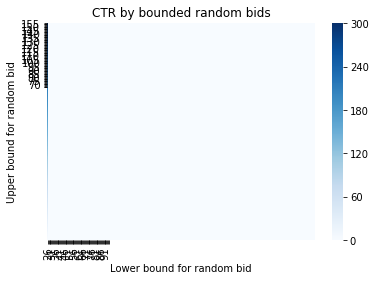

In [129]:
plotCTR(rbr2)

[26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
[ 66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155]


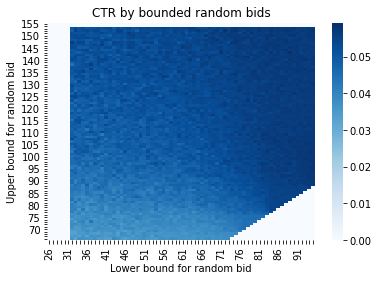

      20   21   22   23   24   25        26        27        28        29  \
144  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000   
145  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000   
146  0.0  0.0  0.0  0.0  0.0  0.0  0.050520  0.053619  0.051032  0.053253   
147  0.0  0.0  0.0  0.0  0.0  0.0  0.049314  0.055430  0.052438  0.053164   
148  0.0  0.0  0.0  0.0  0.0  0.0  0.052261  0.051569  0.051521  0.051445   
149  0.0  0.0  0.0  0.0  0.0  0.0  0.052674  0.053272  0.052499  0.054555   
150  0.0  0.0  0.0  0.0  0.0  0.0  0.051579  0.053799  0.053968  0.053068   
151  0.0  0.0  0.0  0.0  0.0  0.0  0.050846  0.050148  0.052053  0.051833   
152  0.0  0.0  0.0  0.0  0.0  0.0  0.056024  0.052489  0.054744  0.054607   
153  0.0  0.0  0.0  0.0  0.0  0.0  0.053155  0.051856  0.051514  0.052439   
154  0.0  0.0  0.0  0.0  0.0  0.0  0.053534  0.053098  0.049304  0.049699   
155  0.0  0.0  0.0  0.0  0.0  0.0  0.049992  0.051483  0.051862  0.054320   

In [156]:
#CTRMatrix

print(minBidRange)
print(maxBidRange)

t = rbr2.iloc[(304-160):(304-70),20:90]
plotCTR(t)
print(t)


In [159]:

#CTRMatrix
print(minBidRange)
print(maxBidRange)

ind = np.unravel_index(np.argmax(t, axis=None), t.shape)

[26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
[ 66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155]


ValueError: Must pass 2-d input

      21   22   23   24   25        26        27        28        29  \
157  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000   
156  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000   
155  0.0  0.0  0.0  0.0  0.0  0.050520  0.053619  0.051032  0.053253   
154  0.0  0.0  0.0  0.0  0.0  0.049314  0.055430  0.052438  0.053164   
153  0.0  0.0  0.0  0.0  0.0  0.052261  0.051569  0.051521  0.051445   
152  0.0  0.0  0.0  0.0  0.0  0.052674  0.053272  0.052499  0.054555   
151  0.0  0.0  0.0  0.0  0.0  0.051579  0.053799  0.053968  0.053068   
150  0.0  0.0  0.0  0.0  0.0  0.050846  0.050148  0.052053  0.051833   
149  0.0  0.0  0.0  0.0  0.0  0.056024  0.052489  0.054744  0.054607   
148  0.0  0.0  0.0  0.0  0.0  0.053155  0.051856  0.051514  0.052439   
147  0.0  0.0  0.0  0.0  0.0  0.053534  0.053098  0.049304  0.049699   
146  0.0  0.0  0.0  0.0  0.0  0.049992  0.051483  0.051862  0.054320   
145  0.0  0.0  0.0  0.0  0.0  0.051323  0.049700  0.048597  0.05

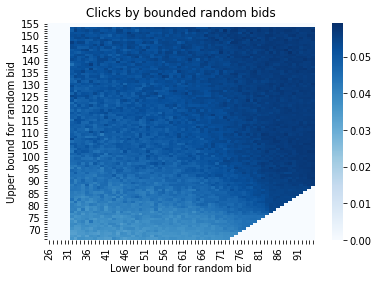

In [135]:
rbr = CTRMatrix.iloc[(304-160):(304-70),20:90]
print(rbr)
plotClicks(t)